In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/Users/rubenbroekx/Documents/Projects/agoro-field-boundary-detector


# Data Augmentation

Perform data augmentation on the annotated field-data in order to create more training data.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

from src.agoro_field_boundary_detector.data import load_annotations, polygons_to_mask, transform
from src.agoro_field_boundary_detector.data.transformations import t_linear, t_quartile, t_rotation, t_flip, t_blur, t_gamma
from src.agoro_field_boundary_detector.augment_data import _get_transformation

## Data

Load in the (example) image together with its corresponding annotations.

In [3]:
# Image to load
NAME = '41.481412--88.842236'

In [14]:
# Load in the annotations
annotations = load_annotations(Path.cwd() / 'data/annotations.json')
boundaries = annotations[NAME]

In [15]:
# Load in field and mask
field = np.asarray(Image.open(Path.cwd() / f"data/raw/{NAME}.png"))
mask = polygons_to_mask(boundaries)

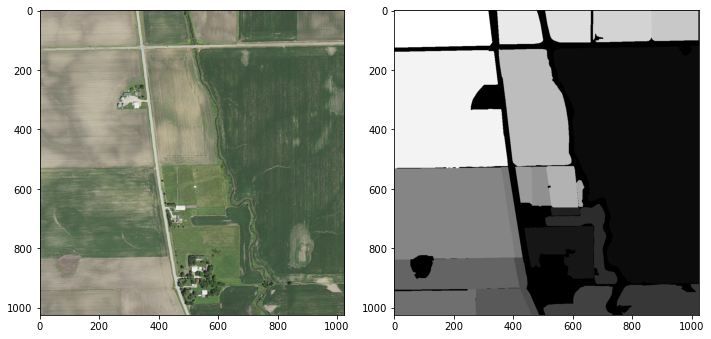

In [16]:
def show_image(field:np.ndarray, mask:np.ndarray):
    """Show the field and corresponding mask."""
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    ax1.imshow(field)
    plt.gray()
    ax2.imshow(mask)
    plt.tight_layout()
    plt.show()
    
show_image(field, mask)

## Transformations

Apply the different transformation and visualise the result.

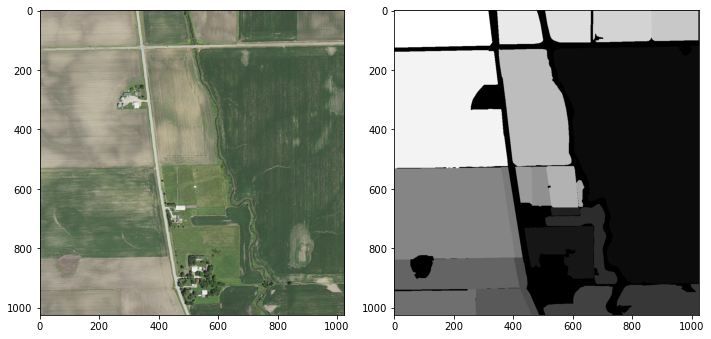

In [7]:
f,m = t_linear(field, mask)
show_image(f,m)

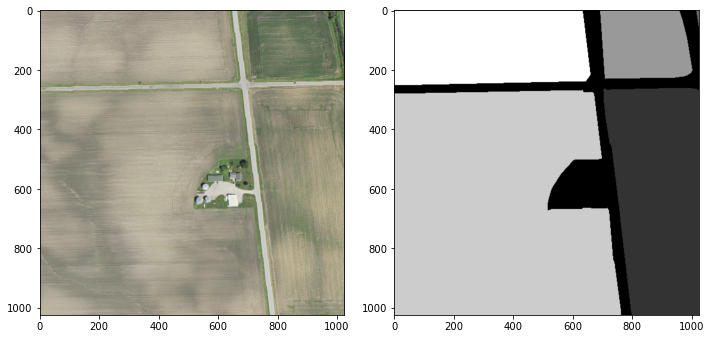

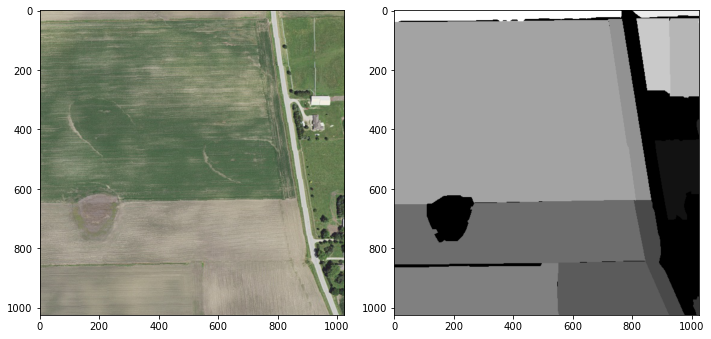

In [8]:
for idx in (0, 2):
    f,m = t_quartile(field, mask, idx=idx)
    show_image(f,m)

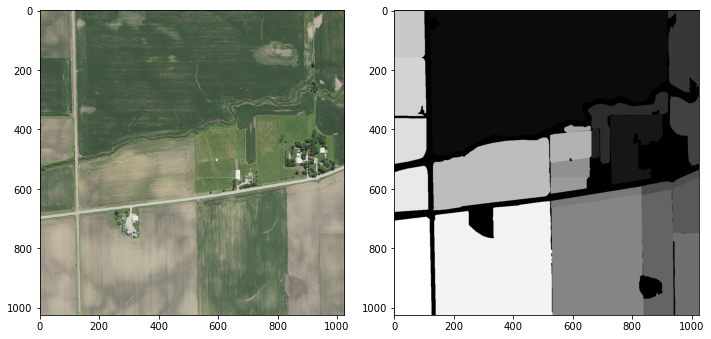

In [9]:
f,m = t_rotation(field, mask, rot=1)
show_image(f,m)

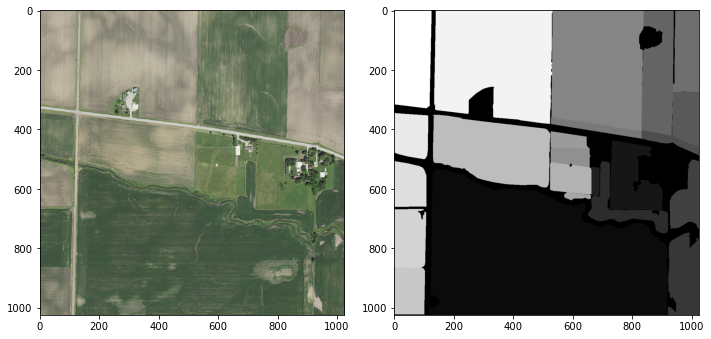

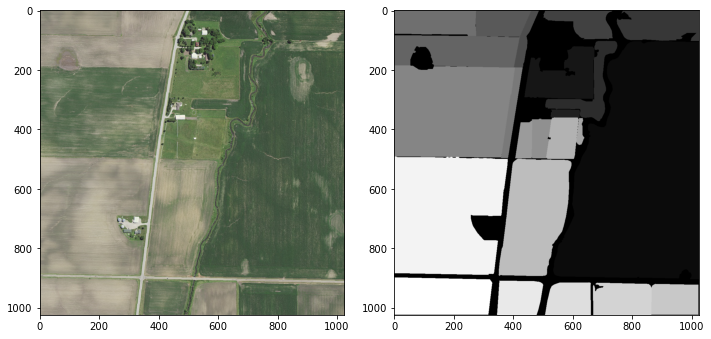

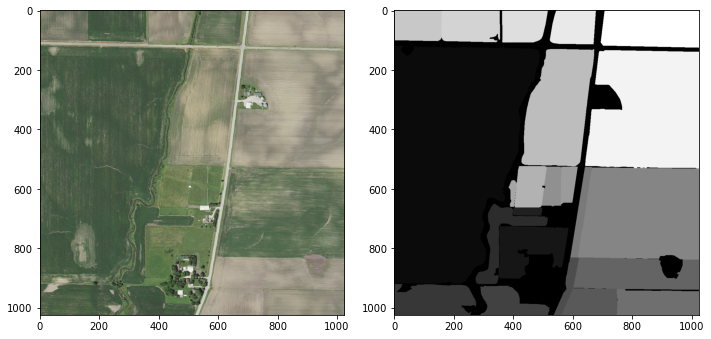

In [10]:
for idx in (0,1,2):
    f,m = t_flip(field, mask, idx=idx)
    show_image(f,m)

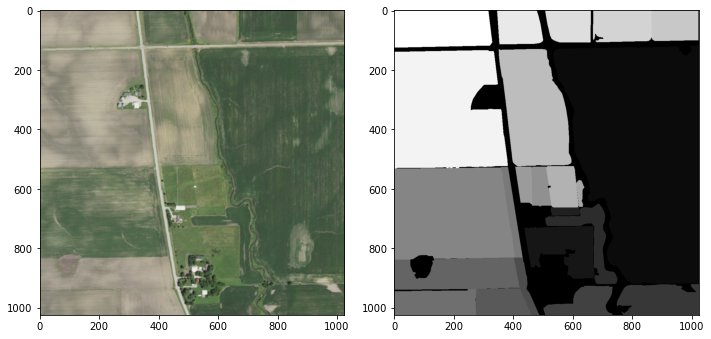

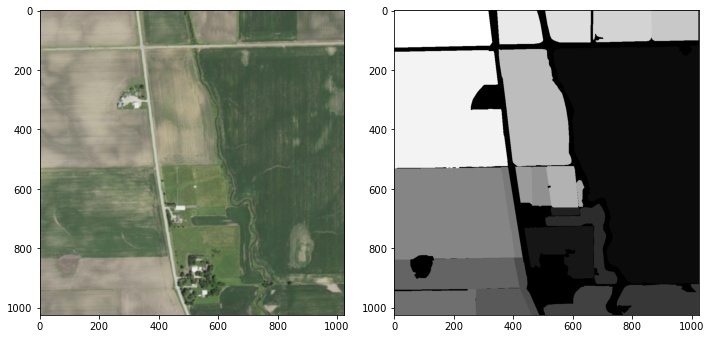

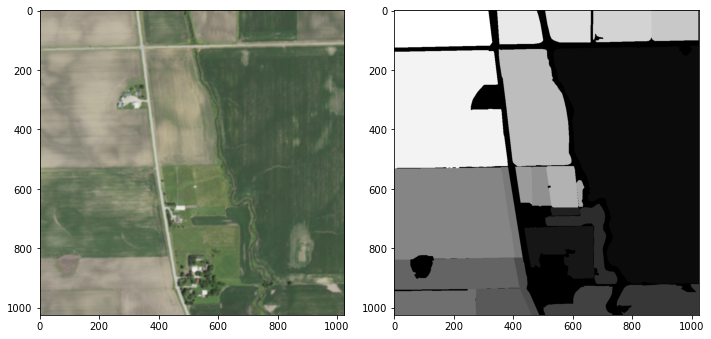

In [11]:
for sigma in (1, 5, 10):
    f,m = t_blur(field, mask, sigma=sigma)
    show_image(f,m)

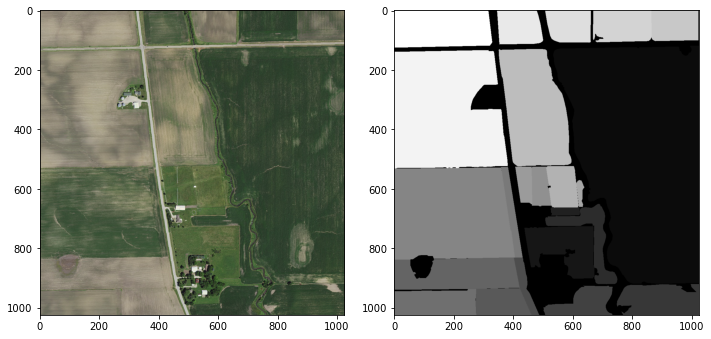

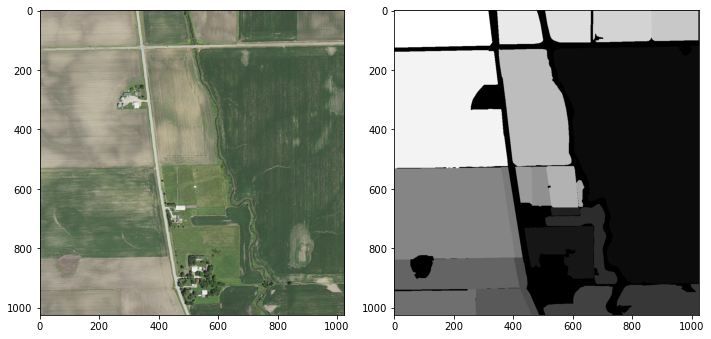

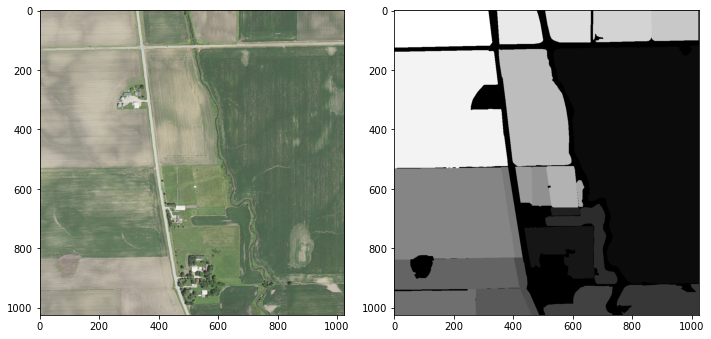

In [12]:
for gamma in (8, 10, 12):
    f,m = t_gamma(np.copy(field), mask, gamma=gamma)
    show_image(f,m)

## Randomised transformation

Generate randomised transformation that applies both:
 - Translation: `t_linear`, `t_quartile`, `t_offset`
 - Noise: `t_linear`, `t_rotation`, `t_flip`, `t_blur`, `t_gamma`

t_linear with idx 0  and  t_rotation with idx 1


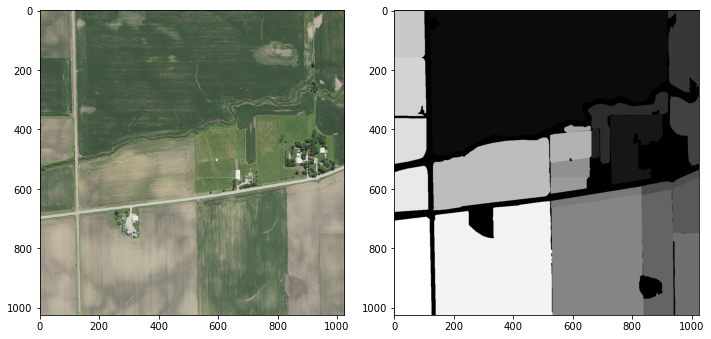

t_linear with idx 0  and  t_gamma with idx 11


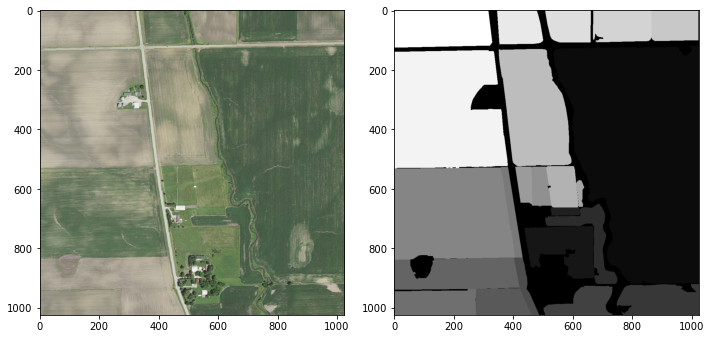

t_linear with idx 0  and  t_gamma with idx 8


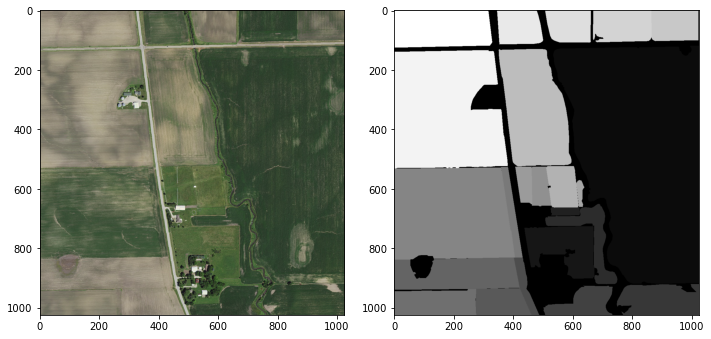

t_quartile with idx 1  and  t_linear with idx 0


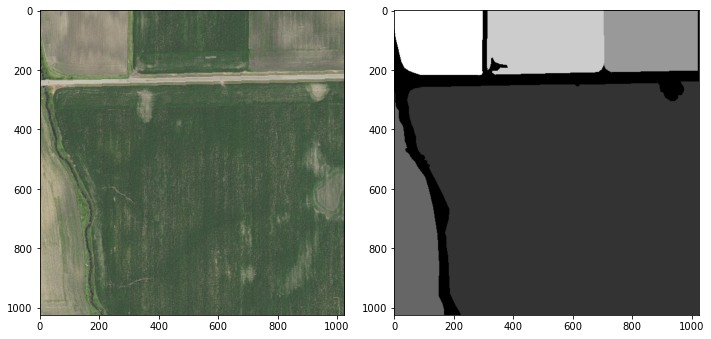

t_quartile with idx 3  and  t_linear with idx 0


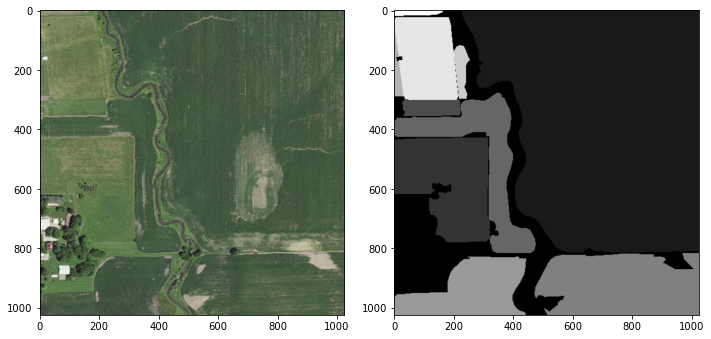

t_quartile with idx 3  and  t_linear with idx 0


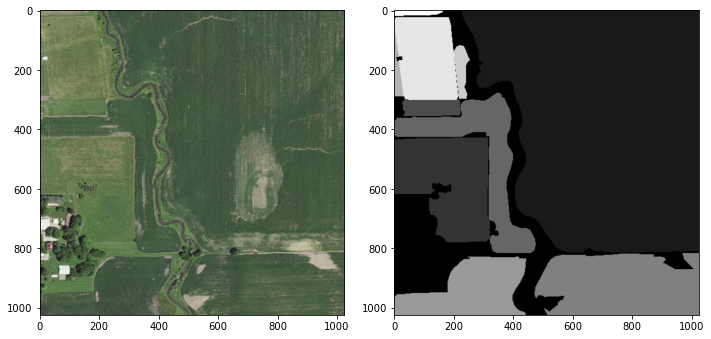

t_linear with idx 0  and  t_blur with idx 0


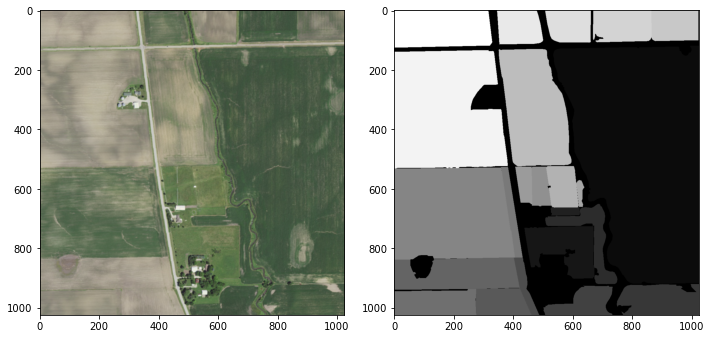

t_quartile with idx 1  and  t_rotation with idx 2


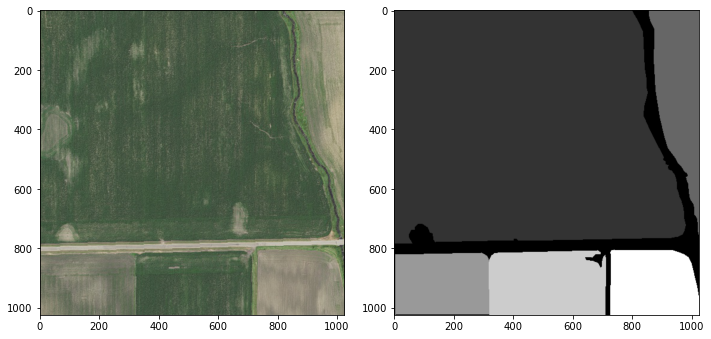

t_quartile with idx 1  and  t_linear with idx 0


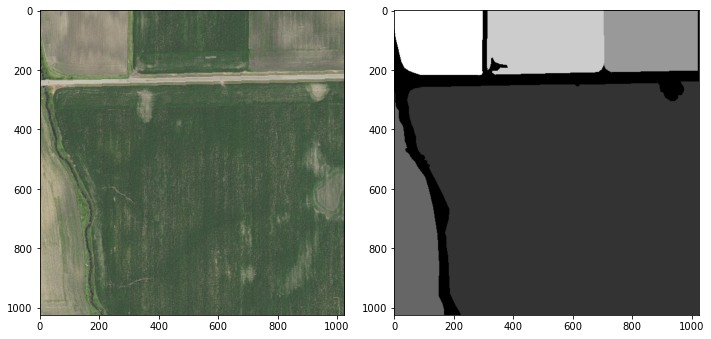

t_linear with idx 0  and  t_gamma with idx 8


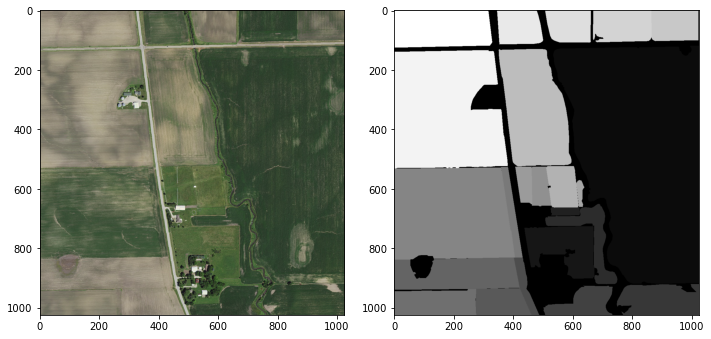

In [13]:
for _ in range(10):
    transformation = _get_transformation()
    print(f"{transformation[0].__name__} with idx {transformation[1]}  and  {transformation[2].__name__} with idx {transformation[3]}")
    field_t, mask_t = transform(
            field=field,
            mask=mask,
            translation=transformation[0],
            t_idx=transformation[1],
            noise=transformation[2],
            n_idx=transformation[3],
    )
    show_image(field_t, mask_t)

In [3]:
sdf = {"104394.png26318":{"filename":"104394.png","size":26318,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[86,164,163,86],"all_points_y":[138,138,215,216]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[83,1,0,84],"all_points_y":[217,218,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[83,0,0,83],"all_points_y":[138,138,216,215]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[172,86,86,172],"all_points_y":[217,216,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[244,175,174,245],"all_points_y":[218,218,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[218,165,163,243,243,238,238,243,244,243,243],"all_points_y":[155,154,215,216,213,213,189,188,180,180,177]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[244,241,240,242,243,244,217,243,244],"all_points_y":[167,164,160,157,153,151,151,173,173]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[246,245,256,256],"all_points_y":[256,217,217,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,165,217,210,205,197,190,180],"all_points_y":[138,154,155,148,144,141,138,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[227,200,200,210,217,244,244,240,239,235,232],"all_points_y":[135,135,138,144,151,151,144,140,137,136,135]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[246,256,256,246],"all_points_y":[135,136,154,154]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[246,256,256,246],"all_points_y":[179,187,216,216]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[245,256,256,255,253,252,248,245],"all_points_y":[133,133,93,93,97,99,99,99]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[246,246,249,252,255,254,253,255,256,256],"all_points_y":[78,80,82,82,85,87,89,91,91,72]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[245,256,256,246],"all_points_y":[53,54,69,77]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[245,256,256,245],"all_points_y":[0,0,53,52]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[243,242,240,216,236],"all_points_y":[0,21,23,23,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[207,241,243,243,203,205,205,205,196,196],"all_points_y":[25,26,30,131,76,72,68,36,35,34]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[239,211,191,191,200,211,225,228],"all_points_y":[132,91,89,92,102,113,122,132]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[166,183,210,222,225,167,166,165,175,175,169,165],"all_points_y":[88,89,115,124,132,133,125,104,104,99,98,102]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,199,207,166],"all_points_y":[74,73,85,86]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,163,163,159,159,163,163,135,132,132,132,127,109,108,100,100,100,109,109,123,124,85],"all_points_y":[135,134,85,85,79,79,69,68,63,53,51,51,81,91,92,77,74,74,80,55,27,27]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,128,127,119,114,85],"all_points_y":[0,0,6,7,14,15]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[45,84,83,44],"all_points_y":[0,0,53,54]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,45,44,0],"all_points_y":[1,0,54,54]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[82,66,65,67,67,67,65,62,62,62,61,62,63,64,64,70,73,75,78,79,82],"all_points_y":[54,55,60,63,68,75,80,86,91,97,104,106,106,105,103,103,104,105,104,103,102]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[83,78,76,71,72,75,77,78,82],"all_points_y":[106,108,110,109,117,123,129,133,134]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,42,43,44,42,40,41,41,44,47,49,51,52,55,58,60,60,61,62,64,64,64,63],"all_points_y":[55,56,58,65,77,92,97,101,102,103,102,101,100,101,101,99,88,85,80,75,70,63,60]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[22,40,39,40,40,39,38,38,39,37,36,33,31,29,28,27,24,25,24,23],"all_points_y":[55,55,58,60,67,78,88,97,101,103,102,103,104,103,102,101,100,97,96,96]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,1,22,20,17,15,1],"all_points_y":[55,55,56,77,84,89,89]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[74,69,68,67,63,60,56,54,53,54,54,52,49,46,45,43,40,38,34,33,33,34],"all_points_y":[133,123,116,112,112,111,108,106,109,112,115,115,114,114,112,110,109,109,109,109,132,134]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[25,29,30,32,31,25,23,23,24],"all_points_y":[105,109,112,133,134,134,133,109,106]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[205,221,226,226,205],"all_points_y":[9,10,3,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[203,212,219,218,209,204,203],"all_points_y":[24,24,15,13,12,13,15]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[12,22,22,11,9,9],"all_points_y":[107,110,133,133,120,109]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[185,189,198,176,176,183],"all_points_y":[62,62,71,73,66,65]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[145,163,163,156,156,154,153,151,150,148,148,149,146],"all_points_y":[65,66,48,48,52,53,52,51,50,51,53,58,59]},"region_attributes":{}}],"file_attributes":{}},"104402.png28155":{"filename":"104402.png","size":28155,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[0,18,18,0],"all_points_y":[213,212,231,232]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,18,17,0],"all_points_y":[233,233,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[58,19,18,57],"all_points_y":[213,213,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,59,57,97],"all_points_y":[212,213,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[100,138,137,100],"all_points_y":[253,253,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[179,139,138,100,99,179],"all_points_y":[218,217,172,171,250,252]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[140,180,179,139],"all_points_y":[253,253,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[100,100,139,139,179,180,240,240,251,252,256,256],"all_points_y":[141,170,172,217,218,255,256,250,249,219,218,193]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[179,180,220,221,227,232,236,241,256,256],"all_points_y":[91,128,129,140,142,131,129,125,124,90]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[228,256,256,240,232,229],"all_points_y":[146,153,124,126,132,142]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[110,123,124,131,131,144,144,107],"all_points_y":[115,119,108,108,121,125,92,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,118,118,102,101,99,99,97,95,85,79,80,83,91,89,77,79,85,92,91,94,94,97,100,101,102,105,107,108,144],"all_points_y":[46,46,40,39,32,30,26,25,28,29,32,39,52,54,64,65,70,71,72,85,86,92,93,92,94,93,91,89,91,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[139,134,133,123,123,118,119,139],"all_points_y":[40,38,34,34,35,35,44,44]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[138,117,118,121,125,130,134,136],"all_points_y":[22,23,25,27,30,30,28,26]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[49,97,97,88,82,78,72,66,63,61,56,47,44,44,44,47,48],"all_points_y":[125,140,168,171,172,176,178,177,174,170,170,171,171,168,167,167,166]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[83,96,97,83,79,74,70,67,64,63,61,45,42,63,65,65,66,71,74,78,80,81,83],"all_points_y":[210,210,170,172,176,178,178,177,176,174,172,172,181,183,184,192,194,194,194,196,198,200,201]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,6,10,12,14,17,17,17,17,20,22,24,19,18,1],"all_points_y":[194,194,193,189,187,185,183,180,177,176,174,173,171,168,162]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[209,210,220,228,230,232,256,256],"all_points_y":[1,7,8,8,7,8,9,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[177,256,256,180],"all_points_y":[163,189,177,157]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[147,148,149,145,143,144,131,128,120,109,106,102],"all_points_y":[153,148,146,142,139,134,130,131,129,126,129,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[243,241,250,249],"all_points_y":[155,162,164,157]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,11,11,17,17,0],"all_points_y":[25,25,12,11,4,4]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[148,148,173,173],"all_points_y":[0,7,9,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[192,192,189,185,182,174,174],"all_points_y":[1,7,6,6,8,8,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[180,190,191,180],"all_points_y":[77,78,87,87]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[150,144,144,160,160,153,151,149],"all_points_y":[74,74,92,91,84,84,83,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[171,161,144,144,149,152,156,160,165,167,166,169,171,169,171,173,177,177],"all_points_y":[92,91,93,113,107,106,105,108,109,113,117,119,115,109,105,104,104,92]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[38,38,60,59,50,46,45,40],"all_points_y":[209,209,210,197,196,194,192,193]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[16,35,37,27,25,25,23,20,18,17],"all_points_y":[210,210,205,206,206,202,200,198,200,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[28,37,37,27,26],"all_points_y":[191,191,185,185,188]},"region_attributes":{}}],"file_attributes":{}},"104400.png21941":{"filename":"104400.png","size":21941,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[138,92,51,91,125],"all_points_y":[152,158,159,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[128,158,171,176,181,187,192,196,198,198,196,195,195,189,185,181,164,162,145,143,147,147,143],"all_points_y":[256,256,242,232,226,219,210,198,182,168,158,143,131,121,125,115,111,121,118,129,131,133,133]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[153,175,173,198,195,191,185,178,171,167,163,161,157,156,150,149,147,145,146,147,152,154,150,149],"all_points_y":[74,82,87,94,123,123,117,109,107,110,109,119,119,117,116,114,111,108,105,99,99,92,90,89]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[99,115,118,120,125,122,125,107,106,110,108,104],"all_points_y":[113,114,98,96,72,70,60,56,63,63,75,75]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,148,130,128,125,121,131,136],"all_points_y":[103,77,71,72,72,96,101,103]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[138,140,98,98,86,83,80,49,48,44,51,94,111,111,126,126],"all_points_y":[150,122,118,113,110,106,105,121,133,138,158,156,154,153,151,152]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[21,45,91,53,45,37,23,11],"all_points_y":[155,151,256,256,239,229,213,201]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,24,17,0],"all_points_y":[212,240,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,18,16,19,20,11,8,9,8,6,3,0],"all_points_y":[138,138,152,158,159,202,200,195,193,191,190,190]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,3,6,9,11,14,16,17,20,26,31,35,34,35,29,25,22,20,19,19,21,23,29,35,42,46,45,42,40,40,21,19,19,20,20,19,1],"all_points_y":[32,29,29,27,25,23,23,27,29,28,26,25,38,50,48,48,53,61,71,80,88,96,105,110,116,124,133,144,149,151,154,153,149,143,138,135,136]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[53,24,21,25,27,31,41,46,47],"all_points_y":[97,85,86,88,100,107,115,124,124]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,94,94,92,82,69,69,68,66,63,63,63,62,60,58,57,56,60,63,68,71,73,83,88,89,95,99,104,106,106,102],"all_points_y":[50,54,61,65,65,60,64,68,70,72,76,80,84,85,85,90,93,96,95,95,98,100,100,99,104,105,105,75,62,60,58]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[107,109,116,122,125,124,124,125,128,131,134,136,138,141,143,142,141,141,141,141,141,142,146,147],"all_points_y":[24,37,37,39,43,49,52,55,58,58,60,60,58,58,57,55,52,50,47,44,42,40,41,30]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[178,200,199,201,206,215,219,224,224],"all_points_y":[256,224,231,238,240,241,246,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[208,256,256,251,250,246,246,250,251,249,242,241,242,242,232,228,223,219,217,215,216,218,221,222,223,226,219,213,207,206,203,201,200,201,207,212,212,209,208],"all_points_y":[139,144,168,171,176,181,185,186,190,194,195,199,203,205,207,210,213,214,214,218,220,217,216,218,222,226,229,229,235,238,237,234,229,224,210,189,172,159,147]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[211,221,225,229,236,238,242,245,247,250,256,256,208],"all_points_y":[101,103,99,96,96,97,96,94,87,80,74,141,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,219,230,256,256,231,217],"all_points_y":[97,99,90,56,28,60,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[230,256,256,232,221,226],"all_points_y":[39,6,0,1,10,36]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[106,45,41,37,36,39,54,67,73,85,101,105],"all_points_y":[25,17,22,28,36,41,40,41,41,34,27,28]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[95,96,100,105,106,105,103,102,101,98,96,93,92,90,90,90,91],"all_points_y":[43,40,39,41,37,33,33,33,32,34,35,36,36,38,40,41,42]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[36,35,35,31,28,27,27,29,39,54,54,53,54,56,58,58,53,48,43,39],"all_points_y":[54,56,58,64,67,69,74,78,82,88,86,85,82,83,79,74,71,69,65,60]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[41,36,24,20,28],"all_points_y":[16,20,19,15,14]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[155,162,168,159,159,159,156,155],"all_points_y":[27,28,11,5,9,13,13,15]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[185,190,191,183],"all_points_y":[75,78,84,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[194,199,198,194],"all_points_y":[80,83,86,85]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[195,182,182,194],"all_points_y":[88,84,86,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[201,205,204,202,202],"all_points_y":[78,70,69,67,68]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[100,80,80,70,64,64,62,56,66,67,104],"all_points_y":[7,7,2,0,0,6,7,12,14,15,19]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[52,52,46,42,13,13],"all_points_y":[1,8,9,11,10,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[52,41,41,47,53,54,60,63,52],"all_points_y":[52,49,54,62,65,68,71,60,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,54,54,65,65,64],"all_points_y":[54,50,55,60,58,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[174,181,178,166,163,163,167,168,172],"all_points_y":[67,70,79,76,75,72,73,70,71]},"region_attributes":{}}],"file_attributes":{}},"104373.png31253":{"filename":"104373.png","size":31253,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[46,60,58,52,49,46,46],"all_points_y":[42,42,111,105,102,101,101]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[106,62,62,71,71,62,61,74,75,98,101,102,104,118,120,124,124,118,118,106],"all_points_y":[42,42,83,83,89,89,111,114,120,114,111,90,88,88,85,85,60,61,57,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[210,256,256,246,246,237,237,224,225,212,212,215,216,213,211,207,209],"all_points_y":[42,43,117,117,122,123,114,113,123,123,119,118,115,113,114,114,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[182,205,206,127,126,137,142,144,163,164,172,175,185,185,182],"all_points_y":[122,123,65,65,99,109,109,111,112,109,110,100,99,108,109]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[23,41,42,34,33,27,27,10,9,5,5,16,22],"all_points_y":[121,121,146,147,145,145,147,148,147,147,133,132,129]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,122,123,114,112,112,99,99,78,78,81,80,78,74,73],"all_points_y":[122,124,147,147,163,165,166,177,177,160,153,144,141,139,128]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[126,126,186,186,214,213,225,224,245,243,226,223,221,214,206,200,187,184,182,183,177,174,174,155,156],"all_points_y":[124,154,155,201,202,194,194,202,202,160,159,149,141,143,138,134,133,130,131,134,136,136,130,131,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[205,202,197,193,193,197,197,195,193,192,193,194,193,194,204],"all_points_y":[206,206,209,215,223,227,231,233,236,239,241,244,247,249,248]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,190,194,194,192,189,190,191,191,191,173,168,166],"all_points_y":[227,226,228,231,233,236,240,243,247,248,249,245,236]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[5,23,23,29,30,5],"all_points_y":[242,241,253,254,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[35,42,41,33],"all_points_y":[93,93,75,75]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[29,32,33,25,21,23,24,25,18,17,23,27],"all_points_y":[71,71,53,51,48,47,47,42,42,49,57,63]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[155,189,190,191,205,206,206,155],"all_points_y":[42,43,52,54,54,57,58,58]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[127,206,206,127],"all_points_y":[57,58,65,65]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[208,240,241,245,244,207],"all_points_y":[206,205,223,225,256,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,246,246,256],"all_points_y":[225,225,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[126,134,131,129,126],"all_points_y":[106,112,117,117,116]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[145,153,154,149,148,145],"all_points_y":[42,42,55,56,54,54]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[160,160,169,169,177,178,186,186,160],"all_points_y":[156,162,162,168,168,166,166,155,155]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[177,186,186,178],"all_points_y":[185,185,167,167]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[156,168,169,165,165,155,155],"all_points_y":[201,201,192,192,194,194,202]},"region_attributes":{}}],"file_attributes":{}},"104404.png25229":{"filename":"104404.png","size":25229,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[212,153,122,121,208],"all_points_y":[41,41,67,119,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,206,206,202,201,162,162,161],"all_points_y":[122,121,140,141,142,143,136,135]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[159,122,122,143,147,158],"all_points_y":[122,122,166,167,136,136]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[160,161,148,143],"all_points_y":[169,136,136,167]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[130,130,133,139,140,121,121],"all_points_y":[196,179,173,169,167,166,196]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[207,203,201,162,161,202,202,206,207],"all_points_y":[141,141,143,143,159,160,163,162,162]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[239,241,255,256,212,210],"all_points_y":[84,71,70,62,63,83]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,212,212,256],"all_points_y":[40,41,63,62]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[202,202,256,256],"all_points_y":[0,41,40,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[182,181,202,202,199],"all_points_y":[16,41,41,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,167,181,182],"all_points_y":[30,41,41,16]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,206,206,196,197,161],"all_points_y":[184,184,172,172,161,160]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[233,233,238,240,250,250,250,256,256,242,240,210,208],"all_points_y":[120,113,113,119,120,112,90,89,71,71,84,83,118]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,251,250,256],"all_points_y":[121,120,91,90]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[241,240,256,256],"all_points_y":[163,202,201,162]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[207,215,218,239,241,256,256,252,208],"all_points_y":[197,194,201,202,164,162,121,120,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[132,199,200,207,207,163,161,141,134,131,131],"all_points_y":[201,201,200,200,185,184,169,167,173,178,196]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[200,199,131,130,121,120],"all_points_y":[218,202,202,206,210,220]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[155,167,167,153,152,156,157,155],"all_points_y":[222,222,234,235,228,228,224,224]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[221,241,241,221],"all_points_y":[225,222,203,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[213,218,220,212,212,213],"all_points_y":[240,240,255,255,245,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[240,240,255,256],"all_points_y":[226,255,256,223]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[135,146,146,135],"all_points_y":[249,250,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,148,147,162,162,161,161],"all_points_y":[249,249,256,256,253,253,251]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[38,38,58,61,56,56,43,42,37,37,18,17,21,22],"all_points_y":[245,232,232,201,201,205,205,221,221,223,222,231,232,245]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[120,141,142,152,152,146,144,144,121],"all_points_y":[233,233,240,240,230,229,226,222,222]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[82,101,101,83],"all_points_y":[173,174,129,130]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[81,107,108,103,101,92,87,82],"all_points_y":[217,218,206,206,211,211,213,213]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[12,12,0,0],"all_points_y":[200,162,173,197]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[55,56,60,62,63,60,57,53,49,47,46],"all_points_y":[197,160,156,155,147,142,140,140,143,146,196]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[187,187,182,172,169,169,169,164,161],"all_points_y":[1,6,11,9,11,18,21,26,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[133,149,149,163,161,145,141,125,123],"all_points_y":[53,38,33,25,1,1,8,14,47]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[100,43,68,94,95,99,99,98,98,100],"all_points_y":[0,1,38,40,37,37,29,28,26,27]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[119,120,103,102],"all_points_y":[52,31,29,38]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[41,41,12,12],"all_points_y":[39,26,27,38]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[40,39,17,17,43,43,68,42],"all_points_y":[1,7,18,24,24,38,38,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[11,1,1,11],"all_points_y":[42,42,23,23]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[46,35,35,30,29,54,55,44],"all_points_y":[58,58,85,87,93,93,86,86]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[27,36,37,39,37,27,27],"all_points_y":[135,138,134,134,128,127,135]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,11,11,1],"all_points_y":[147,148,159,169]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[46,18,20,25,27,35,35,45],"all_points_y":[97,98,111,115,108,107,111,104]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[90,97,94,89],"all_points_y":[245,245,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[42,24,23,26,29,39],"all_points_y":[152,153,159,161,218,217]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[66,81,82,72,67],"all_points_y":[171,168,141,138,140]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,112,112,119,119,103,102],"all_points_y":[120,120,130,130,174,174,174]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[68,118,120,114,111,69],"all_points_y":[119,119,80,79,76,114]},"region_attributes":{}}],"file_attributes":{}},"104550.png20878":{"filename":"104550.png","size":20878,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[121,127,155,156,119,119,120],"all_points_y":[136,134,134,103,102,133,136]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,156,156,157,159,159,159,158,159,160,161,163,165],"all_points_y":[103,103,134,133,132,129,127,126,124,122,120,119,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[40,79,78,49,49,40,39,38,39,40],"all_points_y":[103,103,143,143,140,140,134,134,132,103]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[88,39,40,41,45,49,52,56,58,61,64,69,71,73,75,78,80,82,83,85,87,90,90,88,86,84,84,86,87,89,89],"all_points_y":[100,100,67,65,64,63,63,64,66,68,68,67,65,63,63,63,63,65,66,68,68,68,73,73,73,75,78,80,82,85,99]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[40,43,45,49,53,57,58,60,62,66,65,63,61,60,58,56,54,53,54,53,53,51,49,47,43,40,39],"all_points_y":[60,59,56,55,55,57,59,59,58,58,38,38,37,35,36,36,34,29,24,22,22,24,26,27,28,28,45]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,120,118,115,112,111,112,111,110,109,108,106,104,104,102,101,100,99,101,102,102,102],"all_points_y":[99,99,97,95,93,91,87,86,87,89,89,88,88,90,89,88,88,89,91,92,95,97]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[155,121,121,123,125,126,126,126,127,128,129,131,132,135,138,139,140,139,139,139,141,144,147,151,151,152],"all_points_y":[100,100,93,92,92,91,89,86,85,84,84,84,84,84,83,83,84,85,86,88,90,91,90,90,95,97]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,256,256,254,250,246,243,240,237,233,229,226,223],"all_points_y":[103,103,110,112,112,113,114,113,113,113,113,113,111]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[239,256,256,239],"all_points_y":[19,19,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[197,197,157,157,123,158,159,160,161,162,163],"all_points_y":[72,20,20,24,57,58,64,67,70,71,72]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[119,123,125,125,144,146,147,147,149,149,149,149,149,150,151,152,154,155,157,157,158,157,156,155,153,152,152,153,155,155,154,154,154,155,136,136,138,139,138,137,134,134,135,135,134,132,129,127,127,125,125,125,126,126,125,122,120],"all_points_y":[187,187,182,182,182,181,178,176,175,171,171,169,168,167,166,163,161,160,161,160,157,155,154,154,152,150,148,147,144,143,142,140,139,138,138,140,141,143,144,146,146,150,151,153,154,155,155,157,159,158,156,155,152,144,142,140,139]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[116,114,94,93,95,94,99,98,98,97,86,86,84,85,80,79,74,73,69,69,61,59,57,55,52,46,44,39,40],"all_points_y":[186,222,220,228,229,242,244,246,247,256,256,251,249,242,241,240,240,196,196,212,212,211,210,212,214,215,215,213,185]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[69,69,64,61,59,56,56,55,54,41,41,42,44,44,43,45,47,49,49],"all_points_y":[242,214,215,216,215,215,216,217,219,226,228,230,231,233,235,237,238,237,237]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[39,78,78,52,40,40,49,49,39],"all_points_y":[182,182,144,144,148,167,168,176,177]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[36,37,31,31,35,35,29,29,36,36,22,20,19,17,16,15,17,19,22,22,23,32,32,31,20,20,23,24,22,22,22,21,20,20,21,22,25,24,25,27],"all_points_y":[224,185,185,180,180,176,175,163,162,138,144,146,150,159,165,172,183,186,186,190,192,193,196,197,195,198,201,202,203,205,208,212,213,215,216,217,219,220,222,222]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[17,32,35,22,20],"all_points_y":[133,132,138,144,142]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[37,9,9,10,14,17,20,30,30,36,37],"all_points_y":[102,103,111,119,124,128,131,131,123,123,122]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[160,171,171,175,175,172,170,170,171,172,173,160],"all_points_y":[185,188,203,207,214,217,223,230,234,238,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[177,196,196,193,192,194,195,196,194,192,189,187,185,182,179,178,180,183,183,181,177],"all_points_y":[191,192,216,218,221,224,226,240,241,241,241,240,239,238,231,224,218,213,207,203,201]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[241,242,244,245,245,245,256,256],"all_points_y":[256,224,223,220,217,215,215,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[198,232,231,227,224,222,219,216,215,215,213,211,208,206,204,204,200,198],"all_points_y":[125,125,119,119,118,116,115,113,113,116,117,118,117,116,115,114,114,116]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,251,243,243,245,248,252,253,252,256],"all_points_y":[115,116,126,140,144,145,145,146,155,155]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[99,105,105,109,111,112,115,116,116,79,78,89,90,93,94,97],"all_points_y":[104,104,122,124,127,130,135,138,181,181,138,129,124,124,120,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[188,192,193,187],"all_points_y":[178,178,170,170]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[216,226,226,230,230,216],"all_points_y":[167,167,165,165,162,162]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[230,217,217,230],"all_points_y":[144,144,141,141]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[202,208,209,202],"all_points_y":[151,151,160,160]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[200,236,236,238,239,199],"all_points_y":[18,19,10,9,0,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[209,256,256,252,251,249,244,242,241,232,227,221,216],"all_points_y":[99,100,72,72,74,74,69,69,70,69,79,90,96]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[200,206,211,219,229,229,231,232,233,256,256,200],"all_points_y":[99,99,94,83,68,64,63,64,66,66,21,20]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[120,132,133,137,138,140,140,142,147,147,154,155,137,137,129,128],"all_points_y":[57,45,43,40,36,36,38,37,33,31,25,20,21,22,22,38]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[116,124,126,112,109,108,112],"all_points_y":[55,40,23,21,23,37,37]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[100,116,116,108,99,102],"all_points_y":[75,75,65,66,64,69]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[81,101,101,104,105,99,91,86,83,82],"all_points_y":[18,19,15,15,8,11,12,11,7,7]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[84,85,89,98,104,105],"all_points_y":[0,3,7,6,4,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,10,12,15,19,19,18,19,20,20,19,18,18,17,16,16,15,16,17,16,14,14,15,17,19,16,12,13,12,11,9,9,8,5,1,0],"all_points_y":[223,224,222,221,222,218,215,212,208,205,204,206,207,206,204,202,200,199,198,197,195,193,192,191,189,188,181,173,172,172,175,178,179,178,178,178]},"region_attributes":{}}],"file_attributes":{}},"104406.png31533":{"filename":"104406.png","size":31533,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[7,63,64,72,72,7],"all_points_y":[17,17,24,24,30,31]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[73,69,47,46,6,7],"all_points_y":[8,1,1,0,0,8]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,63,7,7,63],"all_points_y":[15,8,9,16,16]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,6,6,0],"all_points_y":[13,13,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[107,135,135,142,146,146,140,139,132,129,129,107],"all_points_y":[40,40,33,32,31,16,17,13,13,14,20,21]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[87,122,120,87],"all_points_y":[8,10,1,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,181,184,176,174,168],"all_points_y":[14,14,1,1,5,5]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[225,237,236,226],"all_points_y":[10,10,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[204,214,213,224,225,226,236,231,235,236,232,223,201],"all_points_y":[13,13,45,48,46,13,13,57,63,73,73,55,50]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[247,252,253,248],"all_points_y":[9,10,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[189,200,201,189],"all_points_y":[35,35,20,20]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[108,135,136,108],"all_points_y":[59,60,66,66]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,105,104,85],"all_points_y":[45,43,65,66]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[160,165,164,156,156],"all_points_y":[42,42,57,57,52]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[207,211,209,209,209,203,202],"all_points_y":[65,65,86,104,105,105,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[135,144,145,133],"all_points_y":[8,9,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[20,35,35,29,28,31,35,29,26,22,20,18,17,17,20,20,18],"all_points_y":[112,113,69,69,62,61,54,54,56,59,63,69,72,81,81,86,90]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[38,68,68,38],"all_points_y":[96,96,83,84]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[69,83,84,69],"all_points_y":[96,96,83,83]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[38,84,84,70,66,66,70,70,56,46,37,37,42,42,38],"all_points_y":[82,81,56,56,54,50,50,41,39,38,40,58,58,65,66]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[82,61,61,48,49,51,51,52,56,57,78,83],"all_points_y":[121,122,118,118,109,108,102,99,97,97,97,103]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[5,17,17,21,23,29,37,37,46,66,66,7,7,0,1],"all_points_y":[82,81,73,61,58,54,54,40,38,40,31,31,14,14,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[5,14,14,4,5,0,1,5],"all_points_y":[124,128,164,164,185,186,160,159]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[24,14,14,23],"all_points_y":[164,164,128,134]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[76,48,46,44,42,25,24,24,33,34,44,60,61,68,68,76,77,76],"all_points_y":[166,149,150,149,145,134,136,164,164,162,162,173,206,205,199,199,198,197]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,35,35,33,14,11,8,5,0],"all_points_y":[206,206,191,189,189,192,192,191,194]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[8,34,34,26,18,6],"all_points_y":[228,228,240,245,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[35,34,19,26,35],"all_points_y":[242,256,256,247,241]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[68,68,53,53,47,47,39,38,35,35,69,69],"all_points_y":[243,207,207,211,214,217,219,226,229,256,256,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[84,69,68,72,77,79,85,84,86,85],"all_points_y":[208,208,237,237,232,229,228,216,216,209]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[84,85,84,80,77,73,68,68],"all_points_y":[243,230,229,229,233,237,238,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[86,124,124,87],"all_points_y":[247,247,243,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[157,162,161,164,164,168,169,180,180,179,176,173,172,171,170,170,166,165,165,159,155,154,152,152,155,157],"all_points_y":[141,141,137,137,142,143,142,142,152,154,154,154,149,149,150,153,154,155,161,164,163,159,159,154,153,151]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[94,125,125,87,87,92],"all_points_y":[218,218,242,242,228,227]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[107,107,125,125,142,141,139,138,140,147,150,152,152,149,150,149,147,145,144,165,165,165],"all_points_y":[255,248,247,207,207,242,246,249,251,250,251,251,248,246,244,242,241,241,207,207,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[221,215,214,214,212,211,212,214,216,219,220,220,223],"all_points_y":[184,185,189,193,194,196,198,198,203,207,207,214,214]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[224,236,236,226,224],"all_points_y":[173,172,160,158,163]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[115,115,112,107,107],"all_points_y":[200,191,189,191,198]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[225,232,233,223,223],"all_points_y":[95,92,90,89,94]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[92,97,98,93],"all_points_y":[187,186,174,172]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[104,115,115,112,112,115,118,118,102,102],"all_points_y":[208,207,212,212,215,215,216,218,218,214]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[35,40,40,35],"all_points_y":[166,166,178,178]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[35,46,46,41,40,35],"all_points_y":[189,188,165,165,178,178]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[140,148,148,143,142,148,148,139,139],"all_points_y":[53,53,50,50,45,45,43,43,53]},"region_attributes":{}}],"file_attributes":{}},"104403.png17090":{"filename":"104403.png","size":17090,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[63,0,0,63],"all_points_y":[120,120,98,98]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,30,48,48,23,0,0,63],"all_points_y":[73,73,86,91,73,73,97,98]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[103,64,64,68,78,81,83,85,103],"all_points_y":[83,83,107,104,104,100,101,102,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[89,66,66,67,71,86,91,92,91,90],"all_points_y":[120,120,115,110,107,107,110,113,116,118]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[107,111,120,125,131,135,137,138,138,137,136,111,107,104,104],"all_points_y":[121,115,109,105,105,104,101,96,93,89,90,90,92,94,121]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,104,104,88,91,95],"all_points_y":[110,108,94,104,105,108]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[20,20,24,0,0],"all_points_y":[63,68,73,73,63]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,17,15,11,0],"all_points_y":[61,61,57,55,33]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,23,22,17,0],"all_points_y":[123,123,184,182,176]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[23,22,15,7,0,0],"all_points_y":[202,191,186,181,178,195]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,23,23,7,0],"all_points_y":[198,205,242,242,238]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,24,0,0],"all_points_y":[242,256,256,241]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[11,23,27,36,47,62,63,29,26,23,20],"all_points_y":[244,253,253,250,249,250,245,243,246,246,245]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[30,39,45,61,62],"all_points_y":[256,253,252,252,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[58,42,38,34,24,23,24,26,28,57],"all_points_y":[240,228,222,208,192,194,234,238,241,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,40,34,30,27,27,27,35,40,44,61,62,63],"all_points_y":[215,202,196,191,192,194,197,209,223,227,240,240,236]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[37,43,43,26,24,23],"all_points_y":[169,169,156,143,143,158]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,54,44,37,23,23,41,63],"all_points_y":[165,165,170,170,158,180,201,214]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[94,75,70,64,64],"all_points_y":[185,167,165,165,184]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[117,95,64,64],"all_points_y":[202,186,185,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[144,65,64,68,68,69,72,82,84,87,89,91,94,110,111,117,121,145],"all_points_y":[205,204,234,236,241,242,237,240,237,238,236,236,233,234,232,232,223,223]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[128,144,145,136,133,132,134,136,135,133,129],"all_points_y":[244,244,231,229,229,231,234,236,238,237,236]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[118,128,128,123,122,119,117,117,113],"all_points_y":[250,246,230,230,234,234,235,239,243]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[121,134,144,144,121,120],"all_points_y":[253,247,247,255,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[66,112,115,115,107,92,92,89,87,85,83,80,76,75,72,69,66,65,64],"all_points_y":[256,256,253,250,243,242,245,248,245,244,247,246,246,248,248,248,244,246,251]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[184,184,150,150,152,154,162,173],"all_points_y":[227,256,256,251,246,241,237,231]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[187,208,225,225,186],"all_points_y":[191,187,184,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[184,184,174,158,146,146,153,162],"all_points_y":[203,192,192,186,186,191,192,203]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[184,184,162,157,151,145,145,161,161,176,177],"all_points_y":[220,204,204,208,204,205,240,230,224,223,221]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[227,241,244,244,245,247,248,246,246,246,244,244,256,256,250,245,242,239,234,231,226,225],"all_points_y":[248,249,242,234,229,229,231,233,238,243,246,248,249,233,226,226,220,218,216,208,205,247]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[241,256,256,248,245,240,236,232,230,228,234,240,241],"all_points_y":[163,163,229,220,220,214,214,203,203,186,182,175,172]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[226,256,256,225],"all_points_y":[163,163,124,124]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[186,215,214,210,203,186],"all_points_y":[124,124,131,137,140,143]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[186,228,232,235,236,236,226,225,217,217,215,211,204,186,186,189,191,193,197,196,195,192,190,190,186],"all_points_y":[187,180,177,172,168,163,164,124,124,130,136,140,142,145,161,161,159,161,161,172,173,173,172,174,175]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[145,184,183,144],"all_points_y":[124,123,159,161]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[183,184,144,145,122,122,130,136,140,146,147,146,159,173,174],"all_points_y":[188,159,161,123,124,152,154,160,166,167,169,182,183,188,188]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[73,122,122,119,118,115,109,96,72],"all_points_y":[123,124,155,157,166,162,157,154,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[66,94,98,108,115,121,124,118,113,77,66],"all_points_y":[136,156,158,161,169,173,197,193,193,161,160]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[58,63,63,48,48,24,24,26],"all_points_y":[163,160,122,123,135,135,142,143]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[183,183,144,140,141,139,136,130,126,115,111],"all_points_y":[120,83,83,87,99,103,105,107,108,115,120]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[186,226,233,218,201,201,196,186],"all_points_y":[85,99,100,121,120,112,107,107]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,219,234,256],"all_points_y":[121,121,100,100]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[254,187,187,225,256],"all_points_y":[82,81,82,97,98]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[107,134,143,107],"all_points_y":[87,88,81,82]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[183,184,175,173,176,179,183,183,140,139,131,132,132,134,141,149,157,164,170,170,161,156,151,147,146,146],"all_points_y":[81,67,62,59,55,51,50,0,0,39,39,40,44,52,60,66,72,74,76,77,78,76,73,68,68,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[105,140,139,105],"all_points_y":[0,0,38,39]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[144,134,122,118,117,117,116,113,114,116,121,125,131,128,105,105,144],"all_points_y":[66,56,56,58,62,63,64,64,60,55,54,53,53,39,39,81,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,104,105,64],"all_points_y":[41,40,82,83]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,62,68,69,68,70,74,78,81,81,79,105,105],"all_points_y":[0,2,8,14,18,21,23,23,27,34,40,40,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[186,186,256,256],"all_points_y":[1,80,82,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[22,30,64,64,77,77,79,79,77,73,71,69,66,65,65,65,63,60,58,54,1,1,11,18,20,22],"all_points_y":[68,73,73,41,40,37,34,29,27,26,26,24,22,18,13,11,7,5,3,1,0,28,49,56,59,62]},"region_attributes":{}}],"file_attributes":{}},"104405.png26064":{"filename":"104405.png","size":26064,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[145,163,162,145],"all_points_y":[128,128,100,113]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,177,181,186,190,195,200,202,201,199,194,180,181,196,192,187,182,174,173,167,166,164],"all_points_y":[124,124,117,113,111,111,112,109,104,102,101,101,99,90,81,81,84,81,83,88,94,96]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[113,160,163,163,161,158,157,136,136,134,113],"all_points_y":[160,161,160,133,129,129,130,130,126,121,138]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[119,145,145,146,146,149,149,151,151,160,160,124,124,119,119],"all_points_y":[129,110,102,102,100,99,96,94,86,82,76,75,79,82,82]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,109,113,113,100,99,99,101],"all_points_y":[166,165,160,137,148,150,158,160]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[161,161,159,157,154,147,145,145,135,135,131,128,128,128],"all_points_y":[73,44,42,44,42,41,42,43,43,50,59,72,72,72]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[98,118,117,103,102,104,104,102,98,96,96],"all_points_y":[146,130,116,116,129,131,134,133,133,136,141]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[87,99,100,101,103,104,104,107,108,87],"all_points_y":[215,216,195,191,190,193,194,194,166,170]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[129,109,109,113,161,146,141,135],"all_points_y":[195,194,166,160,161,172,177,187]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[45,97,129,109,104,100,100,87,87,92,92,90,89,80,80,82,82,79,78,77,80,79,75,74,71,68,68,69,67,64,62,60,57,56,55,55,56,54,52,49,43],"all_points_y":[234,234,196,196,198,196,217,215,170,169,160,159,157,161,166,170,171,172,174,177,185,187,186,184,178,180,184,188,189,188,186,184,184,186,191,193,196,197,198,210,213]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[29,30,33,42,46,54,55,56,100,99],"all_points_y":[256,250,246,246,253,255,253,236,236,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[189,204,205,190],"all_points_y":[241,241,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[226,205,206,227],"all_points_y":[233,233,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[243,242,244,245,227,228,243],"all_points_y":[255,229,228,218,218,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[234,256,256],"all_points_y":[214,214,197]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[237,256,256],"all_points_y":[68,68,42]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[230,256,256,249,244,243,241,236,232,226,224,225],"all_points_y":[78,76,128,129,122,114,112,110,111,112,98,88]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,236,237,240,241,238,238,256],"all_points_y":[25,27,43,45,48,51,62,39]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[215,224,218,208],"all_points_y":[28,25,14,18]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[206,216,210,199],"all_points_y":[15,13,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[215,222,224,216,216,217],"all_points_y":[35,34,43,45,43,42]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[197,197,194,195,190,190,188,184,162,162,168,168,174,179,179],"all_points_y":[46,35,35,29,26,18,17,19,18,24,24,37,37,42,46]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[169,169,184,190,190,195,193,191,190,189,176],"all_points_y":[11,18,19,15,13,11,8,6,2,1,8]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,171,184,162,162],"all_points_y":[8,8,1,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[160,161,137,140,139,141,144],"all_points_y":[0,41,22,18,14,9,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[57,111,111,112,112,120,123,124,120,119,112,110,99,98,99,102,107,112,111,107,104,99,97,92,89,86,84,79,75,58],"all_points_y":[0,0,6,7,9,12,16,28,29,32,34,32,32,35,38,41,40,40,51,52,53,50,49,48,48,49,53,56,58,59]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[80,80,89,92,91,93,95,96,99,100,93,90],"all_points_y":[73,65,59,58,64,65,64,61,63,69,70,73]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[50,56,80,80,77,74,71,71,74,75,77,83,91,92,97,98,94,90,88,85,85,85,50],"all_points_y":[76,74,76,82,82,83,86,89,91,91,94,95,95,94,94,95,100,99,103,105,109,113,114]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[42,57,58,56,56,9,8],"all_points_y":[33,33,58,59,72,81,56]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[7,7,33,34,27,23,14,14],"all_points_y":[42,33,33,35,40,38,39,42]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[6,24,25,22,23,30,30,38,44,44,6],"all_points_y":[31,31,25,7,6,6,7,4,2,1,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[33,42,39,36,31,31,28],"all_points_y":[30,16,12,16,17,19,25]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[9,25,26,38,39,43,43,37,30,26,10],"all_points_y":[84,81,84,92,116,116,121,124,125,134,134]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[44,50,50,38,39,43,44,39,39],"all_points_y":[116,114,76,80,86,88,94,92,116]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[81,71,27,30,37,43,44,50,69,76,82],"all_points_y":[128,132,134,125,124,121,118,115,115,119,124]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[11,30,32,48,62,62,60,54,47,44,43,41,40,42,42,38,37,36,33,30,29,15,11],"all_points_y":[137,137,141,148,147,162,165,167,167,165,163,163,167,174,177,178,181,184,184,181,179,179,176]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,8,7,1],"all_points_y":[176,176,115,115]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[6,0,0,5],"all_points_y":[86,86,33,33]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,5,3,0],"all_points_y":[31,31,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[235,256,256,242,235],"all_points_y":[26,24,0,1,13]},"region_attributes":{}}],"file_attributes":{}},"104551.png25703":{"filename":"104551.png","size":25703,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[85,122,124,126,89,89,87,87,95,95,86],"all_points_y":[131,131,130,51,52,65,67,80,82,92,92]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[125,152,159,164,165,152,148,135,134,131,126],"all_points_y":[131,130,127,119,90,88,85,83,90,93,94]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,166,161,148,146,142,147,154,157,159],"all_points_y":[82,38,35,36,49,74,78,77,79,82]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,55,55,64,68,68,66,56,56,59,84],"all_points_y":[91,91,105,107,111,114,115,112,128,132,131]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[49,55,65,70,71,48,48],"all_points_y":[75,79,78,81,88,89,75]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,72,72,86],"all_points_y":[80,81,89,89]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[49,85,84,78,70,63,60,52,48],"all_points_y":[53,53,69,70,73,74,72,71,65]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[70,97,95,88,86,92,90,84,81,70],"all_points_y":[50,50,25,25,34,44,45,37,38,36]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[128,98,97,98,98,101,101,101,97,128,128,127],"all_points_y":[49,50,37,33,28,24,13,10,5,5,8,21]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[169,186,196,170],"all_points_y":[28,28,11,10]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[210,245,245,209],"all_points_y":[8,8,29,28]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[189,196,198,202,203,208,209,206,196,193],"all_points_y":[28,28,25,25,28,28,11,10,18,21]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[4,35,34,37,37,32,29,25,25,22,21,20,16,12,12,3],"all_points_y":[5,5,13,14,21,22,18,19,22,22,21,17,16,16,23,24]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[4,9,18,24,33,33,21,22,18,18,21,21,3],"all_points_y":[27,32,31,28,27,37,37,42,45,47,49,50,51]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,6,14,19,21,25,25,25,28,28,3],"all_points_y":[74,73,75,75,72,66,57,55,53,52,52]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,20,19,17,15,10,5,2],"all_points_y":[91,89,86,84,81,78,77,78]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,12,15,15,14,15,15,14,16,16,14,2],"all_points_y":[107,109,108,104,102,100,99,96,94,92,91,92]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,6,8,9,7,2],"all_points_y":[123,125,124,111,110,110]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,6,6,2],"all_points_y":[132,130,126,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[9,25,25,32,33,34,36,37,34,33,28,26,25,24,22,20,18,18,18,17,18,18,18,17,14,13,12,10,10],"all_points_y":[132,131,120,120,119,111,111,108,107,102,102,98,95,95,97,98,97,99,102,102,104,106,108,112,112,113,116,117,126]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[36,34,34,32,31,29,26,26,24,23,22,23,26,29,31,32,33,35,37,38,38,35,34,34,37,38,39,40,52,51,50,48,50,52,53,53,53,48,47,46,45,46,44,42,40,40,37],"all_points_y":[57,59,62,64,68,70,72,75,77,79,81,85,89,90,89,88,89,91,92,95,98,101,103,106,107,110,115,117,116,113,109,108,106,109,109,92,90,90,75,71,68,66,64,62,60,58,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[67,76,82,84,85,83,79,75,74,74,71,70,70,71,70,67,64,63,64],"all_points_y":[31,34,34,34,24,17,9,9,17,18,17,18,20,22,24,23,23,28,30]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[80,118,117,115,104,99,99,77,77,59,60,75,76,77,79,81,81,80,78,74,68,69,90,90,79],"all_points_y":[135,135,141,143,256,256,246,246,256,256,211,211,184,186,189,189,186,182,180,179,168,163,164,162,161]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[79,99,99,78,79],"all_points_y":[256,256,247,247,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[76,78,63,63,67],"all_points_y":[160,135,135,155,159]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[22,22,50,53,46,43,44,50,52],"all_points_y":[135,158,158,149,149,146,141,141,135]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[34,73,73,67,66,63,26,22,21,22,27],"all_points_y":[209,210,184,169,163,160,159,179,187,190,193]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[58,59,36,35,43,46,51,54],"all_points_y":[247,211,210,216,224,232,236,240]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,31,32,26,23,21,14,7,0],"all_points_y":[209,210,208,199,197,196,196,203,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[13,19,18,10],"all_points_y":[163,164,189,188]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[7,21,21,19,15,13,11,10,9],"all_points_y":[135,135,148,144,143,144,148,148,139]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[116,131,134,141,148,150,151,137,129,124,121,119,118],"all_points_y":[171,170,157,148,143,138,133,132,134,136,140,143,147]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[114,124,125,127,130,131,131,131,115],"all_points_y":[191,189,185,182,181,178,174,171,172]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[111,115,118,120,123,124,126,128,128,125,123,114],"all_points_y":[221,221,216,208,207,203,202,201,195,193,190,192]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[148,151,128,118],"all_points_y":[242,210,210,241]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[148,126,132,134,148],"all_points_y":[245,244,249,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[164,150,149,163],"all_points_y":[247,245,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,178,184,181,180,166],"all_points_y":[248,248,251,253,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,247,240,244,247,248,250,249,256],"all_points_y":[192,192,201,203,213,224,234,246,240]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[226,194,158,164,173,182,186,192,196,198,200,200,205,213,225],"all_points_y":[131,132,159,164,164,164,156,157,156,160,166,170,168,165,158]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[154,180,170,168,168,172,168,167,150],"all_points_y":[211,211,217,222,229,233,235,243,241]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[187,187,191,191,185,181,177,169,168],"all_points_y":[246,241,239,236,239,237,232,235,244]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[136,146,143,143,147,147,142,142,130,135,134,132,133],"all_points_y":[183,188,192,197,198,201,203,207,208,204,194,189,184]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[237,231,224,214,233],"all_points_y":[196,196,200,226,203]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[238,236,193,244,247,242,238,233,230,231,234,236,238,242,247,249,247,245,244,241],"all_points_y":[204,205,256,256,251,251,254,255,254,252,252,252,250,248,248,239,226,216,208,205]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[239,247,247,244,241,240],"all_points_y":[153,153,143,139,139,141]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[49,50,43,34,32,32,28,3,3,19,21,28,28,27,27,27,7,1,1,4,33,33],"all_points_y":[256,241,236,222,219,216,213,211,217,219,222,224,227,229,242,243,241,240,245,249,249,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[157,156,179,179,172,170,168,168,163,163],"all_points_y":[182,208,209,203,196,189,185,183,182,181]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[155,188,191,191,165,161,159,154,153],"all_points_y":[136,136,133,132,131,130,128,130,133]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[188,191,188,189,191,188,184,175,168,168,180,181],"all_points_y":[69,72,75,79,80,83,81,82,83,70,70,73]},"region_attributes":{}}],"file_attributes":{}},"102759.png24689":{"filename":"102759.png","size":24689,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[88,168,168,161,160,87],"all_points_y":[48,49,114,114,125,126]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[169,193,193,208,208,202,202,169],"all_points_y":[64,64,51,51,115,115,125,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[208,255,255,209],"all_points_y":[125,125,53,51]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[205,205,168,169],"all_points_y":[127,206,205,127]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[224,256,255,224],"all_points_y":[127,127,206,206]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[206,223,223,205],"all_points_y":[156,157,206,206]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[154,167,168,127,127,133,135,133,133,153],"all_points_y":[157,157,127,127,167,169,185,185,191,192]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[117,116,87,88],"all_points_y":[192,127,128,193]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[118,126,126,116],"all_points_y":[166,166,127,127]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[53,53,57,57,74,74,87,86],"all_points_y":[95,53,53,47,49,52,53,95]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[79,80,68,68,26,25,39,39,52,52,87,86],"all_points_y":[115,125,126,113,112,101,101,53,53,96,96,114]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[64,77,78,87,87,65],"all_points_y":[128,128,149,149,205,205]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[26,44,44,53,53,63,64,26],"all_points_y":[128,127,135,134,127,127,205,207]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[26,26,65,87,86],"all_points_y":[255,207,205,206,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[13,13,25,25,0,0,24,25],"all_points_y":[164,184,186,215,216,126,126,164]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[6,25,25,0,0,25,25,6],"all_points_y":[231,231,256,255,216,216,222,221]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[209,209,255,255,246,246,231,232],"all_points_y":[25,48,51,27,26,23,24,26]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[129,128,168,169],"all_points_y":[0,45,47,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[73,128,128,73],"all_points_y":[9,10,46,44]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[55,128,128,55],"all_points_y":[8,9,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[208,209,169,169,178,178],"all_points_y":[9,48,47,19,19,8]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[169,208,208,170],"all_points_y":[7,9,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,9,9,0],"all_points_y":[123,124,92,92]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[230,230,246,247,255,256],"all_points_y":[1,16,16,7,7,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[229,208,208,229],"all_points_y":[8,8,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[168,255,255,249,249,169],"all_points_y":[208,209,248,248,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,141,136,142,142,167,167],"all_points_y":[255,239,236,229,197,197,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[87,142,141,136,142,142,88],"all_points_y":[255,256,239,237,228,193,194]},"region_attributes":{}}],"file_attributes":{}},"102764.png20104":{"filename":"102764.png","size":20104,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[133,249,253,133],"all_points_y":[127,129,209,205]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,132,133,114,114,113,112,111,109,108,106,102,100,99],"all_points_y":[126,127,204,200,198,196,154,149,145,141,138,132,130,128]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[12,13,121,116,113,111,110,109,108,107,106,106,104,103,101,99,97,96,94,91,78,79,67,67],"all_points_y":[125,203,206,204,204,203,202,201,198,156,152,149,145,142,138,135,133,131,128,125,125,133,133,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[52,52,27,28,11,11,34,42,85],"all_points_y":[121,108,109,123,123,44,43,82,121]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[91,91,50,52],"all_points_y":[83,44,45,83]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[90,89,19,41],"all_points_y":[41,0,0,41]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[40,45,46,49,52,91,92,250,251,248,249,142,143,120,121,92,46],"all_points_y":[47,47,44,44,83,84,44,48,101,105,125,123,107,106,123,122,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[249,249,90,91],"all_points_y":[45,1,1,41]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[34,15,9,11],"all_points_y":[41,0,0,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[13,13,93,94,14,14,18,18,13],"all_points_y":[206,205,207,255,255,238,238,233,233]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[9,0,0,11],"all_points_y":[125,125,201,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,9,9,2,2,0],"all_points_y":[111,111,61,61,44,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[7,8,0,0],"all_points_y":[42,0,1,42]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[11,11,0,0,13,12,2,2],"all_points_y":[230,204,203,256,256,243,243,231]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[134,134,113,113,110,108,105,105,93,95],"all_points_y":[255,210,208,212,212,211,210,207,207,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[253,254,134,135,140,141,143,145,146,146,146,205,205,206,208,210,210,210,210],"all_points_y":[212,255,255,209,209,212,212,213,213,211,210,210,213,214,214,213,211,211,210]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[251,256,256,249],"all_points_y":[23,24,0,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[253,254,256,256],"all_points_y":[129,206,206,129]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[251,253,255,255],"all_points_y":[32,128,127,32]},"region_attributes":{}}],"file_attributes":{}},"102797.png23222":{"filename":"102797.png","size":23222,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[109,149,149,109],"all_points_y":[203,203,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[174,174,150,149],"all_points_y":[241,223,223,242]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[151,174,173,150],"all_points_y":[203,202,222,222]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[170,171,149,149,171],"all_points_y":[255,242,242,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[190,191,171,170],"all_points_y":[255,243,242,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[233,256,255,232],"all_points_y":[160,160,120,121]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[232,235,235,249,249,255,255,233],"all_points_y":[184,184,191,186,199,199,161,160]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[68,68,75,76,76,108,108],"all_points_y":[255,207,207,206,203,204,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[29,30,48,48,60,59,58,57,57,58,60,62,68,67],"all_points_y":[255,204,205,205,206,208,208,208,210,212,212,212,212,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[73,107,107,151,152,73],"all_points_y":[60,60,64,64,16,17]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[72,151,151,106,106,83,84,72],"all_points_y":[81,81,65,65,60,61,70,69]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[72,72,111,112,72],"all_points_y":[122,122,121,81,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[152,186,186,168,167,168,151],"all_points_y":[120,119,115,115,114,81,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[209,232,231,219,219,222,219,213,211,210],"all_points_y":[122,121,200,199,175,169,158,153,150,143]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[191,219,219,220,219,216,209,209,200,201,192,192,198,198,192,192,199,199,195,191],"all_points_y":[199,199,175,169,163,157,149,121,121,139,139,150,150,157,157,169,169,176,178,176]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[152,191,191,187,187,177,175,176,177,191,190,150],"all_points_y":[123,121,144,144,147,146,166,167,168,167,199,201]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[206,208,210,256,256,154,152,168,168,175,183,191,196],"all_points_y":[77,81,118,118,0,0,80,80,75,77,74,75,76]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[134,110,110,128,128,134],"all_points_y":[170,170,201,201,191,191]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[135,150,152,98,98,88,89,93,93,109,110,134],"all_points_y":[199,199,122,123,167,170,181,181,201,201,170,170]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[72,70,93,93,88,88,98,98],"all_points_y":[123,201,201,181,181,169,166,123]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,29,29,0],"all_points_y":[204,204,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[30,29,31,31,50,51,52,55,55,69,69,71,69,61,61,50,51,43,43,43],"all_points_y":[123,178,178,176,178,187,193,193,191,191,191,137,135,135,124,124,134,134,124,124]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[5,0,0,28,30,5],"all_points_y":[125,124,203,203,131,131]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[206,210,215,216,223,223],"all_points_y":[255,241,241,247,248,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[245,255,256,232,232,242,248,248,244],"all_points_y":[202,202,256,255,229,223,222,210,210]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[184,219,217,211,210,206,191,191,183],"all_points_y":[203,202,210,231,241,255,255,242,242]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[69,70,64,63,69,71,64,64,60,60,71,71,0,0],"all_points_y":[121,94,94,80,80,43,43,31,28,17,17,0,0,122]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[73,73,139,142,153,153],"all_points_y":[1,16,16,8,8,1]},"region_attributes":{}}],"file_attributes":{}},"102802.png24442":{"filename":"102802.png","size":24442,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[141,219,220,142],"all_points_y":[226,228,187,186]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[99,99,128,128,137,138],"all_points_y":[226,185,186,187,187,227]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[55,117,116,111,111,137,138,137,135,77,75,74,71,68,63,57,53,54,58,64,65,63,61,57,54,50,49,49,49,51,53,56,56,56],"all_points_y":[97,98,114,115,125,124,144,145,147,147,144,142,141,141,139,135,132,126,124,121,117,114,113,113,115,117,115,112,110,108,107,103,100,99]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[178,179,142,142,148,149,151,155,156,156,155,153,152],"all_points_y":[145,108,107,136,136,135,133,134,135,140,141,141,145]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[125,138,138,118,118,55,53,51,52,53,55,57,59,59,60,59,59,62,64,69,69,69,72,73,76,78,76,74,74,76,77,79,80,81,83,84,87,89,89,93,95,97,97,99,102,106,112,119,122,125,125],"all_points_y":[58,58,95,95,97,97,91,88,81,75,68,64,57,53,45,41,34,35,35,38,40,43,43,41,44,46,51,53,58,59,57,57,59,61,63,65,65,65,66,66,67,69,70,73,74,75,75,76,76,74,72]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[221,255,256,251,251,238,238,215,219,222],"all_points_y":[29,31,136,136,117,117,147,146,109,109]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[180,218,215,209,208,179],"all_points_y":[108,109,136,137,146,146]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[138,138,125,128,76,75,73,72,70,68,67,60,60,58,56,53,51,25,29,31,31,30,28,28,27,23,21,19,17,17,20,21,21,21,128,130],"all_points_y":[176,165,164,149,148,145,144,143,143,143,147,146,140,139,138,134,133,149,152,156,158,160,162,164,166,166,166,169,174,178,179,180,182,186,185,176]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[219,218,152,153],"all_points_y":[150,186,185,150]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[219,184,184,141,143,219],"all_points_y":[25,25,28,27,0,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[255,224,224,256],"all_points_y":[22,22,1,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[59,1,1,59],"all_points_y":[226,225,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,161,192,193],"all_points_y":[228,256,256,229]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[218,218,192,193],"all_points_y":[229,256,256,228]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[220,246,246,256,256,219,220,219],"all_points_y":[150,150,153,153,255,255,186,186]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[141,141,161,160],"all_points_y":[254,227,227,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[137,137,99,99,8,8,8,7,6,5,4,2,0,1,59,59],"all_points_y":[255,228,227,186,185,189,191,194,197,198,199,199,201,224,225,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,5,9,14,17,29,34,31,26,27,31,38,42,0],"all_points_y":[38,38,40,42,46,48,41,31,23,13,7,3,0,0]},"region_attributes":{}}],"file_attributes":{}},"102816.png23734":{"filename":"102816.png","size":23734,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[79,155,157,158,144,145,157,157,80],"all_points_y":[221,219,221,236,236,245,246,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[115,77,79,117],"all_points_y":[139,140,217,217]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[79,93,93,78,79,117,115,79,77],"all_points_y":[115,115,102,102,60,59,136,138,136]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[206,234,236,205],"all_points_y":[96,96,135,135]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[220,236,235,185,190,194,198],"all_points_y":[176,176,137,139,141,143,148]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[118,125,126,136,136,139,156,159,157,155,119],"all_points_y":[175,175,179,181,179,177,179,218,217,216,217]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[62,62,38,39,79,79],"all_points_y":[240,220,220,256,255,240]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[14,14,38,38,0,0],"all_points_y":[233,220,220,256,255,233]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[28,28,0,0],"all_points_y":[217,140,141,217]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[52,52,56,56,54,46,44,36,35,43,44,51,51,29,29,79,76,75,73,71,67],"all_points_y":[140,179,179,188,191,192,189,189,178,175,175,174,140,140,217,218,138,137,139,139,140]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[49,49,75,77,76,74,72,69,67,67,67,63,62,53,52,51,51,51,48,48,0,1],"all_points_y":[59,68,69,127,133,136,137,137,137,137,130,128,120,120,120,125,126,128,129,137,137,59]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[76,76,61,60,76,75,0,0],"all_points_y":[58,41,41,30,29,19,20,58]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[75,76,0,1],"all_points_y":[0,19,19,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[157,157,144,141,132,127,125,125,117,118],"all_points_y":[139,167,167,163,161,161,162,173,174,139]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[238,256,256,239],"all_points_y":[217,217,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[196,196,233,235],"all_points_y":[39,3,6,46]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,120,118,118,158,158,143],"all_points_y":[123,123,125,136,136,128,128]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[158,180,183,205,204,159,159,160,159],"all_points_y":[100,101,97,96,135,137,120,112,105]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[237,236,256,256],"all_points_y":[48,0,1,48]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[117,183,189,195,195,187,187,117],"all_points_y":[24,25,20,21,5,4,0,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[255,238,238,255],"all_points_y":[212,185,215,216]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[238,238,255,256],"all_points_y":[137,184,211,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[171,172,199,222,234,234],"all_points_y":[57,42,46,49,51,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[156,157,164,162,159,144,183,189,195,196,235,235,172,171],"all_points_y":[57,46,42,39,33,26,26,20,21,39,46,51,41,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[218,236,235,203,203,199,196,197,160,161,238,237,228,226,217],"all_points_y":[227,227,219,220,224,226,226,220,219,256,255,233,233,241,242]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[235,235,156,157],"all_points_y":[95,57,58,96]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,143,158,156],"all_points_y":[57,127,127,57]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[127,142,142,126],"all_points_y":[105,105,58,58]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[127,126,117,116],"all_points_y":[117,58,59,120]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[79,155,157,163,159,143,116,117,79],"all_points_y":[59,57,46,42,33,25,26,0,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[198,199,212,217,223,229,235,237,236,225,221],"all_points_y":[178,207,207,205,207,210,217,217,183,183,177]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[157,184,193,219,197,198,189,185,185,188,191,197,197,160],"all_points_y":[138,138,143,176,177,207,206,207,211,214,217,217,219,219]},"region_attributes":{}}],"file_attributes":{}},"102819.png24731":{"filename":"102819.png","size":24731,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[149,156,170,184,198,198,189,185,181,176,173,168,163,161,160,162,165,167,170,178,180,183,189,195,197,197,194,193,201,196,143],"all_points_y":[191,191,187,186,186,194,193,194,196,198,201,202,203,204,207,208,209,208,207,207,204,201,200,200,200,208,209,221,222,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[228,227,255,256],"all_points_y":[173,189,194,177]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[202,195,193,189,188,188,186,185,182,199,201,230,232,232,232,233,231,232,228,227,225,222,220,217,216,215,209,209,208,207,206,205,203,203,201,201,201,200,200],"all_points_y":[83,85,86,86,91,93,94,94,122,126,128,130,126,123,121,118,112,104,101,101,91,91,91,89,84,79,80,84,89,91,95,99,102,106,107,106,104,101,100]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[173,172,176,176,172,168,218,217,216,216,219,220,220,222,225,226,227,227,227],"all_points_y":[127,137,139,141,141,159,165,162,158,155,149,145,142,139,138,137,135,132,131]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[21,23,19,18,18,19,22,1,0],"all_points_y":[118,96,95,94,92,88,69,67,112]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[152,153,169,174,179,197,201,202,151],"all_points_y":[7,9,8,5,4,3,3,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[74,76,77,77,84,87,89,91,92,92,94,95,95,96,96,97,98,99,101,102,104,106,107,108,107,106,106,106,110,148,148,152,157,163,167,170,170,169,165,159,159,158,158,156,150,147,142,140,140,139,138,137,135,132,130,128,128,109,109,108],"all_points_y":[46,43,41,38,34,32,32,37,43,46,46,44,39,36,32,29,27,26,24,24,24,27,28,26,24,22,20,18,1,0,11,12,12,12,12,14,16,17,17,17,20,22,24,27,31,33,33,33,33,37,41,44,47,48,48,47,46,46,50,51]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[233,233,236,239,240,242,245,246,246,245,235,237,239,242,242,245,247,251,256,256,247,244,239],"all_points_y":[36,53,53,56,56,55,58,61,65,69,69,74,75,75,77,78,83,86,86,44,43,43,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[119,117,120,123,127,132,134,135,135,137,138,138,138,138,142,144,146,148,149,151,151,154,157,159,161,161,162,179,181,181,181,181,181,182,183,186,188,189,189,190,194,202,204,205,211,213,212,199,192,187,184,185,184,182,178,177,176,177,178,179,178,174,171,171,172,169,168,168,168,168,167,167,163,160,117,117,118],"all_points_y":[145,138,122,113,101,99,96,92,87,86,83,80,76,73,70,60,61,61,61,57,55,55,56,55,51,48,47,48,46,43,42,39,37,36,35,35,35,35,45,46,46,43,56,59,59,59,62,66,67,67,65,74,79,82,83,87,91,93,95,97,101,109,118,121,127,135,141,146,149,151,156,158,160,160,148,143,140]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[54,55,63,68,68,71,73,74,75,78,83,85,90,93,92,92,86,84,85,88,91,72,70,68,66,65,60,57,54,54,56,58,60,62,64,65,66,55,50,47,46,43,41,40,34,28,22,20,19,23,24,21],"all_points_y":[127,125,121,117,110,107,103,98,96,86,87,84,84,81,79,75,73,70,64,54,51,48,51,53,56,57,59,61,62,60,59,57,56,55,53,50,47,46,47,48,49,49,47,45,44,42,71,83,90,93,95,118]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[248,252,255,256,238],"all_points_y":[105,102,103,87,87]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[236,239,242,245,256,256,231,229,230,232,233,233,234,234],"all_points_y":[140,138,137,135,137,170,167,165,163,160,156,151,146,143]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[59,115,115,114,114,117,119,122,125,126,127,127,128,131,131,132,132,133,132,131,129,125,121,117,115,112,110,107,105,103,102,102,103,105,95,97,99,99,97,93,92,90,90,87,86,84,83,83,83,83,82,79,77,75,74,73,73,69,68],"all_points_y":[130,146,141,138,136,133,121,115,107,101,100,97,93,92,91,86,83,81,79,79,79,80,81,80,80,85,89,90,92,92,90,87,84,81,89,92,95,98,97,96,96,103,105,108,109,111,112,116,118,120,119,114,112,113,116,120,122,125,126]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[60,70,99,103,107,111,112,114,59],"all_points_y":[139,156,164,163,163,163,163,152,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,88,142,148,139,134,126,120],"all_points_y":[179,255,255,192,191,191,189,188]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[2,8,23,25,21,19,17,14,8,6,4,3,3,2,0,0],"all_points_y":[65,62,44,35,32,36,39,36,46,52,51,55,58,62,62,65]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,10,10,1],"all_points_y":[51,33,30,25]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,18,21,0],"all_points_y":[144,151,125,118]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[116,157,150,133,114,108,113],"all_points_y":[152,164,189,187,183,172,167]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[232,234,248],"all_points_y":[191,234,194]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[237,252,251,248,250,253,253,240],"all_points_y":[232,235,229,225,222,222,219,217]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[44,96,88,72,66,58,57,21],"all_points_y":[163,179,255,255,252,252,255,255]},"region_attributes":{}}],"file_attributes":{}},"102823.png24063":{"filename":"102823.png","size":24063,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[72,105,105,104,104,118,117,153,155,75],"all_points_y":[126,126,137,137,155,157,125,125,200,201]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[44,43,69,73,0,0,15,15],"all_points_y":[141,128,128,202,203,130,130,143]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[140,153,149,111,113,70,73,127,126,126,139],"all_points_y":[120,121,45,47,85,85,123,121,107,106,106]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[85,86,111,113,70,69],"all_points_y":[58,47,47,85,85,58]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[72,73,0,0,36,47,48,76,74,47,47],"all_points_y":[210,202,204,244,245,252,255,255,233,233,210]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,0,36,47,47],"all_points_y":[255,245,245,252,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[33,30,31,42,51,57,61,66,68,69],"all_points_y":[123,82,75,63,63,70,77,81,83,123]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[231,256,255,227],"all_points_y":[118,116,42,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[226,227,255,256],"all_points_y":[17,0,0,23]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[226,256,256,227],"all_points_y":[20,26,41,43]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[238,237,246,255,255],"all_points_y":[255,217,216,227,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[231,256,255,249,248,244,239,235],"all_points_y":[121,120,226,215,214,214,213,213]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,0,1,30,42,52,57,62,68],"all_points_y":[0,0,53,75,63,63,70,77,82]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,29,32,33,1],"all_points_y":[60,83,122,124,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[70,67,117,149,149],"all_points_y":[47,1,1,6,45]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[198,233,236,200],"all_points_y":[218,217,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[195,195,194,111,110,112,113,115,116,195,192,194,197,197,75,79],"all_points_y":[255,255,243,245,214,212,212,214,240,238,218,215,214,199,202,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[154,229,233,198,197,156],"all_points_y":[125,121,213,214,198,199]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[197,153,150,154,158,162,171,173,175,183,189,194,197,223,228,213,213,217,217,199,200,211,211],"all_points_y":[119,121,16,17,16,14,14,14,14,16,17,17,15,19,117,119,111,110,98,99,111,111,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[223,223,128,180,184,192,196],"all_points_y":[16,0,0,9,6,8,12]},"region_attributes":{}}],"file_attributes":{}},"102828.png30315":{"filename":"102828.png","size":30315,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[199,208,209,213,215,217,217,218,219,227,227,230,233,235,235,233,233,199],"all_points_y":[110,110,89,89,91,91,89,89,120,120,104,104,107,105,101,94,73,74]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[235,255,256,255,252,250,245,241,239,235,235,234],"all_points_y":[74,73,90,93,95,96,97,97,97,91,89,86]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[200,198,255,256,253,248,244,239,238,236,235,237,236,234,230,227,226,228,228,228,235,235,235,232,227,227,229,229,228,227,227,225,223,220,219,218,216,214,214,214,213],"all_points_y":[191,256,255,232,232,231,231,235,238,240,237,232,229,229,230,232,231,228,225,222,222,220,214,211,210,202,198,196,196,194,192,191,193,197,199,202,202,200,197,193,191]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[249,254,254,256,255,246,246,248,247,246,247],"all_points_y":[174,174,168,163,136,147,156,159,161,161,170]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[236,235,239,241,242,244,246,246,246,250,252,251,250,256,256,245],"all_points_y":[149,135,135,134,134,134,134,130,128,127,127,124,121,118,136,147]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[47,48,46,46,37,22,22,26,27,30,31,34,35,35,38,39,43],"all_points_y":[242,234,232,214,205,207,227,227,228,224,223,222,222,230,230,235,235]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[62,61,63,63,66,62,62,75,77,84,83,94,97,95],"all_points_y":[148,142,140,135,130,117,110,111,134,136,142,146,149,150]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[220,219,220,228,236,236,233,233,234,239,244,247,250,254,256,256],"all_points_y":[69,69,5,11,17,23,25,27,28,28,29,31,31,31,31,70]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[221,221,221,241,248,250,253,256,255],"all_points_y":[0,0,4,19,19,17,17,13,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[24,28,28,31,31,35,37,42,45,23],"all_points_y":[68,66,61,57,52,50,47,36,30,29]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,7,11,15,22,28,42,45,49,51,53,57,61,60,0],"all_points_y":[28,26,25,26,28,29,29,29,27,26,23,22,21,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[217,220,185,187,191,195,192,190,190,182,180,180,183,186,188,189,191,190,195,195,195,197,200,201,202,217],"all_points_y":[69,0,1,15,25,31,35,38,49,50,54,63,70,68,66,66,68,71,70,68,67,65,66,68,70,71]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[149,148,147,146,145,143,183,184,185,188,189,188,183,179,179,177,177,175,172,172,169,166,166,162,161,159,156,153,150,149,149,149,150,153,154,151],"all_points_y":[24,15,14,10,6,0,0,9,16,23,27,30,30,30,38,40,44,46,46,50,50,50,47,48,47,46,45,44,42,38,34,31,29,29,24,23]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[126,125,139,141,139,138,138,137,135,133,127],"all_points_y":[42,31,31,35,37,41,42,44,43,44,44]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[24,23,59,61,99,100,52,50,46,45,45,45,43,42,41,37,36,36,41,42,40,37,33,34,32,27],"all_points_y":[87,108,109,69,69,31,29,30,31,36,40,43,45,47,52,54,59,65,68,69,71,71,71,85,86,86]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[121,125,121,113,108,108,101,100,107,113,117,119],"all_points_y":[88,88,51,43,39,30,31,70,73,77,81,84]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[104,122,123,119,117,112,107,104,99,97,62,61,80,82,85,87,86,83,80,79,82,86,89,90,91,93,94,96,97,97,98,101,103],"all_points_y":[110,111,92,87,83,78,75,73,71,70,69,90,91,94,94,95,97,99,101,104,105,105,104,102,97,93,93,93,96,99,101,101,101]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[40,40,31,27,23,22,21,50,52,50,50,52,55,56],"all_points_y":[131,121,121,113,113,111,109,109,126,127,128,129,129,132]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,22,23,24,25,25,23,22,22,21,18,15,15,14,14,12,9,7,3,1],"all_points_y":[107,108,87,85,82,81,81,83,84,85,85,85,86,88,89,90,90,99,101,100]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,1,19,22,21,18,17,15,15,11,10,10,10,10,10,8,6,3],"all_points_y":[121,110,110,114,150,148,144,143,140,140,139,135,132,130,128,124,123,122]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[246,256,255,243,242,244],"all_points_y":[113,107,100,111,113,114]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[171,172,172,175,177,199,198,189,191,188,184,180,179,177,174,171,166,159,158,158,172,169,168,168,168,163,161,160,160,159,159,164,165,169],"all_points_y":[197,195,193,192,191,192,255,255,235,236,238,238,235,234,234,237,237,238,235,231,230,229,228,224,223,222,221,217,215,205,201,199,195,196]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[147,153,157,160,163,153,150,148,147],"all_points_y":[231,238,246,248,256,255,250,249,249]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[140,140,147,160,160,165,169,171,177,178,176,174,174,178,178,178,178,176,181,189,189,192,188,186,189,193,194,192,192,191,195,198,200,201,207,208,204,204,204,204,205,205,205,201,200,196,195,195,195,179,176,172,171,175,175,176,178,179,180,182,183,183,182,182,181,180,180,179,179,178,177,177,177,177,172,174,171,160,162,164,165,165,162,160,157,157,156,160,154,153,152,154,153,151,151,150,150,152,153,155,155,155,154,153,152,143,143],"all_points_y":[92,73,72,72,78,83,87,88,87,87,90,92,96,103,105,108,111,114,119,123,128,136,138,141,141,140,142,145,146,149,149,149,145,144,144,146,150,153,157,160,167,170,173,175,180,182,185,187,189,189,189,189,186,184,181,178,176,178,178,177,175,174,173,173,173,172,171,169,168,168,170,171,172,174,175,156,151,149,141,138,133,129,128,128,128,128,128,118,119,112,111,109,106,105,102,101,100,100,100,99,97,96,96,96,95,95,91]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[61,68,69,72,79,81,82,96,97,92,94,91,88,88,86,84,87,89,90,89,82,74,69,59],"all_points_y":[210,208,231,233,233,231,224,224,229,236,239,242,242,246,248,248,251,251,253,255,255,243,237,226]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[18,1,1,19],"all_points_y":[229,229,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,155,140,140],"all_points_y":[68,53,57,69]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[129,129,139,139],"all_points_y":[68,59,57,68]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[104,114,120,122,123,123,119,118,118,122,122,122,121,119,119,133,134,133,131,130,125,126,97,97,102,103,104],"all_points_y":[137,136,136,135,137,143,146,149,151,151,156,162,164,165,170,171,150,138,127,123,124,112,111,122,122,124,129]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[86,92,93,91,89,89,94,98,98,97,94,78,78,84],"all_points_y":[170,169,165,164,163,154,154,154,151,149,150,149,160,162]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[129,129,122,122,105,105,99,100,122,128],"all_points_y":[219,212,211,204,201,190,190,204,222,221]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[4,5,12,11,0,0],"all_points_y":[67,46,44,27,28,63]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[19,17,20,22,18,16,16,15,13,11,9,12,16],"all_points_y":[182,175,168,155,154,156,160,162,165,169,172,179,182]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[121,133,133,127,125,121,120,120,115,115,115,110,117,120],"all_points_y":[173,173,190,189,193,195,190,189,188,185,183,182,176,175]},"region_attributes":{}}],"file_attributes":{}},"102832.png22681":{"filename":"102832.png","size":22681,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[135,135,130,128,128,55,56,16,18,51,51,57,57],"all_points_y":[136,87,88,86,78,81,119,121,196,196,176,176,138]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[58,138,135,57],"all_points_y":[195,194,136,138]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[34,94,97,105,115,131,132,132,139,139,35],"all_points_y":[200,200,211,209,208,207,233,236,242,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[55,133,133,56],"all_points_y":[42,40,76,81]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[132,133,55,53],"all_points_y":[0,39,41,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[136,135,256,255],"all_points_y":[37,1,0,33]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[255,215,216,224,229,231,228,222,222,255],"all_points_y":[36,38,87,92,96,99,106,113,116,115]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[220,218,225,229,255,255],"all_points_y":[191,120,119,117,116,191]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[159,159,161,163,163,164,167,169,170,169,166,163,162,162,165,169,170,173,176,179,179,179,178,255,256],"all_points_y":[255,250,246,242,236,235,234,230,225,223,221,221,215,211,207,210,221,221,221,218,212,204,197,194,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[141,169,170,170,167,163,161,159,152,146,142,141],"all_points_y":[197,196,199,200,202,203,203,207,209,209,207,202]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,51,50,53,53,0],"all_points_y":[41,39,30,28,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,56,54,0],"all_points_y":[120,119,41,41]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,18,16,0],"all_points_y":[196,196,120,120]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,24,25,34,35,0],"all_points_y":[218,217,199,199,256,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[137,210,213,225,226,221,219,153,153,157,159,159,151,151,157,157,201,200,149,149,139,138],"all_points_y":[40,38,89,97,101,111,114,117,114,113,106,102,94,89,88,85,83,79,80,76,75,75]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[175,220,218,208,203,161,162,159,159,159,157,161,161,159,159,159,160,165,168,171,172],"all_points_y":[193,192,121,121,115,117,124,126,131,136,140,143,148,149,156,162,169,177,179,183,186]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[141,163,161,156,150,149,144,145,149,148,144,140,139],"all_points_y":[193,193,180,173,161,149,138,132,128,120,116,115,117]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[138,149,158,158,154,154,153,152,147,144,139],"all_points_y":[96,95,103,106,106,111,112,116,117,114,114]},"region_attributes":{}}],"file_attributes":{}},"102846.png23596":{"filename":"102846.png","size":23596,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[130,123,123,79,54,118,118,129,129,120,120,129],"all_points_y":[191,191,188,188,255,255,251,252,223,223,204,205]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[131,209,208,130],"all_points_y":[210,210,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,249,248,209,211],"all_points_y":[199,199,255,256,200]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,250,248,256],"all_points_y":[219,216,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[251,250,255,256],"all_points_y":[176,215,217,169]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,252,256,256,250,249,248,248,211],"all_points_y":[146,150,153,166,172,174,198,199,199]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[132,143,163,210,210,131,132,136,137,132],"all_points_y":[141,140,140,145,209,210,196,194,187,185]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,131,131,124,123,123,125,131,131,79,92,96,99,100],"all_points_y":[144,143,173,173,177,180,182,182,187,188,154,154,147,145]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,14,14,0],"all_points_y":[191,191,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[46,51,51,14,14],"all_points_y":[256,244,192,192,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[39,52,51,37,38],"all_points_y":[151,151,191,191,152]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[99,86,74,67,63,59,54,51,48,41,35,30,23,18,13,9,1,1],"all_points_y":[116,149,147,144,140,135,132,131,130,130,131,131,133,133,133,133,132,112]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,16,25,30,34,39,44,48,50,54,58,62,64,68,71,71,71,64,59,53,39,38,37,0],"all_points_y":[141,141,141,142,141,139,137,137,139,142,144,147,149,150,151,151,153,152,151,151,151,153,191,191]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,48,52,57,63,78,78,90,94,64,64,18,17,14,0],"all_points_y":[109,110,109,109,110,110,108,103,98,68,65,21,20,19,20]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,13,13,1],"all_points_y":[13,13,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[106,130,130,102,101,99,98],"all_points_y":[121,121,138,138,138,139,140]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[134,171,171,187,187,197,197,211,211,199,174,166,165,134],"all_points_y":[117,117,121,122,123,124,118,118,141,140,137,137,136,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,252,212,213,256],"all_points_y":[148,147,143,117,118]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[56,81,81,90,90,97,102,102,106,107,108,109,143,56],"all_points_y":[52,78,75,75,88,95,89,86,86,89,90,89,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[15,19,55,56,15],"all_points_y":[18,19,54,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[132,153,154,174,176,152,120,132],"all_points_y":[105,105,75,76,0,0,83,87]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,205,207,208,206,202,199,197,195,193,193,175,177,214],"all_points_y":[77,76,72,66,65,65,65,66,70,74,75,75,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,214,214,256],"all_points_y":[17,17,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[212,213,200,199,195,194,193,193,154,153,217,217],"all_points_y":[104,77,77,79,80,79,78,76,75,113,114,105]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[240,256,256,213,212,217,217,230,230,235,236,239],"all_points_y":[115,115,57,57,104,105,114,115,103,103,105,105]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,213,214,256],"all_points_y":[57,57,17,17]},"region_attributes":{}}],"file_attributes":{}},"102849.png21301":{"filename":"102849.png","size":21301,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[62,139,143,65],"all_points_y":[185,182,255,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[59,137,139,63],"all_points_y":[108,103,181,184]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[161,163,176,180,140,138],"all_points_y":[102,139,140,178,181,103]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[175,176,163,161],"all_points_y":[101,140,139,102]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[191,191,175,177],"all_points_y":[130,100,101,131]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[217,218,256,255],"all_points_y":[138,176,175,136]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[214,211,247,246,246,250,253],"all_points_y":[96,21,21,29,35,38,97]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[137,209,209,137],"all_points_y":[23,20,1,1]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,30,60,58,1],"all_points_y":[149,146,146,109,112]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[41,0,1,43,43],"all_points_y":[31,34,110,107,77]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,61,59,32,17,0],"all_points_y":[189,184,147,147,149,151]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,63,64,0],"all_points_y":[228,225,255,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[0,0,0,62,63,0],"all_points_y":[207,207,190,185,225,227]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[254,255,217,218,181,176,177,191,191],"all_points_y":[98,136,137,177,178,139,132,131,100]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[96,94,42,44,57,58,58,61,67,73,75,77,77],"all_points_y":[102,27,31,106,104,101,94,89,88,90,94,99,104]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[132,125,124,120,118,116,113,110,109,108,104,102,101,95,97],"all_points_y":[100,95,76,72,60,56,53,50,44,41,32,29,28,27,102]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[111,103,108,111,111,115,119,121,122,125,122,121,119,117,115,114,112,112],"all_points_y":[28,28,37,43,49,52,56,66,70,74,38,37,35,35,35,34,32,28]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[128,131,132,135,132],"all_points_y":[35,98,99,99,35]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,59,56,54,54,56,58,58,1],"all_points_y":[33,29,24,20,15,9,4,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,113,118,122,125,128,130,131,131,60,60,59,57,57,58,59],"all_points_y":[29,26,25,23,23,24,25,25,0,0,5,8,12,15,19,21]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[211,211,251,251,250,248,224,218],"all_points_y":[20,1,0,6,9,10,11,19]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[222,248,247,246,225],"all_points_y":[19,18,13,12,13]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,170,156,156,144,141],"all_points_y":[181,256,256,242,243,182]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[222,220,170,171],"all_points_y":[253,217,219,255]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[219,221,170,168],"all_points_y":[178,216,219,180]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[221,256,256,238,238,222],"all_points_y":[217,215,251,252,240,241]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[256,219,221,256],"all_points_y":[176,178,217,215]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[249,256,256,254,250,249,248],"all_points_y":[22,21,95,95,35,34,27]},"region_attributes":{}}],"file_attributes":{}},"102860.png24021":{"filename":"102860.png","size":24021,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[0,55,52,0],"all_points_y":[50,48,0,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,54,54,54,56,133,132,0],"all_points_y":[103,101,88,86,86,83,47,51]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[131,130,129,123,118,112,109,105,101,98,100,101,100,97,95,95,97,98,97,96,97,97,96,94,94,53,56],"all_points_y":[46,25,26,37,41,41,39,37,34,30,27,25,23,22,19,17,17,15,12,10,8,7,6,4,0,0,48]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,136,134,127,125,120,115,110,110,109,112,112,60,59,59,59,58,54,0],"all_points_y":[128,122,101,101,105,106,106,104,100,97,90,89,90,91,101,104,105,106,108]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[167,206,205,179,185,187,187,186,184],"all_points_y":[48,47,3,5,14,17,21,24,27]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[209,218,227,243,242,208],"all_points_y":[41,41,29,16,2,4]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[225,256,256,248,249,248],"all_points_y":[41,39,3,3,17,19]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[144,207,207,209,219,221,221,218,218,207,207,167,158,153,149,145,144],"all_points_y":[83,81,71,69,66,65,60,45,42,43,48,49,60,63,67,73,77]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[139,162,146,142,141,137],"all_points_y":[122,122,101,94,87,87]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[162,171,181,187,209,208,144,145,148,150],"all_points_y":[113,107,103,101,99,82,84,87,92,96]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[165,213,212,190,183,176,170,165],"all_points_y":[121,118,103,104,106,111,114,115]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[214,223,225,226,223,224,225,256,256,214,213,213,213,213],"all_points_y":[72,70,68,65,48,44,42,39,116,118,102,100,98,75]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[252,253,178,177],"all_points_y":[120,156,159,123]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[141,178,177,167,166,164,162,159,154,151,140],"all_points_y":[160,159,123,123,129,134,137,140,143,144,144]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[219,256,256,219],"all_points_y":[236,234,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[144,219,219,256,256,141,142,149,152,156,156,149,144],"all_points_y":[256,256,236,234,158,160,213,213,211,210,235,235,240]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[140,152,155,161,162,139],"all_points_y":[138,138,136,127,124,125]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[137,132,124,109,108,105,103,97,82,75,64,67,141,139,100,99,112,113,139],"all_points_y":[142,142,153,161,163,175,176,177,187,194,209,256,256,213,214,204,203,210,210]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[63,1,1,61],"all_points_y":[203,206,130,128]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[102,62,63,69,69,95,101],"all_points_y":[165,167,203,196,194,171,171]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[136,61,62,102,103,106,110,120,122,129,137],"all_points_y":[125,128,167,165,161,158,155,150,148,138,137]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[131,174,183,184,173,170,167,164,163,154,154,153,150,149,147,147,144,139,133],"all_points_y":[6,5,16,21,36,37,39,43,47,48,43,41,39,37,37,40,41,41,39]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[174,171,131,131],"all_points_y":[4,0,0,5]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102871.png23853":{"filename":"102871.png","size":23853,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[122,193,195,140,139,122],"all_points_y":[138,142,103,101,120,120]},"region_attributes":{"  ":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[123,165,172,190,190,159,159,137,129,128,128,121],"all_points_y":[140,142,166,175,186,185,177,174,176,177,180,180]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[191,193,166,174],"all_points_y":[173,143,142,165]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[192,203,209,214,209,208,204,202,199,194],"all_points_y":[176,173,172,170,155,151,145,136,130,126]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[191,240,240,228,223,222,221,220,216,211,209,204,198,192],"all_points_y":[185,191,186,184,182,180,177,176,175,175,174,174,176,177]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[119,188,188,185,185,187,188,159,159,120],"all_points_y":[218,221,213,210,207,204,187,186,189,188]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[190,207,204,203,205,210,213,215,214,242,240,191],"all_points_y":[221,222,219,216,215,214,217,219,222,223,192,186]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[229,232,237,239,243,244,240,235,196,194,200,205,206,212,214,216,223,225],"all_points_y":[176,124,124,113,110,107,105,104,103,124,128,139,145,154,161,167,171,175]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[240,245,246,248,250,250,252,256,256,252,248,243,240],"all_points_y":[144,146,151,156,161,164,164,159,127,128,129,135,140]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[249,256,256,254,249,247,247],"all_points_y":[179,175,165,168,171,173,177]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[249,256,256,254,250,247],"all_points_y":[186,186,206,207,205,195]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[248,256,256,249,247],"all_points_y":[228,228,252,237,230]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[231,234,242,243,242,239,218,225],"all_points_y":[236,234,233,229,226,225,225,232]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[191,209,213,218,226,226,227,230,235,239,241,241,237,190],"all_points_y":[225,225,232,233,240,242,243,242,242,242,245,250,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[187,186,117,120,187],"all_points_y":[225,255,256,220,224]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[85,100,106,106,105,101,88,85],"all_points_y":[217,218,222,230,250,256,256,251]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[241,256,256,250,248,247,247,245,243],"all_points_y":[122,123,105,105,106,108,113,116,117]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[83,83,86,1,0,22],"all_points_y":[218,251,256,256,218,218]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[76,100,103,105,105,105,107,111,109,82,81,80,79,78,78,76],"all_points_y":[214,214,211,202,198,195,193,181,176,176,177,180,182,187,193,200]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[52,73,76,50,47,44,41,40,41,46,50,52],"all_points_y":[213,214,177,175,179,183,187,190,194,200,202,206]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[39,52,52,50,46,41,40,40,40],"all_points_y":[213,213,207,202,200,194,194,195,195]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[99,109,112,117,120,119,116,112,108,105,102,99,98],"all_points_y":[131,128,125,124,124,149,149,146,144,143,142,136,132]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[118,119,115,111,107,102,101,99,97,85,89,92,101,109,115],"all_points_y":[160,149,149,145,143,141,139,136,132,132,136,141,149,153,158]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[79,79,117,117,112,110,101,92,89,86,85],"all_points_y":[132,176,176,160,156,153,150,141,136,133,132]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[40,79,79,75,74,64,64,59,57,56,54,53,52,51,48,46,46,46,45,43],"all_points_y":[175,176,137,134,132,127,124,123,120,119,119,119,121,122,122,122,119,117,116,117]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[121,113,108,107,96,91,90,81,74,71,70,70,73,73,70,68,66,64,64,64,61,60,60,63,68,71,77,79,98,109,112,120],"all_points_y":[100,93,92,97,98,94,94,97,97,99,100,102,106,108,107,110,111,112,113,114,116,116,119,121,122,126,127,129,130,128,125,124]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[42,43,40,27,20,16,14,13,13,14],"all_points_y":[110,73,73,79,87,90,104,106,107,109]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[44,0,0,2,3,5,6,7,9,10,13,15,18,21,28,38,43],"all_points_y":[56,54,107,106,105,103,101,103,103,103,93,89,87,85,77,73,72]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,38,42,37,38,34,33,32,30,28,24,22,20,20,17,15,13,12,12,12,11,10,8,6,4,3,2,0,0,8,7,3,3,0],"all_points_y":[213,212,121,121,116,115,115,111,111,110,112,114,115,117,120,120,119,116,114,113,112,111,111,111,114,115,117,119,136,136,146,146,152,154]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[15,44,47,38,34,29,26,24,20,19,23,27,30,31,32,30,27,25,23,21,18],"all_points_y":[52,53,3,3,8,8,20,21,21,34,35,33,33,35,38,40,43,41,40,40,40]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[29,23,19,16,14,14,13,6,6,0,0],"all_points_y":[1,14,15,18,22,28,35,35,41,48,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[122,117,113,109,108,108,115,115,121],"all_points_y":[70,71,86,87,88,91,90,93,98]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[47,55,57,57,56,55,52,49,49,46],"all_points_y":[56,56,56,60,66,69,69,70,68,68]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[125,124,122,75,77,81,84,87,89,94,93,91,91,90,86,85,87,81,78,76,70,45,46,59,60,56,54,50,49,47,47,55],"all_points_y":[1,52,56,55,53,52,54,52,49,43,42,42,36,33,28,28,35,43,44,48,54,53,35,34,26,26,24,23,27,27,3,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[237,256,256,238],"all_points_y":[26,27,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[123,171,171,173,175,171,167,167,137,134,130,131,131,129,127,126],"all_points_y":[98,100,89,84,55,55,51,49,47,45,45,50,52,51,50,50]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102878.png29137":{"filename":"102878.png","size":29137,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[7,40,41,40,3,4,5],"all_points_y":[207,204,172,168,168,205,206]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[81,103,104,106,104,102,104,103,98,98,101,111,122,113,102,100,100,99,90,83,81,81,85,86,81],"all_points_y":[128,126,127,135,145,153,162,163,163,165,165,181,192,193,186,186,188,190,184,175,170,167,167,165,165]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[3,31,31,28,14,8,3],"all_points_y":[131,129,139,150,150,140,134]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[65,34,34,33,31,40,43,46,48,50,53,55,57,58,59,62],"all_points_y":[128,129,137,143,150,150,151,154,154,154,152,151,152,152,152,142]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[78,65,64,59,64,69,72,73,80],"all_points_y":[127,128,138,152,155,156,157,171,171]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[134,105,108,109,106,105,106,117,118,109,110,113,117,121,125,128,140,137,135,136,135],"all_points_y":[125,126,135,138,150,156,161,162,165,166,169,177,183,188,191,193,192,157,152,149,127]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[154,136,138,138,155,157,156],"all_points_y":[125,125,161,162,161,158,131]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[234,256,256,233],"all_points_y":[120,119,68,69]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[237,245,246,244,248,256,256,236],"all_points_y":[151,150,156,161,169,173,120,121]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[157,184,184,199,200,233,232,216,213,209,207,204,201,201,203,200,197,193,172,170,167,166,168,169,170,168,167,166,164,163,160,156],"all_points_y":[121,120,107,107,120,119,52,48,48,58,60,61,61,58,56,47,45,44,45,46,48,50,58,62,66,66,64,62,64,65,67,68]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[117,118,135,135],"all_points_y":[88,123,122,111]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[154,136,136,116,115,153],"all_points_y":[84,85,105,85,47,46]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[62,78,78,88,89,117,114,61],"all_points_y":[126,126,108,107,125,123,45,48]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[17,62,61,0,1,8,12,14,23,24],"all_points_y":[127,126,49,51,121,121,110,110,113,117]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[158,162,164,177,168,169,206,205,209,215,208,224,226,233,233,226,223,221,217,216,217,213,209,208,206,204,202,196,194,191,190,178,159],"all_points_y":[131,130,144,143,131,125,124,134,135,134,124,123,126,125,143,140,143,147,147,143,140,140,139,143,142,140,140,143,142,141,145,151,151]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[74,24,27,30,34,42,53,58,61,63,65,68,70,73,73,75,76,80,80,75],"all_points_y":[208,210,212,217,220,221,222,225,230,235,236,236,234,233,229,229,231,230,211,210]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[153,130,128,112,112,76,77,57,58,14,12,12,16,17,13,11,1,0,153],"all_points_y":[24,25,24,24,0,0,11,12,0,0,3,6,15,16,17,16,15,50,43]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102921.png29639":{"filename":"102921.png","size":29639,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[24,64,65,0,0,1,5,8,12,16,20,21,24],"all_points_y":[223,221,255,255,243,242,240,240,239,239,237,233,227]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[213,255,255,254,253,248,246,245,239,236,235,233,231,228,223,213],"all_points_y":[1,0,62,62,59,58,56,52,52,50,45,43,43,38,32,22]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[255,234,226,224,220,218,215,214,218,221,224,228,229,229,225,222,221,217,212,213,219,224,229,231,233,235,236,240,245,246,249,253,254,255],"all_points_y":[133,135,133,131,128,122,115,69,71,72,72,69,59,54,52,49,47,48,47,23,29,34,41,43,43,45,50,53,53,55,58,59,61,63]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[136,202,202,203,203,136],"all_points_y":[23,20,11,11,1,0]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[62,62,82,82,45,46],"all_points_y":[46,41,41,26,27,42]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[85,96,97,83,84],"all_points_y":[64,62,24,25,63]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[22,35,36,39,40,38,37,29,26,23,23,21],"all_points_y":[47,46,42,42,35,29,28,29,37,37,35,35]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[2,0,1,6,11,17,23,28,37,38,38,31,26,20,13,8,4,2],"all_points_y":[0,0,28,29,26,26,27,28,28,25,16,15,13,14,14,13,11,4]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[39,38,3,4,7,11,19,23,29,33,35],"all_points_y":[13,0,0,6,10,11,11,11,12,13,13]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[57,58,44,45,40,40],"all_points_y":[1,26,27,31,31,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[117,130,130,119,119,59,59,97,97,102,104,105,112,113,117],"all_points_y":[33,32,13,13,0,0,26,23,41,40,44,46,46,39,39]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[211,137,137,143,146,155,155,153,153,161,162,168,173,173,211],"all_points_y":[21,23,46,45,43,43,51,51,54,54,51,51,55,60,58]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[172,211,212,190,184,183,172],"all_points_y":[63,61,86,87,85,78,78]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[120,135,135,133,133,119],"all_points_y":[122,121,113,112,104,104]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[100,119,118,104,103,100,100],"all_points_y":[123,122,104,104,111,112,112]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[85,67,67,85],"all_points_y":[104,105,113,112]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[71,85,86,67,67,71],"all_points_y":[125,124,113,113,119,119]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[137,136,130,124,116,113,114,117,117,114,114],"all_points_y":[124,143,148,144,142,140,137,133,130,127,125]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[101,87,87,64,64,101],"all_points_y":[144,144,152,153,159,159]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,136,135,131,126,120,114,107,102,102,64,64],"all_points_y":[168,166,160,155,150,147,145,144,144,159,160,159]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,138,137,136,64],"all_points_y":[181,179,170,167,168]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[127,129,136,136,65,65,77,77,80,81,81,82,84,87,97,101,105,105,102,102,110,111,120,121,125],"all_points_y":[195,196,196,180,181,192,192,184,182,182,182,189,192,193,193,188,188,190,194,196,207,209,209,201,195]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,64,54,53,45,46,47,51,56],"all_points_y":[191,153,153,146,146,169,177,182,187]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[31,58,58,51,46,44,44,44,38,32,28],"all_points_y":[206,205,192,186,181,172,170,153,152,153,155]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[18,31,28,21,17],"all_points_y":[212,212,153,154,158]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,16,18,10,9,6,1],"all_points_y":[158,158,213,212,209,210,210]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[20,0,0,3,8,14,18],"all_points_y":[223,224,241,238,237,237,234]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[99,97,94,65,66],"all_points_y":[219,208,206,207,220]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[66,75,78,88,92,94,95,104,106,105,108,65],"all_points_y":[247,241,237,236,233,232,234,231,229,221,219,221]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[141,142,120,119,118,117,115,114,112,108,113,114,120,122,126,128,130,133,132,135,138],"all_points_y":[224,256,256,252,249,248,246,246,242,234,232,226,225,223,224,227,227,225,222,220,221]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[105,108,111,114,116,118,120,105],"all_points_y":[243,243,246,248,249,252,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[68,71,75,78,80,86,90,98,106,105,105],"all_points_y":[256,248,246,242,240,240,240,237,236,243,255]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[146,156,159,173,174,145],"all_points_y":[244,244,245,245,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[186,221,219,214,212,206,206,194,186],"all_points_y":[256,256,224,223,228,232,241,240,246]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[145,175,178,186,186,149,145],"all_points_y":[169,168,171,171,179,181,178]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[197,197,194,187,187,150,162],"all_points_y":[191,180,171,171,180,181,192]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[141,164,164,160,160,157,144,140,140,145,148,148,141],"all_points_y":[148,147,139,139,123,119,120,124,130,130,132,139,141]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[217,237,241,241,236,232,227,219,218],"all_points_y":[142,140,157,172,171,169,164,163,158]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[236,220,222,256,256,252,249,247,245,242],"all_points_y":[222,222,256,256,236,236,236,245,246,247]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[20,20,1,0,11,14,14],"all_points_y":[44,39,40,52,55,54,45]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[165,180,183,178,174,172,166],"all_points_y":[150,149,167,168,166,164,164]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[242,256,256,253,247],"all_points_y":[138,137,153,160,153]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102959.png28937":{"filename":"102959.png","size":28937,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[137,150,156,165,179,180,160,155,139,109,109,109,128,130,129,130,135,139,141,144,140,139,142],"all_points_y":[142,142,141,135,126,124,110,111,110,101,101,133,138,124,120,115,113,114,117,121,128,132,135]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[69,69,67,29,32,42,43,49,50],"all_points_y":[121,88,47,48,111,113,109,109,115]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[78,78,86,85,68,69],"all_points_y":[87,84,81,46,47,87]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[105,102,100,96,96,92,90,90,88,86,89,90,96,97,97,93,93,108],"all_points_y":[46,46,63,64,54,54,52,50,46,47,119,122,118,120,122,124,128,133]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[96,108,109,96,94],"all_points_y":[133,136,147,145,136]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[130,130,125,123,108,110],"all_points_y":[161,147,144,140,136,156]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[156,153,150,145,140,137,138,135,120,118,118,119,123,123,134,141,106,107,116,117,116,110,108,108,138],"all_points_y":[110,98,96,100,99,85,82,69,74,72,69,67,64,53,53,46,46,73,76,81,85,87,88,100,110]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[85,83,84,82,69,70,68,69,70,69,27,28,32,31,27,28,30,81],"all_points_y":[42,34,24,22,22,16,12,8,5,0,0,29,29,31,35,41,46,46]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[25,0,0,4,5,9,12,13,21,23,30,28,26,27],"all_points_y":[0,0,101,102,98,96,97,89,86,88,83,48,45,42]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[29,0,1,14],"all_points_y":[112,102,111,117]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[99,95,94,91,87,83,79,77,77,78,79,79,83,84,87,91,93,84,82,80,79,78,78,73,68,64,60,60,61,60,59,68,73,77,82,87,92,92],"all_points_y":[201,192,184,183,185,190,191,189,186,181,180,176,175,172,171,170,165,160,158,157,158,161,164,164,166,172,178,185,189,195,201,201,201,201,202,201,201,202]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[124,112,111,110,114,117,119,121,128,135,140,143,145,149,150,146,143,143,136,127,124],"all_points_y":[204,203,205,209,210,213,220,224,223,224,227,231,233,230,230,221,217,215,209,210,208]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[49,65,66,72,73,73,70,66,65,58,56,56,55,51,46,41,35,36,47],"all_points_y":[207,208,210,211,214,218,220,225,226,226,226,218,216,215,215,218,220,216,210]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[100,112,113,117,119,122,127,127,117,114,111,110,108,103,101,100],"all_points_y":[219,223,226,226,230,234,239,240,241,240,238,237,235,235,232,225]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[151,147,145,142,142,144,147,146,145,142,139,131,128,125,124,126,129,132,135,134,134,130,130,150],"all_points_y":[248,247,248,248,246,244,241,239,235,231,228,225,225,226,229,230,232,236,244,250,253,254,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[78,97,98,98,95,92,90,87,87,85,82,81,83,84,84,84,86,89,89,76,75,73,71,37,36,36,37,54,55,56,58,60,71,71,74,77],"all_points_y":[214,218,220,223,225,226,226,229,232,235,237,239,241,245,247,250,252,255,256,256,244,241,242,242,242,233,232,233,231,229,231,232,228,225,222,221]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[23,26,34,51,52,51,21,21],"all_points_y":[247,245,245,244,254,256,256,251]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[33,17,16,14,11,0,0,18,19,35,34,20,19,33],"all_points_y":[206,206,211,211,209,214,234,236,243,243,225,225,221,220]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[177,190,199,172],"all_points_y":[249,249,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[206,204,183,179,177,178,184,187,188],"all_points_y":[163,154,158,159,162,164,164,164,167]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[35,40,49,52,50,58,61,59,67,68,54,34],"all_points_y":[192,192,185,185,203,203,190,179,166,159,169,180]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[34,49,53,34],"all_points_y":[177,169,166,167]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[49,54,54,40,30,27,25,23,23,23,17,13,10,9,5,6,11,20,22,23,28,30,30,32,34,36,39,47,62,65,69,70,70,71,57,50,50],"all_points_y":[158,153,150,146,146,145,142,142,143,146,145,138,135,133,133,131,129,128,129,134,134,136,139,140,138,137,139,139,139,140,142,145,148,152,164,164,163]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[231,242,244,238,235,233,232,229,228,228,229,229,229],"all_points_y":[122,121,151,157,155,155,158,150,149,141,138,132,126]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[236,246,251,255,256,256,251,251,241,236,235],"all_points_y":[119,120,118,119,119,108,108,105,111,114,116]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[182,243,256,256,249,239,239,225,223,219,218,211,206,200,194,201,208,208,206,202,203,208,207,205,201,197,194,192,192],"all_points_y":[122,78,68,47,44,43,50,53,51,51,52,53,53,55,59,60,62,65,66,71,81,87,94,97,97,99,104,108,110]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[157,172,175,175,173,172,160,160],"all_points_y":[84,84,86,94,96,112,106,97]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,48,47,46,42,35,32,26,24,23,19,16,12,10,9,6,6,7,5,3,2,1,0],"all_points_y":[166,165,160,157,156,157,158,158,157,155,154,154,155,155,151,150,141,139,137,138,136,136,136]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,17,16,12,12,10,0],"all_points_y":[194,185,177,177,170,167,167]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[145,180,181,172,173,178,185,190,196,204,212,218,208,206,198,193,200,200,186,186,156,150,146],"all_points_y":[46,46,52,53,56,57,57,53,51,49,49,51,53,53,55,59,61,69,70,82,84,70,69]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[107,106,106,221,221,144,143,133,135,128,128,126,123,123,122,121,117,117,115,115,114,112,111],"all_points_y":[26,26,46,42,37,38,37,37,7,7,31,32,32,35,36,35,32,30,30,34,37,38,38]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[119,118,116,113,111,108,107,116,116],"all_points_y":[8,21,21,21,17,17,11,11,8]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[238,248,248,231,231,221,222,227,227,229],"all_points_y":[13,19,42,42,39,37,23,23,17,14]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[222,210,210,221],"all_points_y":[14,16,25,24]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[191,221,221,201,200,197],"all_points_y":[27,26,37,37,34,31]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[143,196,199,204,203,170,164,159,157,155,157,162,168,169,171,172,172,143,142,140,136,136,137,139,140],"all_points_y":[15,15,16,20,21,21,22,25,26,29,31,31,31,33,32,34,37,36,24,22,22,19,14,14,16]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[196,143,142,196],"all_points_y":[10,10,15,15]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[151,164,165,175,176,181,182,190,192,192,148],"all_points_y":[7,6,5,5,7,7,5,5,7,10,10]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[189,206,211,211],"all_points_y":[122,109,112,120]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[225,221,219,220,222,228,228,227,228,229,229],"all_points_y":[161,159,150,142,132,126,138,149,152,156,160]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102968.png28975":{"filename":"102968.png","size":28975,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[147,187,188,194,227,227,242,239,240,242,245,249,249,249,247,207,207,201,200,198,196,195,193,193,194,194,190,188,184,146],"all_points_y":[94,93,91,91,90,92,92,99,100,99,96,95,119,121,121,117,111,110,107,106,100,98,98,101,104,107,108,108,114,115]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[174,167,165,161,158,145,144,133,126,111,105,105,108,145,144,185,187,186],"all_points_y":[72,62,56,55,58,59,57,60,60,64,67,117,115,115,93,92,90,72]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[40,63,63,60,61,62,36,33,31,31,33],"all_points_y":[182,181,213,214,218,237,228,227,223,219,218]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[82,114,116,116,113,112,110,110,109,108,105,99,96,96,96,97,98,98,88,86,85,84,84,83,81,78,78,78,78,80],"all_points_y":[218,217,216,211,211,200,198,193,187,186,185,185,186,188,191,194,196,203,204,206,204,205,209,212,212,210,210,211,213,215]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[103,102,64,63,66,66,68,72,74,74,72,70,73,74],"all_points_y":[239,220,221,237,238,235,234,231,230,232,233,235,237,239]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[4,1,0,12,16,17,17,19,20,12,12,11,9,7,5],"all_points_y":[166,166,211,215,193,192,186,186,149,148,152,156,157,161,160]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[12,12,6,6,20,21],"all_points_y":[231,237,238,256,256,229]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,2,3,7,7,10,10,4,3,1],"all_points_y":[230,230,226,226,222,222,218,216,214,213]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[88,102,102,88],"all_points_y":[242,242,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[106,115,115,118,116,109,107],"all_points_y":[242,242,246,250,255,256,250]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[119,126,132,134,135,136,136,131,132,131,129,128,128,126,123,121],"all_points_y":[242,242,243,244,246,251,252,251,248,247,247,248,250,251,250,247]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[175,177,178,179,180,184,185,182,181,180,179,180,179,178,176,175,175,176,180,183,185,185,169,168,165,163,161,162,163,167,173,174],"all_points_y":[199,199,190,190,192,190,182,181,179,176,174,172,170,169,168,164,160,158,157,157,157,144,145,150,150,149,151,160,167,171,193,197]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[105,144,147,150,154,157,161,167,166,169,172,171,168,167,168,169,173,176,179,181,182,185,186,187,190,197,198,196,196,197,198,201,206,206,208,211,213,213,212,211,210,211,208,207,210,214,220,223,224,221,217,216,220,221,224,226,227,228,139,139,137,134,126,105],"all_points_y":[220,219,223,223,221,218,218,220,223,223,224,227,228,229,232,233,234,233,228,224,228,237,240,242,241,237,235,231,224,218,216,216,216,211,207,207,209,212,214,219,227,230,234,237,242,243,240,237,233,232,231,229,224,220,221,222,225,256,256,249,243,240,238,238]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[143,141,144,143,146,148,151,156,156,159,159,160,163,164,163,131,131,135,136,124,124,113,109,107,106,108,111,119,118,118,127,128,129,126,124,123,124,129,133,134,135],"all_points_y":[163,156,140,132,130,131,134,132,135,136,139,141,141,138,117,118,119,119,137,137,118,118,119,119,122,124,124,124,133,142,143,147,149,150,151,153,154,155,158,162,164]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[229,244,247,246,243,238,236,232,231,229],"all_points_y":[90,90,83,80,78,79,80,81,80,81]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,73,76,80,83,84,84,81,73,70,71,72,75,76,77,74,74,77,77,74,71,69,68,67,64,64],"all_points_y":[181,180,182,184,186,189,192,191,189,190,192,194,196,198,200,200,202,203,205,207,209,210,212,215,215,213]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[7,35,37,44,53,59,54,47,47,44,43,43,47,50,52,53,55,60,59,57,56,57,53,52,50,48,46,44,42,40,38,36,32,29,24,22,22,19,18,11,6,1,1],"all_points_y":[50,50,65,81,95,99,105,106,113,114,119,122,122,122,118,113,110,104,109,111,115,119,122,124,129,132,131,129,127,126,127,130,129,130,122,115,85,84,92,103,104,106,57]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[44,79,79,81,81,63,62,62,49,44,44],"all_points_y":[11,10,17,18,48,47,48,54,45,41,25]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,69,69,71,71,63,62],"all_points_y":[93,88,68,67,56,56,93]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[37,52,56,59,61,61,60,58,53,47,41,38],"all_points_y":[52,51,53,56,59,94,98,98,94,83,71,63]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[41,1,1,40,41],"all_points_y":[27,28,49,49,42]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,41,42,0],"all_points_y":[27,26,1,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[55,49,44,44],"all_points_y":[0,10,10,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[51,79,88,58],"all_points_y":[10,10,0,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[162,171,173,176,179,174,173,170,171,161],"all_points_y":[48,47,34,34,25,23,26,25,21,16]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[164,143,106,106,122,133,146,147,164],"all_points_y":[50,49,50,66,59,58,55,53,52]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[179,216,206,203,200,191,187,186,181,181,180,175,177,175],"all_points_y":[48,48,30,26,26,25,21,25,25,31,33,35,39,46]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[68,76,80,85,87,90,89,84,82,81,79,73,70,68,68],"all_points_y":[110,109,107,107,107,106,102,100,98,96,95,94,95,97,100]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[70,78,80,86,89,89,88,88,85,81,78,78,77,78,80,70,69,70,69,67,67,68],"all_points_y":[116,116,113,110,110,118,122,125,127,128,126,128,132,135,139,139,136,131,128,128,119,117]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[103,92,90,90,91,90,84,81,78,73,69,70,75,72,72,75,77,106],"all_points_y":[123,122,118,109,105,101,98,95,94,94,90,75,70,66,56,55,50,50]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[102,121,122,124,154,161,161,155,144,82,82,82,83,85],"all_points_y":[11,10,13,11,10,16,46,48,49,50,18,15,13,11]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[88,88,91,94,95,160,161,122,120,88],"all_points_y":[10,7,5,3,0,0,8,8,10,11]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[179,162,161,161,179,181,184,186,191,184,183],"all_points_y":[22,14,11,1,0,4,4,0,0,20,22]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[240,240,239,236,222,192,187,189],"all_points_y":[32,9,7,5,0,0,17,19]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[244,247,255,256,247,244],"all_points_y":[28,28,30,42,38,34]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[243,256,256,243],"all_points_y":[25,28,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[230,237,237,239,246,249,251,253,252,250,248,243,239,236,234,230,229,229,230],"all_points_y":[49,49,54,55,55,56,58,61,65,68,71,72,73,76,77,76,75,65,64]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[226,219,217,214,213,212,211,211,226],"all_points_y":[59,57,60,64,71,73,87,88,89]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[188,188,210,212,211,207,202,198,196,195],"all_points_y":[64,89,89,60,59,57,57,59,62,64]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[167,166,167,168,169,168,169,174,187,188,193,195,199,202,207,207,210,212,212,212,179],"all_points_y":[51,53,56,59,60,60,64,71,72,63,63,60,58,57,56,53,53,52,50,49,49]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[196,240,239,236,227,226,224,223,224,213,212,199],"all_points_y":[118,123,132,134,133,124,124,129,133,133,128,126]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[226,225,224,219,219],"all_points_y":[214,190,189,201,204]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[189,191,192,196,200,201,204,205,195,192,188],"all_points_y":[194,194,192,192,190,188,188,182,182,177,177]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[74,86,90,87,81,72,71,71],"all_points_y":[155,157,156,153,150,151,152,154]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102977.png24324":{"filename":"102977.png","size":24324,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[115,122,137,146,182,192,193,171,171,169,166,159,157,156,116],"all_points_y":[65,65,71,84,85,77,142,142,129,128,128,132,134,142,142]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[228,256,256,199,193,194,216,217,229],"all_points_y":[143,143,63,63,77,142,143,129,129]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[141,188,191,188,181,179,151],"all_points_y":[64,63,65,70,77,78,77]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[192,194,193,178,177,174,172,115,115,134,135],"all_points_y":[63,60,13,13,6,5,1,0,52,62,63]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[112,112,102,102,90,87,85,87,35,35,36,77,82,103],"all_points_y":[52,8,7,11,13,11,7,1,1,69,71,72,62,56]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[109,98,89,84,78,36,32,25,16,10,0,0,33,34,36,39,75,75,110,113,113,111],"all_points_y":[60,65,66,71,79,79,78,80,88,93,93,139,140,103,100,100,100,141,142,138,62,60]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[34,60,61,75,75,37,35],"all_points_y":[140,141,121,122,100,101,103]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,34,34,24,10,0],"all_points_y":[1,0,76,78,92,92]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[242,243,195,193,256,255],"all_points_y":[50,53,54,1,0,50]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[194,232,233,243,244,256,256,194],"all_points_y":[146,146,165,165,146,146,185,185]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[115,154,154,162,162,174,174,115],"all_points_y":[145,145,151,152,145,145,183,183]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[175,193,194,175],"all_points_y":[184,184,146,145]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[232,116,116,130,129,115,115,233],"all_points_y":[224,223,208,208,191,191,183,185]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[256,232,233,256,256],"all_points_y":[224,224,186,186,186]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[116,250,251,116],"all_points_y":[256,256,225,223]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[113,104,104,86,87,73,73,113],"all_points_y":[222,222,149,148,189,190,144,144]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[75,104,104,86,87,74],"all_points_y":[221,222,149,148,189,190]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[113,113,36,36,87,87,93,94,100,102,105,105],"all_points_y":[256,223,221,256,256,249,250,248,248,251,251,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,36,36,0],"all_points_y":[221,221,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,33,33,22,22,33,33,1],"all_points_y":[142,142,153,153,165,165,221,221]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[44,73,74,33,34,43],"all_points_y":[143,144,222,221,157,157]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[183,181,177,177,178,193,193],"all_points_y":[1,4,4,6,13,13,0]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102979.png30200":{"filename":"102979.png","size":30200,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[214,255,255,226,225,213],"all_points_y":[49,49,125,126,108,107]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[80,80,58,58,68,70,71],"all_points_y":[197,211,210,200,200,199,197]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[91,134,135,85,84,85,88],"all_points_y":[43,44,0,0,7,15,31]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[137,151,162,161,163,158,154,150,151,149,147,146,145,146,146,137],"all_points_y":[64,64,27,22,14,12,19,20,23,28,28,32,37,44,48,48]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[136,149,149,164,172,171,173,171,166,168,167,174,179,193,168,166,166,170,168,163,162,152,137,137,139,138,137,137],"all_points_y":[125,126,111,111,95,87,80,76,68,62,55,54,51,1,0,4,8,11,21,21,27,64,64,103,105,109,112,112]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[197,200,211,212,195],"all_points_y":[86,88,88,97,97]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[179,194,213,214,233,234,216,215,216,205,202,192,184,186,184,182],"all_points_y":[79,84,84,49,49,1,1,10,22,22,26,25,55,58,61,61]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[241,245,254,254,256,256,235,234],"all_points_y":[45,27,27,14,12,0,1,45]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[241,252,256,256,240],"all_points_y":[142,147,146,129,129]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[118,118,134,134,88,86,83,81,79,68,67,67,64,56,50,47,46,46,46],"all_points_y":[123,99,99,47,45,50,55,59,60,68,71,103,105,109,111,115,118,120,122]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[60,60,33,33,46,52],"all_points_y":[126,140,139,138,130,127]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[64,154,158,63],"all_points_y":[139,140,128,126]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[108,153,148,112,112,108],"all_points_y":[148,149,167,167,152,152]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[63,92,95,95,68,64,63],"all_points_y":[163,164,163,149,148,149,152]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[30,57,57,56,29,30,31],"all_points_y":[164,163,150,149,149,151,154]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[33,47,48,48,49,47,44,40,35,32,31,30],"all_points_y":[177,179,177,174,170,168,167,165,165,166,168,172]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,18,17,12,13,15,14,11,3,0],"all_points_y":[145,145,150,153,159,167,175,179,181,181]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[61,96,97,71,71,60],"all_points_y":[175,176,196,197,191,190]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[147,147,141,109,109,97,97,105,112,115,118,121,126,135,136,132,131,130,133],"all_points_y":[181,172,168,167,176,176,200,208,208,210,209,207,202,200,197,194,187,186,181]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[171,151,151,161,162,172],"all_points_y":[237,237,210,210,219,219]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[178,189,189,187,186,183,177],"all_points_y":[236,236,226,223,220,219,219]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[177,216,216,203,197,194,177],"all_points_y":[147,147,149,152,158,160,160]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[172,150,150,172],"all_points_y":[244,245,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[177,190,190,177],"all_points_y":[244,245,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[230,235,238,241,242,239,237,225,218,216,215,216],"all_points_y":[226,223,219,219,215,212,209,209,209,212,215,217]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[231,234,238,241,244,248,249,248,247,244,242,241,239,235,232,229,230],"all_points_y":[241,239,239,238,236,235,230,225,219,216,216,219,219,223,225,227,240]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[20,35,39,45,46,47,51,53,54,51,45,39,36,33,31,29,26,25,23,21,19,20,22,23,21,20],"all_points_y":[241,241,237,236,231,227,225,226,221,218,217,216,214,211,213,215,215,213,212,214,220,221,223,227,229,231]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[130,146,146,147,147,145,143,141,141,141,139,138,135,133,131,131,130,130,130],"all_points_y":[240,240,224,221,210,210,211,212,215,218,219,218,221,222,222,228,229,231,232]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"102990.png25979":{"filename":"102990.png","size":25979,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[148,146,112,113],"all_points_y":[213,255,255,212]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[188,193,255,256,251,250,244,231,237,237,239,240,227,220,214,212,212,211,200],"all_points_y":[255,136,138,185,188,190,184,194,201,210,212,215,224,225,226,230,233,236,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[115,192,187,146,148,113],"all_points_y":[135,136,255,255,213,211]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[91,110,109,89],"all_points_y":[210,210,256,256]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[97,98,91,89,14,17,53],"all_points_y":[182,209,209,255,256,214,180]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[38,38,114,115,99,99],"all_points_y":[50,0,1,30,31,51]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[37,38,81,82,83,92,92,99,99,98,98,113,113],"all_points_y":[129,51,52,57,68,67,62,61,71,72,99,100,131]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[228,195,193,229,229,224,225,228],"all_points_y":[58,57,132,134,119,119,102,101]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[142,142,133,133,193,194,177,180,178,172,166,161,159,152,135,135],"all_points_y":[119,128,129,132,134,56,73,78,80,84,90,95,97,96,114,119]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,37,37,0],"all_points_y":[78,79,129,129]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[1,1,37,37,0],"all_points_y":[1,1,1,78,77]},"region_attributes":{}},{"shape_attributes":{"name":"polygon","all_points_x":[55,110,112,105,97,96,95,95,74,73,67,65,64,63,62,55],"all_points_y":[179,180,135,135,143,143,142,133,133,139,139,140,142,146,169,178]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[110,110,103,103,98,98],"all_points_y":[209,191,191,182,182,209]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[202,210,221,237,243,249,256,256],"all_points_y":[256,240,229,219,214,208,202,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[230,256,256,229,229,236,238,242,241,240,238,234,230],"all_points_y":[135,136,57,58,101,102,105,106,111,119,120,119,119]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[194,228,256,158,158,167,168,195],"all_points_y":[55,57,0,0,5,7,14,15]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[157,194,194,185,184,167,167,160,157],"all_points_y":[17,17,50,50,54,53,48,35,32]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[141,153,155,134,135,140],"all_points_y":[19,19,0,0,8,9]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[7,62,62,19,3],"all_points_y":[132,133,169,209,208]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,17,14,0],"all_points_y":[210,210,256,256]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,6,3,0],"all_points_y":[132,132,209,209]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103910.png475096":{"filename":"103910.png","size":475096,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[408,473,477,474,472,465,464,285,282,284,289,286,286,289,289,286,285,287,290,288,286,286,289,289,287,289,290,287,284,285,287,405,408,407],"all_points_y":[421,419,416,326,325,325,327,329,333,336,388,390,397,398,402,406,408,432,437,443,444,448,455,461,479,486,496,513,517,522,525,525,522,425]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,67,61,1],"all_points_y":[123,122,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[266,262,231,225,218,214,211,210,209,219,260,264,263,62,69,88,92,95,97,100,102,105,108,111,114,118,120,123,125,127,130,134,140,144,146,149,152,262,264,267,270,267],"all_points_y":[78,82,83,82,75,69,61,52,23,21,20,19,0,0,122,122,119,118,120,122,121,121,121,121,119,118,119,120,121,121,120,120,121,121,120,121,123,124,121,118,116,80]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[277,461,464,468,461,459,459,459,460,461,267,271,274,276,276,275,273],"all_points_y":[124,123,119,117,17,15,11,4,2,1,0,36,36,39,41,44,44]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[155,267,268,268,268,266,265,266,266,266,263,152,153,155,155,157,158,157,156,155,157,158,156,155,156,159,158,156,155],"all_points_y":[224,224,220,216,207,142,141,137,135,128,124,124,126,130,164,166,171,174,177,187,191,197,201,204,209,214,218,220,222]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[282,311,310,286,283,279,277,283,286,284,281,279,277,279,461,461,463,463,463,463,462,462,465,464,463,462,463,463,466,466,463,466,466,464,467,465,464,466,467,466,465,466,467,465,464,466,468,471,472,464,464,282],"all_points_y":[307,307,228,227,221,219,167,167,163,160,160,160,127,125,124,132,136,140,144,150,164,171,173,176,178,184,187,195,195,199,204,207,218,220,225,226,229,232,235,238,242,245,250,253,259,263,266,266,324,325,327,329]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[427,427,435,449,449,409,408,409,408,427],"all_points_y":[522,483,475,475,420,421,424,523,525,525]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[475,475,450,451,460,462,463,463],"all_points_y":[483,420,421,474,476,479,482,482]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[667,575,573,575,575,572,572,574,575,574,570,563,479,478,476,479,480,483,528,530,529,531,538,542,546,557,567,568,595,591,589,586,588,591,595,604,671],"all_points_y":[212,216,217,224,231,234,236,237,245,259,264,267,267,327,334,522,524,526,526,523,462,459,458,462,465,466,467,469,469,354,352,350,345,343,345,348,312]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[859,859,679,687,698,709,721,733,741,746,756,764,800,802,812,813,819,821,859],"all_points_y":[45,1,0,6,11,16,26,34,38,40,42,43,44,47,47,44,45,48,48]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[873,876,874,875,878,877,876,877,939,947,958,964,970,987,996,1000,1000],"all_points_y":[1,84,88,93,96,101,103,108,109,111,107,107,108,109,111,111,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[879,879,876,878,878,881,880,878,878,879,879,876,876,878,880,877,880,878,878,889,894,899,907,911,917,921,925,935,941,952,956,962,961,968,971,982,980,983,989,1000,999],"all_points_y":[178,184,185,191,197,201,205,209,212,218,222,225,241,254,266,272,276,281,285,286,283,287,287,284,286,286,284,285,287,287,284,289,292,299,297,304,309,311,310,322,187]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[674,717,720,718,702,700,673,668,672],"all_points_y":[311,295,286,233,228,222,209,208,308]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[792,869,867,869,869,866,867,869,869,861,860,854,853,798,798,794,791,789],"all_points_y":[289,289,280,277,271,266,261,258,240,239,236,236,239,239,243,246,246,246]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[602,627,629,627,629,632,672,678,672,606,603,600,595,601],"all_points_y":[523,524,522,492,490,489,488,486,314,348,350,352,355,518]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[798,830,831,829,830,875,877,874,871,869,871,872,867,789,785,784,782,774,769,768,754,752,750,747,745,742,741,723,720,721,719,676,674,679,683,683,681,681,684,684,679,680,685,774,774,770,771,804,805,798],"all_points_y":[523,523,522,496,493,492,475,311,309,306,303,297,294,295,293,259,255,251,244,240,236,239,247,244,239,235,231,225,232,286,294,311,314,485,487,491,494,500,500,505,509,519,523,523,519,519,497,498,511,512]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[884,1000,1000,992,992,979,976,971,966,963,960,956,948,945,934,933,927,923,919,918,912,911,905,902,893,891,879,877,876,880,882,881,875,878,883,885,883,878,878,884],"all_points_y":[523,522,338,334,329,320,314,312,310,306,301,297,298,294,294,297,298,298,295,294,295,297,297,295,295,298,297,295,299,302,306,311,311,474,474,486,490,490,500,500]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[70,271,275,270,269,274,273,271,272,274,275,274,200,200,202,203,202,200,196,197,199,200,199,198,199,199,197,197,188,187,185,184,172,172,163,164,79,77],"all_points_y":[330,328,450,455,459,464,469,474,478,480,525,528,529,526,523,519,514,512,512,509,508,506,503,500,499,496,496,491,491,475,474,485,485,501,501,530,531,508]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,51,57,62,64,268,267,242,241,268,270,70,77,78,0],"all_points_y":[181,180,182,188,225,227,242,242,274,275,326,330,510,531,532]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,23,23,34,41,49,55,58,57,53,47,19,12,10,8,1],"all_points_y":[538,537,570,571,574,579,585,597,613,625,633,634,630,625,625,619]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[84,147,147,138,136,79,77,78,83],"all_points_y":[537,536,610,611,615,620,616,568,555]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[260,158,158,149,148,156,157,155,148,148,153,157,165,183,185,231,233,238,240,272,275,273,266,265],"all_points_y":[535,536,539,539,598,596,601,604,606,611,614,621,625,632,629,633,630,630,601,602,597,543,542,537]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[167,1,1,12,18,23,82,89,92,97,102,105,108,112,117,122,128,130,130,131,145,155,164,165],"all_points_y":[772,767,692,688,679,675,673,677,683,690,695,703,706,705,706,706,704,712,718,723,735,742,751,766]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[198,200,200,197,182,174,166,166,167],"all_points_y":[767,765,749,747,748,752,752,763,766]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,277,275,1],"all_points_y":[869,876,775,768]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[282,445,446,439,438,447,451,373,368,369,368,292,289,284,281],"all_points_y":[535,534,539,539,567,568,673,670,670,648,645,609,599,597,598]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[451,620,622,624,618,612,609,601,588,579,573,564,553,541,532,526,522,512,507,502,503,499,490,483,482,472,466,465,463,452],"all_points_y":[534,535,540,765,766,765,765,763,762,763,767,765,765,765,764,759,752,726,721,717,705,699,693,689,685,681,684,685,683,680]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[678,659,659,657,657,660,660,658,625,623,627,630,636,676,680],"all_points_y":[605,603,579,578,574,574,534,532,532,540,760,765,767,768,765]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[682,690,711,781,789,799,802,810,815,820,825,829,842,842,847,847,844,841,840,842,844,846,844,843,846,844,844,849,849,844,753,749,747,747,746,740,715,709,696,696,695,693,689,679],"all_points_y":[770,768,769,769,765,765,764,766,765,765,767,765,766,750,749,745,743,736,731,726,719,710,704,698,694,687,681,675,536,531,533,535,537,559,561,562,563,564,573,577,582,586,587,588]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[855,992,1000,1000,979,970,963,957,953,953,952,947,931,921,908,895,890,876,851,850],"all_points_y":[532,530,535,741,741,740,738,733,730,711,707,705,702,697,688,681,678,674,674,536]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[387,432,450,450,452,451,368,369,368,292,290,287,286,283,284,290,293,293,289,285,285,292,293,293,290,291,292,292,291,293,292,290,288,288,292,292,292,291,303,316,318,318,313,312,313,318,325,342,344,361,363,366,369,374,385,399,465,463,463,466,470,470,468,469,471,470,473,471,471,468,462,459,456,453,452,450,449,445,442,442,443,442,439,436,433,425,383,381,384],"all_points_y":[702,702,699,684,682,674,671,648,645,609,619,622,625,625,627,627,636,646,650,650,657,662,667,672,672,678,684,694,696,706,713,715,714,718,722,727,736,739,740,744,748,752,752,752,801,807,808,808,810,810,815,838,850,856,863,864,865,870,874,879,880,879,876,873,873,840,835,832,822,815,810,809,801,799,799,795,791,790,787,783,780,779,779,778,775,773,773,707,704]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[265,263,8,6,6,9,9,12],"all_points_y":[947,884,878,879,895,903,938,940]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[632,677,683,685,685,681,679,680,681,680,677,664,661,660,657,654,651,648,644,636,622,619,607,602,601,600,598,595,592,584,583,584,579,575,572,570,567,564,558,553,552,550,553,556,555,553,555,556,555,553,556,558,556,554,552,554,556,556,556,556,557,584,619,626,631,631,627,626,626,629,627,624,627,628],"all_points_y":[776,777,783,787,973,975,980,985,991,995,996,995,993,988,988,988,991,991,994,991,991,988,985,987,985,983,982,983,984,980,976,971,970,973,973,972,969,969,967,963,958,951,946,942,939,937,934,927,918,913,911,906,902,900,898,890,889,886,880,873,866,865,857,852,839,799,799,801,798,794,792,792,781,776]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[684,774,780,781,778,779,782,786,793,799,806,806,806,810,812,812,814,818,824,836,851,879,882,883,883,882,885,887,888,810,809,805,805,803,804,808,808,804,799,793,781,780,779,781,782,783,782,780,782,782,693,693,691,692,688,689,690,690,686],"all_points_y":[774,774,777,782,816,836,862,867,866,867,869,872,876,881,883,887,890,892,894,893,891,888,892,904,934,944,952,953,1000,999,969,960,953,952,946,939,934,932,927,924,927,932,955,969,972,977,982,982,988,1000,1000,996,994,991,988,985,980,976,975]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[895,922,927,935,937,944,948,955,959,964,971,1000,1000,889,889],"all_points_y":[977,977,979,979,977,978,982,982,979,978,978,977,1000,1000,983]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[977,997,1000,1000,997,992,984,977,974,971,967,962,962,964,965,963,967,968,970,972],"all_points_y":[774,771,771,877,873,870,869,869,868,865,856,845,824,816,809,803,797,789,783,777]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[386,452,457,468,475,477,481,480,477,474,475,480,482,348,349,350,357,376,380,381,381,383],"all_points_y":[932,932,934,938,941,948,955,958,960,968,972,988,998,1000,984,980,980,980,977,967,939,935]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[90,267,267,8,8,9,7,6,8,6,5,5,16,18,22,26,37,41,47,55,58,67,77,83,86,89,90],"all_points_y":[1000,1000,948,941,945,949,952,956,958,960,962,964,966,962,962,964,965,964,962,963,965,965,966,968,971,971,976]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103956.png606887":{"filename":"103956.png","size":606887,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[0,358,361,362,362,0],"all_points_y":[82,88,8,5,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[69,261,260,258,259,261,261,264,266,141,140,162,162,122,122,1,0,8,22,31,57,69,71,71,67,70,71,70,68,70,69,68,69,71,69,68,71,72,73,71,71,73,73,71],"all_points_y":[92,94,104,108,113,118,280,284,468,468,451,450,440,440,467,471,225,224,228,225,226,216,211,205,204,199,192,184,179,175,171,170,165,163,159,157,155,148,143,140,134,131,119,115]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[317,323,346,355,353,354,355,356,353,347,334,327,315,309,309],"all_points_y":[191,191,191,189,185,181,177,168,164,161,160,157,156,157,180]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[283,320,318,322,323,308,305,306,307,305,301,300,293,291,289,284],"all_points_y":[122,121,127,131,157,156,161,169,178,183,182,185,185,183,185,184]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[459,536,540,540,538,453,448,435,432,432,434,435,433,433,435,449,455,459],"all_points_y":[42,47,43,18,16,13,17,15,18,23,27,31,35,37,39,40,37,39]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[421,447,494,536,540,543,549,551,552,548,550,545,539,537,535,460,458,458,459,459,456,455,454,457,456,452,448,431,425,421],"all_points_y":[85,83,83,84,83,81,80,80,67,61,54,52,60,50,48,42,44,47,50,54,56,57,61,64,74,76,77,75,76,79]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[645,689,692,693,696,734,741,742,770,770,748,742,739,739,741,743,737,730,725,711,711,697,697,668,664,660,644,636,634,634,634,636],"all_points_y":[143,142,143,158,163,162,165,170,176,181,179,180,182,195,201,204,214,213,210,212,206,203,200,199,205,210,212,210,201,186,163,143]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[747,839,841,833,816,814,806,801,800,797,791,791,783,781,779,773,770,771,764,761,749],"all_points_y":[265,256,275,275,281,278,278,277,270,268,268,272,275,276,280,280,283,288,289,291,292]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[267,364,365,369,376,382,416,528,527,565,570,570,544,543,539,545,549,547,291,288,294,294,290,283,267],"all_points_y":[291,292,324,330,330,331,334,328,362,365,371,411,410,470,474,481,485,486,473,426,424,419,416,415,417]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,114,115,127,129,135,132,119,117,122,121,110,101,97,92,53,52,55,54,39,34,1],"all_points_y":[484,483,487,486,488,714,716,716,719,803,807,807,797,799,803,803,798,765,755,753,756,756]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[473,543,540,538,525,523,520,519,480,476,477,477,474,476,474,476,474,477,475,476,473,475,474,472,475,478,476,473],"all_points_y":[494,497,691,692,692,688,689,692,690,685,678,669,666,662,654,649,639,635,628,609,605,598,556,550,543,530,514,514]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[618,728,730,735,737,737,715,716,714,710,704,702,694,695,689,671,668,661,649,639,612,609,611,610,608,582,581,580,584,611,611,614],"all_points_y":[568,565,570,661,674,678,680,676,674,673,675,681,681,675,674,674,675,676,675,680,680,666,653,648,646,648,646,608,602,603,577,571]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[646,728,730,729,620,620,622,645],"all_points_y":[541,541,562,565,567,559,553,551]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[730,746,756,762,739,740,737,731],"all_points_y":[527,527,562,577,578,566,561,560]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[423,540,541,564,570,574,575,569,567,561,559,549,549,521,521,507,460,460,457,456,457,454,452,453,455,451,449,448,449,448,444,441,419,416,423],"all_points_y":[752,754,804,803,808,817,860,862,859,859,861,860,854,854,890,890,893,884,883,874,867,860,854,847,840,830,822,811,807,804,796,790,789,771,764]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[281,188,186,191,190,185,186,189,184,182,184,281],"all_points_y":[902,900,930,938,945,949,967,978,979,989,999,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[384,374,367,354,349,348,341,338,333,323,312,306,302,282,282,398,397,396,394,387],"all_points_y":[967,964,951,949,944,935,931,935,928,924,920,912,903,903,999,1000,996,986,978,976]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[374,573,575,575,504,508,511,509,504,501,463,458,450,436,434,419,414,404,407,406,396,391,387,384,386,383,377,372,366,365],"all_points_y":[903,901,906,1000,999,990,987,981,980,981,979,974,977,978,973,974,971,965,955,949,944,943,945,942,935,933,931,930,924,912]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[598,703,703,721,721,597],"all_points_y":[861,861,811,808,797,800]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[580,597,598,760,761,763,756,754,757,762,705,704,582,581],"all_points_y":[801,800,861,860,906,920,935,948,961,980,981,990,991,989]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[724,704,704,725],"all_points_y":[838,829,860,861]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[722,703,704,723],"all_points_y":[815,816,828,838]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103912.png410686":{"filename":"103912.png","size":410686,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[62,114,118,113,63],"all_points_y":[46,99,107,117,202]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[42,62,63,62,59,56,51,48,44],"all_points_y":[26,45,204,209,208,209,224,227,227]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[21,36,42,44,42,38,20],"all_points_y":[29,30,35,221,225,225,223]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,5,11,10,17,19,19,0],"all_points_y":[1,0,7,26,28,34,222,221]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[310,313,322,335,338,344,345,348,367,375,382,381,384,379,376,351,349,346,342,335,328,324,327,325,316,310,309],"all_points_y":[144,149,158,164,162,163,166,169,173,178,178,163,89,86,88,88,90,88,87,88,92,100,105,109,110,134,140]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[821,812,801,788,775,765,760,761,769,771,767,766,773,777,777,781,790,799,803,807,812,814,815,820,822,829,848,858,865,874,877,896,906,925,932,934,942,973,977,988,988,978,976,980,984,984,987],"all_points_y":[1,8,18,36,57,74,90,97,99,104,107,112,109,112,118,123,128,136,136,142,142,143,139,139,142,144,145,149,155,155,156,151,147,146,143,137,140,139,136,125,105,108,99,95,91,75,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[612,624,710,719,724,740,739,733,724,706,692,683,680,676,650,639,565,562,564,580,596],"all_points_y":[308,307,309,310,317,378,389,408,419,435,447,455,464,484,484,478,420,409,398,347,323]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[736,751,756,767,795,810,824,841,855,873,894,918,946,964,981,987,961,938,834,812,793,779,764,748,741,731,731,732],"all_points_y":[266,258,244,217,195,186,187,182,183,190,190,197,217,238,271,381,412,431,448,444,431,403,388,379,361,319,285,274]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[904,923,953,971,984,984,981,974,930,917],"all_points_y":[188,195,217,240,268,186,179,176,176,181]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[947,962,984,986,985,972,957],"all_points_y":[431,419,397,402,462,448,436]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[827,941,955,973,985,986,963,940,919,901,796,794,800,810,819,822,820,822],"all_points_y":[453,436,439,456,472,584,608,627,635,631,576,556,530,514,495,479,463,457]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[191,201,214,228,257,322,338,349,363,377,381,380,376,363,354,347,345,348,358,369,379,378,373,361,350,332,303,300,292,292,263,263,256,254,209,207,204,200,196,194,195,190,191,199,212,207,201,193,189],"all_points_y":[337,322,311,303,302,304,308,320,332,349,357,461,472,488,494,497,501,505,515,525,540,659,666,681,690,692,690,686,685,690,690,687,686,691,689,680,672,672,664,651,635,634,526,521,496,484,475,467,457]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[185,145,137,134,131,128,119,111,104,99,101,100,94,88,83,83,84,84,80,73,68,66,68,94,108,113,165,170,181,180,179,182,189],"all_points_y":[304,307,313,320,328,334,345,354,368,384,389,407,444,449,456,460,475,487,495,499,502,508,690,691,693,690,689,692,690,675,666,653,308]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,9,19,31,46,48,1],"all_points_y":[491,495,494,490,482,692,693]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[48,53,57,58,64,65,68,49,47],"all_points_y":[484,484,488,495,500,500,690,691,486]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[590,786,788,986,985,866,826,671,671,679,682,685,680,673,657,653,648,641,631,623,613,613,616,618,587,586,587,591,592,592,587],"all_points_y":[805,812,1000,1000,733,680,658,567,577,583,603,609,620,627,632,630,623,613,604,596,586,574,568,526,504,582,585,585,590,595,598]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[437,463,497,531,559,580,581,578,510,509,497,493,449,442,437,435],"all_points_y":[660,670,674,668,649,625,695,700,699,697,696,698,697,692,684,674]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[394,409,430,451,472,497,511,401,396,393,390,392],"all_points_y":[495,477,463,452,445,443,443,344,339,342,347,485]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[394,395,411,441,473,501,518,538,533,536,543,577,582,581,567,550,530,497,469,436,433,433,428,425,398,397,394],"all_points_y":[580,496,476,457,448,448,451,467,477,480,472,501,519,624,642,656,667,674,670,659,653,635,626,623,625,601,598]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[596,786,786,593],"all_points_y":[841,899,812,806]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[596,783,781,774,776,784,786,786,596],"all_points_y":[999,999,994,985,979,986,984,900,842]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[207,240,255,255,297,301,304,333,300,298,283,273,251,250,239,242,232,225,219,227,227,217,213,207,206,204,191,194,199],"all_points_y":[183,201,214,219,254,260,265,292,291,275,261,257,258,262,263,291,290,284,277,260,248,225,220,219,228,236,237,209,192]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[187,210,215,227,241,201,195,188,186],"all_points_y":[283,281,282,290,295,297,297,294,291]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[397,421,426,425,391,394],"all_points_y":[955,958,960,999,999,958]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[289,325,290],"all_points_y":[756,759,718]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1000,988,989,993,1000],"all_points_y":[312,312,105,99,96]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1000,989,988,1000],"all_points_y":[347,347,313,314]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[989,1000,1000,989],"all_points_y":[409,409,348,348]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[923,985,987,971,954,938],"all_points_y":[640,669,590,609,624,634]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103916.png306127":{"filename":"103916.png","size":306127,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[102,186,190,193,172,33,23,17,15,11,17,89,97,100,100],"all_points_y":[8,15,21,139,141,143,140,132,112,36,34,40,43,42,37]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[12,45,86,93,97,99,98,100,100,11],"all_points_y":[32,33,34,31,31,15,5,3,1,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[19,16,0,1],"all_points_y":[362,147,147,361]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[73,117,118,78,77],"all_points_y":[149,149,371,364,363]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[72,29,19,17,19,22,54,71,75,76],"all_points_y":[149,149,145,148,362,365,365,370,364,362]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[137,150,158,163,165,166,162,153,123,126,129,130,127,119,117],"all_points_y":[149,148,151,157,181,420,428,427,421,384,381,376,374,372,149]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[195,251,253,258,262,272,274,274,272,274,276,274,274,277,281,191],"all_points_y":[141,139,130,128,127,93,86,71,66,56,44,38,20,10,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[173,252,242,239,244,250,261,282,305,310,307,298,286,270,257,251,247,247,250,255,257,255,233,217,205,193,193,184,179,179,182,200,202,203,207,213,248,250,226,207,192,172,171,171,171],"all_points_y":[146,143,152,181,186,217,233,245,244,253,267,279,285,286,286,292,300,311,327,344,356,364,364,359,331,319,304,297,306,312,321,333,347,359,367,365,372,374,427,454,491,491,490,321,158]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[697,831,952,958,962,961,959,961,705,708,709,706,703],"all_points_y":[33,43,43,44,46,26,8,0,0,7,22,27,27]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[968,980,981,978,979,984,989,993,999,1000,970,972,969,969,968],"all_points_y":[125,126,122,92,84,70,65,66,70,1,1,9,19,39,41]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[965,980,979,986,994,1000,966,961],"all_points_y":[137,151,156,164,168,178,223,218]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[863,951,958,961,958,921,918,904,898,895,889,879,871,863,861,862,854,852,855,862,887,893,893,880,866],"all_points_y":[47,45,49,56,220,219,225,230,234,231,236,249,256,256,251,160,150,143,104,99,98,84,65,56,50]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[673,699,831,831,827,823,825,834,848,848,845,836,832,810,806,802,798,789,785,780,780,777,769,762,755,748,734,728,720,716,719,727,739,748,757,766,785,805,819,818,767,722,705,694,682,670,669,671,678,677,669],"all_points_y":[44,34,44,50,56,65,77,92,100,107,113,113,132,187,196,202,205,204,200,196,182,172,169,176,185,193,197,203,209,213,216,211,204,199,195,196,205,216,227,253,253,252,249,248,245,248,224,215,214,207,203]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[517,533,570,573,572,592,605,611,627,640,651,657,663,668,673,669,664,657,646,645,651,656,656,662,666,667,666,665,482,479,470,472,488,534,545,548,549,547,548,542,533,513,500,511],"all_points_y":[128,128,131,129,104,102,95,87,80,77,71,57,45,41,44,292,292,281,279,283,291,304,312,314,306,307,527,531,531,530,301,300,304,304,274,271,268,265,238,217,208,190,182,161]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[431,406,373,356,343,330,319,304,290,279,276,273,277,289,298,305,305,304,301,296,296,295,290,283,275,269,263,252,232,214,207,203,206,469,461,440,436,440,444],"all_points_y":[268,263,264,266,279,297,304,306,307,314,325,346,352,355,359,365,374,384,390,387,378,369,364,360,360,364,366,385,427,456,492,532,536,530,336,337,285,280,275]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[741,672,667,668,680,686,695,709,726,792,790,781,760,736,731,727,746,769,775,783,790,790,804,814,812,806,805,820,864,865,854,857,883,880],"all_points_y":[531,532,528,315,303,294,291,255,258,259,272,327,345,358,364,377,388,376,358,344,341,332,315,302,291,280,270,258,260,263,292,304,327,337]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[894,984,987,983,981,974,955,926,915,911,882,875,869,867,868,760,756,838],"all_points_y":[335,380,386,394,412,436,462,490,496,494,518,522,522,527,532,533,525,407]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[887,1000,1000,992,985,983,976,955,937,929,918,912,878,883,907,893,888],"all_points_y":[532,534,380,386,396,408,436,466,485,494,502,495,522,526,510,526,529]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[71,94,121,135,138,131,126,120,61,59,57,68],"all_points_y":[458,457,459,459,462,525,537,538,539,536,530,468]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[9,108,113,113,1,1],"all_points_y":[595,593,591,546,550,584]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[168,172,180,189,195,200,211,327,348,368,382,387,462,470,487,727,730,638,618,614,174,168,166],"all_points_y":[591,583,576,570,564,552,548,544,547,544,547,544,544,547,543,543,547,698,735,736,744,738,734]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,29,33,33,32,26,19,9,1],"all_points_y":[685,686,689,863,869,867,865,869,871]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[34,65,80,96,98,99,158,167,168,160,101,100,97,68,51,36,32],"all_points_y":[688,686,689,700,729,746,744,748,943,944,946,891,888,888,885,876,871]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[300,297,298,1,0,77,103,169,168,175,301],"all_points_y":[745,756,1000,1000,948,946,946,943,749,745,742]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[443,442,443,566,565,567,570,534,526,514,493,473],"all_points_y":[976,979,999,1000,954,914,890,879,896,922,949,975]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[519,303,297,299,443,442,445,494,514],"all_points_y":[739,743,757,999,1000,968,955,835,771]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[574,749,751,738,571,571,572],"all_points_y":[939,941,944,999,1000,944,941]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[569,576,587,601,596,589,585,586,591,599,601,611,611,539,535,518,514,493,475,450,443,442,473,514,533],"all_points_y":[888,837,798,768,764,762,757,750,746,746,746,738,737,738,750,748,775,838,883,944,963,976,975,922,877]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[626,634,679,682,768,769,769,759,755,759,758,757,752,754,573,570,575,585,601,614],"all_points_y":[738,743,743,739,740,746,807,816,883,893,900,915,927,940,939,937,865,818,777,754]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[760,849,855,856,854,853,851,854,847,844,821,773,768,628,627,688,724,743,751],"all_points_y":[542,542,545,560,567,578,587,592,607,622,662,739,740,738,736,639,581,550,544]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[780,847,869,877,878,868,856,843,827,821,824,831,842,845,842,838,835,783,786,792,795,793,788,783,774,772,771,775],"all_points_y":[779,760,755,747,737,728,725,725,718,707,690,679,666,656,649,643,639,726,730,732,737,744,745,745,743,752,771,778]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[770,812,853,893,879,874,873,870,865,860,857,852,845,846,842,831,824,821,825,828,843,861,868,876,879,877,871,858,779,775,770,769],"all_points_y":[885,836,784,736,630,634,640,649,650,647,643,645,652,657,667,680,691,706,714,719,725,726,729,735,738,747,755,758,780,778,771,879]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,36,40,53,49,21,18,1],"all_points_y":[524,524,521,368,365,365,362,362]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[201,167,168,182,193,198],"all_points_y":[546,545,582,574,565,553]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[776,833,848,870,916,939,940,933,925,917,910,902,900,880,895,825,799,781,774,773],"all_points_y":[895,855,842,806,725,652,649,649,653,655,649,639,633,623,735,827,860,879,888,894]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[973,1000,1000,989,980,977,976,975,970,969,963,953,949,947,939,917,849,779,771,769,767,767,772,776,968,969,972],"all_points_y":[742,741,543,543,546,551,558,564,569,590,600,607,610,616,655,726,843,896,902,910,923,934,938,940,943,941,748]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[761,962,970,970,752],"all_points_y":[942,944,947,998,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[970,1000,1000,973],"all_points_y":[1000,1000,742,742]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,19,26,35,46,58,66,66,70,99,99,93,86,83,86,87,85,76,70,70,72,1],"all_points_y":[912,912,914,922,925,924,914,900,889,889,896,892,893,897,906,915,922,925,930,939,944,948]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103914.png443717":{"filename":"103914.png","size":443717,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[57,58,340,340,339,332,294,293,292,233,218,212,170,167,164,145,135],"all_points_y":[58,1,0,32,37,39,37,42,75,73,69,64,66,62,56,60,60]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[256,316,321,320,322,320,255],"all_points_y":[97,99,110,138,141,179,172]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[330,333,295,293,292,319,326],"all_points_y":[67,40,37,41,74,76,71]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[453,454,456,462,501,503,503,506,556,561,578,581,591,596,622,628,641,649,647,750,765,771,780,791,804,815,815],"all_points_y":[1,66,68,71,71,176,182,184,182,178,178,179,179,176,176,177,177,170,50,41,46,49,47,35,13,1,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[771,761,751,737,666,648,650,656,659,657,657,657,655,654,657,659,656,653,654,654,657,664,732,737,741,739,738,771,777,779,828,837,843,841,851,840,823,812,799,788,781],"all_points_y":[59,55,51,50,56,57,170,176,187,193,223,242,249,255,257,261,264,265,365,377,381,383,383,380,374,353,325,333,375,379,380,376,369,329,328,0,1,16,37,51,55]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[861,931,939,947,959,972,989,999,1000,986,975,967,963,956,951,943,944,940,940,943,943,939,923,914,868,860,855,845,853,856],"all_points_y":[379,380,369,357,352,351,352,356,261,248,235,207,193,179,172,167,144,140,135,134,118,116,116,113,114,122,120,116,370,376]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[457,471,486,524,542,556,578,583,593,639,643,642,640,620,616,612,608,608,609,609,606,608,612,604,602,603,565,567,563,559,556,544,531,521,507,499,487,484,481,478,475,468,465,466,471,472,471,455,453,453,459,469,474,475,474,471,465,459,457,455,453,454],"all_points_y":[204,195,191,193,195,194,202,200,193,190,196,220,223,223,223,220,221,242,247,255,256,294,300,308,319,384,385,380,376,374,378,378,364,354,347,344,346,348,353,360,363,362,367,371,373,384,388,387,382,344,341,339,330,312,304,301,301,303,308,310,308,208]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[621,639,642,649,645,648,647,645,645,647,646,644,646,643,622,623,623,619],"all_points_y":[301,300,305,304,292,289,282,280,276,271,263,258,254,239,241,248,252,254]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[604,644,647,644,630,627,627,632,631,628,613,605,602],"all_points_y":[387,386,384,340,342,339,333,333,306,301,301,308,323]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[321,399,415,424,435,439,445,447,446,441,426,411,410,416,421,421,371,363,361,359,352,341,327,320,318,316,318],"all_points_y":[378,384,384,381,363,345,329,317,298,293,292,289,278,266,256,247,246,250,260,272,273,274,275,277,285,364,375]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[5,42,40,42,42,41,43,44,44,39,33,30,29,19,13,7,2],"all_points_y":[174,174,191,199,207,214,217,227,246,251,253,252,257,262,270,278,285]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[56,126,163,166,165,163,164,164,164,166,173,179,176,176,179,179,178,179,179,177,164,112,107,105,106,105,104,95,83,80,81,78,69,57,58,64,58,48,51,51],"all_points_y":[168,172,175,180,185,190,195,206,214,223,227,231,236,248,256,267,280,287,306,313,313,310,312,316,324,348,363,365,364,362,347,341,334,320,283,268,257,247,188,171]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[139,163,166,166,113,108,107,106,129,130,137],"all_points_y":[369,371,367,313,311,313,321,350,350,364,364]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,36,42,44,39,39,42,38,39,37,35,42,44,41,39,38,40,43,43,39,38,40,42,43,44,27,25,19,19,7,7,1],"all_points_y":[370,372,374,378,380,385,388,389,392,396,401,406,408,412,414,417,423,426,432,433,437,441,443,443,469,468,471,471,468,468,472,471]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,43,42,38,35,35,38,42,42,44,36,20,1],"all_points_y":[624,626,586,584,579,574,573,575,576,548,557,568,574]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[55,208,208,210,214,215,214,213,216,246,250,252,423,424,424,444,447,447,444,441,442,445,447,446,329,325,324,325,321,316,312,310,287,284,282,282,291,299,299,293,290,288,288,273,272,269,266,266,152,148,145,144,145,50,50,51,53],"all_points_y":[373,384,394,401,404,418,434,451,456,458,386,384,394,403,431,433,438,562,562,565,570,571,573,594,589,585,575,544,539,534,532,535,539,540,544,555,559,562,567,572,576,583,586,586,581,579,581,585,579,572,572,575,579,573,455,383,376]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[360,400,405,413,415,419,422,427,429,442,445,447,250,247,248,253,253,252,252,256,253,255,253,252,255,255,252,255,254,251,253,252,253,253,254,259,264,268,289,293,313,331,332,337,340,346,349,364,368,405,410,415,439,441,442,355,358],"all_points_y":[690,690,686,687,690,691,687,687,691,690,686,596,585,588,624,697,713,716,727,737,741,754,756,764,767,781,785,790,797,827,835,843,860,875,880,885,884,887,890,886,890,890,892,892,890,891,893,893,892,895,897,895,879,872,783,778,692]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[126,164,167,171,171,157,156,161,165,191,195,196,199,224,238,243,243,243,246,245,243,53,49,48,50,70,75,83,121],"all_points_y":[684,689,684,670,659,657,651,603,600,600,605,613,616,619,622,621,615,610,607,589,585,574,576,680,686,687,681,667,672]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[455,520,524,525,516,515,488,488,489,489,483,481,480,478,457,451,452],"all_points_y":[396,396,398,786,786,755,755,733,730,711,710,706,680,679,678,675,398]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[526,580,579,526],"all_points_y":[398,397,787,788]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[648,596,595,595,581,580,606,608,611,612,630,641,650,649],"all_points_y":[396,396,398,403,404,789,787,759,758,726,716,713,709,401]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[653,763,766,764,651],"all_points_y":[490,489,398,397,400]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[652,687,688,704,706,764,764,653,650],"all_points_y":[586,585,580,580,583,583,492,494,497]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[765,833,836,838,837,832,831,834,841,843,846,846,843,839,766,764,765,767,765],"all_points_y":[586,584,582,578,562,556,533,528,527,519,516,396,393,391,393,394,397,398,489]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[858,867,886,913,920,931,940,941,940,940,941,941,939,937,912,910,908,906,890,862,861,861,859,857,857],"all_points_y":[435,436,439,447,450,448,444,427,426,401,399,393,391,389,390,392,392,390,389,390,392,421,423,423,431]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[857,856,858,864,874,894,916,930,941,942,1000,1000,864,857,854,854,860,864,861,858,854,854,872,874,875,872,867],"all_points_y":[467,450,443,439,440,445,453,454,454,515,515,586,589,584,577,551,550,547,543,540,538,509,508,508,473,469,467]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[954,943,942,942,1000,1000,995,990,985,980,978,977,978,980,977,974,974,971,967,961,955,952,953],"all_points_y":[393,393,397,514,515,437,434,435,437,437,435,429,427,425,421,421,425,424,421,420,418,410,401]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[844,654,651,652,654,657,652,653,656,655,653,656,661,679,682,686,693,699,706,710,719,725,730,738,740,749,751,748,749,766,778,794,794,796,796,795,798,798,797,795,796,796,793,787,755,751,752,757,757,754,751,752,753,757,765,767,818,820,825,843,841,822,817,818,815,816,818,820,841,845,844,842,794,789,789,793,816,843,845],"all_points_y":[590,591,594,715,739,759,764,768,774,780,783,784,787,787,785,786,787,788,787,789,789,789,792,792,789,790,798,803,806,808,815,820,832,836,841,842,846,854,881,885,889,893,897,898,900,902,909,910,914,918,921,936,940,942,941,943,943,938,941,941,916,916,911,897,896,888,888,884,879,873,762,760,762,758,706,704,702,702,692]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[41,10,1,1,44],"all_points_y":[797,797,793,625,627]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,38,39,42,40,34,9,1],"all_points_y":[924,925,925,805,800,797,798,793]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,40,40,1],"all_points_y":[999,1000,926,925]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[82,149,155,156,162,158,132,85,48,47,47,52,52,72,79],"all_points_y":[880,880,876,850,833,788,785,782,781,782,819,830,840,841,845]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[45,120,126,127,118,45],"all_points_y":[936,939,943,972,1000,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[136,163,165,170,195,197,199,201,206,210,218,232,233,240,244,242,240,241,241,239,128,129,132],"all_points_y":[941,942,944,943,945,938,936,930,925,912,906,900,894,892,898,947,953,976,990,999,1000,948,942]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[451,474,498,506,510,513,509,510,514,518,523,588,623,645,646,646,646,642,645,645,646,644,642,644,646,648,451],"all_points_y":[870,861,850,841,823,818,814,800,798,800,798,796,826,838,852,857,866,869,873,880,887,893,897,903,909,998,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[716,712,712,711,706,689,670,654,649,649,650,649,652,650,648,648,717],"all_points_y":[798,798,806,820,828,832,835,835,838,866,888,895,900,906,915,999,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[785,781,775,748,746,746,748,747,748,745,747,747,743,742,733,730,730,731,732,730,731,732,731,738,740,741,743,744,746,744,741,729,717,718,785],"all_points_y":[951,948,952,951,946,940,936,931,924,913,905,897,894,889,883,876,870,866,864,858,853,848,842,840,833,816,812,806,804,798,795,795,798,999,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[843,842,829,827,823,820,787,784,785],"all_points_y":[1000,944,945,949,947,945,946,948,999]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[49,67,71,76,109,140,143,149,151,153,156,160,164,174,175,181,183,175,165,165,163,165,124,121,108,104,95,77,77,62,62,56,52,49],"all_points_y":[775,775,771,774,777,777,774,775,777,777,774,776,775,776,779,775,729,727,725,712,708,697,694,708,712,720,722,721,716,716,708,707,711,711]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[856,855,895,895,935,938,950,952,952,951],"all_points_y":[590,624,623,730,731,729,729,727,589,588]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[856,884,889,895,894,884,876,868,855],"all_points_y":[655,654,625,624,729,726,726,731,731]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[887,894,914,918,921,912,903,897,888],"all_points_y":[756,754,753,754,856,870,891,888,888]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[854,869,870,876,887,887,877,868,857,854],"all_points_y":[897,896,889,887,889,756,757,760,763,768]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[920,926,938,943,955,960,963,967,970,970,935,930,928,927,923,922],"all_points_y":[749,748,754,765,775,779,787,790,800,806,859,860,859,855,854,854]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[857,861,875,882,884,880,874,871,870,871,873,889,893,894,868,865,856],"all_points_y":[920,919,918,924,931,936,940,945,951,959,962,963,967,1000,1000,986,981]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[918,1000,1000,997,984,981,968,959,956,950,946,945,944,916,910,908,908,914],"all_points_y":[896,896,944,948,949,956,956,958,964,964,969,975,985,986,984,976,960,946]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[941,970,975,982,999,999,986,981,980,980,984,988,987,971,971,937],"all_points_y":[868,868,869,874,874,847,847,845,831,812,806,801,798,798,804,859]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[953,972,971,981,984,1000,1000,952,953,958,960,959,956,953],"all_points_y":[729,728,700,704,698,695,587,587,661,660,663,669,670,669]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103917.png358950":{"filename":"103917.png","size":358950,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[0,167,167,0],"all_points_y":[46,45,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,77,86,85,79,82,0],"all_points_y":[51,50,50,140,142,246,249]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,80,82,1],"all_points_y":[443,442,248,249]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[131,167,173,168,87,87,119,122,140,146,152,151,154,154,151,148,146,145,148,147,85,80,82,132,133,136,135,131,131,133,133,131],"all_points_y":[442,443,440,48,51,58,56,55,56,54,57,71,74,80,81,103,106,112,115,139,141,142,397,398,410,412,423,424,431,434,438,438]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[172,173,565,565],"all_points_y":[0,48,44,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[273,354,360,292,291,278],"all_points_y":[61,61,409,411,385,385]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[186,278,274,182],"all_points_y":[382,384,59,60]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[368,373,461,461,518,511],"all_points_y":[54,414,411,386,384,54]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[520,541,540,567,562,511],"all_points_y":[435,433,359,359,55,55]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[623,969,970,974,1000,999,622],"all_points_y":[44,37,126,133,134,0,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[578,744,746,626,626,584,580],"all_points_y":[44,42,353,389,377,374,370]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[747,825,865,963,971,968,910,913,915,820,818,912,910,745],"all_points_y":[336,309,288,281,276,38,40,80,170,169,81,80,40,43]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[631,756,755,775,781,805,803,828,827,764,753,750,633],"all_points_y":[430,429,410,409,405,406,420,421,314,340,349,367,399]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[829,975,973,870,828],"all_points_y":[429,427,285,292,312]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[977,1000,1000,977,973,972],"all_points_y":[427,427,137,139,143,148]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,168,178,176,129,121,114,95,88,78,37,35,0],"all_points_y":[632,747,746,471,472,473,480,505,513,516,516,458,458]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[178,316,320,381,376,327,326,342,350,351,218,211,203,177],"all_points_y":[754,850,852,850,505,505,475,474,469,459,461,465,471,470]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[410,401,403,400,377,376,382,420,414,398,397,401,410],"all_points_y":[459,459,472,479,488,489,850,850,512,513,494,492,492]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[440,462,468,421,415,440],"all_points_y":[507,506,849,850,511,511]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[213,441,440,437,219,213],"all_points_y":[446,444,439,435,437,441]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[118,188,195,198,195,117],"all_points_y":[465,465,463,457,455,455]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[200,210,213,320,321,211,206,203],"all_points_y":[466,462,460,459,454,454,456,459]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[453,564,565,562,467,459,454],"all_points_y":[452,452,455,459,463,461,457]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[462,563,567,573,577,574,469],"all_points_y":[467,466,554,564,846,847,848]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[24,20,3,7,0,0,5,30,31,47,75,106,117,180,179],"all_points_y":[655,661,650,644,638,857,855,854,906,907,920,934,937,936,761]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,31,30,0],"all_points_y":[907,906,856,857]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,32,33,0],"all_points_y":[912,912,1000,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[304,254,247,242,238,232,224,116,107,86,49,33,34,310,309,307],"all_points_y":[964,964,963,957,948,943,941,944,942,931,912,912,1000,1000,970,966]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[309,180,180],"all_points_y":[851,761,852]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[181,230,237,240,246,251,260,314,315,526,309,180],"all_points_y":[937,936,939,942,952,955,958,957,1000,1000,851,852]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[329,531,578,576,571,333],"all_points_y":[859,1000,1000,852,847,853]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[584,602,606,601,599,605,620,631,634,644,657,672,677,678,682,687,690,778,782,781,778,773,583,582,583],"all_points_y":[994,998,995,976,960,950,946,947,949,946,949,949,948,960,974,980,999,1000,1000,856,846,845,849,855,992]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[590,675,670,658,586],"all_points_y":[846,844,552,553,566]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[578,648,649,651,651,583,580,578,578,577],"all_points_y":[490,478,462,461,451,451,451,453,456,456]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[583,654,659,666,668,640,638,635,580,578,578,580],"all_points_y":[556,546,542,533,493,495,485,481,491,493,549,555]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[670,773,775,775,716,717,670],"all_points_y":[524,507,501,451,451,502,510]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[671,775,774,670],"all_points_y":[537,519,508,525]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[676,781,776,671],"all_points_y":[843,843,520,537]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[777,846,846,842,828,827,824,800,800,776],"all_points_y":[506,497,488,482,480,455,449,450,454,455]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[777,787,787,846,852,864,888,890,969,974,977,980,782],"all_points_y":[523,521,511,503,505,520,558,589,595,602,611,843,846]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[873,975,976,976,970,899,897,898,867,872],"all_points_y":[452,449,457,585,588,584,580,555,509,503]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[976,1000,1000,980,977],"all_points_y":[451,449,605,605,587]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1000,797,801,1000],"all_points_y":[857,859,1000,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[978,1000,1000,798,801,782,782,980],"all_points_y":[610,612,856,860,999,999,845,844]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103911.png443611":{"filename":"103911.png","size":443611,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[56,128,130,128,55],"all_points_y":[40,38,36,1,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,18,21,15,1],"all_points_y":[41,41,184,185,185]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[27,40,133,189,308,412,414,417,416,51,50,44,41,38,34,31,27,26,31,63,64,26,26],"all_points_y":[40,47,48,0,0,44,49,183,186,187,152,152,149,148,152,152,148,123,122,122,90,88,43]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[428,645,640,629,620,618,617,615,564,539,517,487,473,468,460,450,441,432,426],"all_points_y":[186,184,160,141,123,99,93,90,82,76,68,61,59,76,90,103,110,112,112]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[622,622,453,453,466,470,469,471,514,533,559,598,619,620],"all_points_y":[75,1,1,34,35,41,48,52,59,66,73,80,81,76]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[816,817,819,819,623,624,628,628,723,740,758,773],"all_points_y":[101,72,65,1,1,74,77,81,84,87,94,100]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[654,819,818,817,773,745,732,709,628,626,625,623,623,625,635,646,650],"all_points_y":[177,176,105,102,101,90,86,84,83,85,88,94,110,122,140,156,168]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[871,965,967,967,960,946,930,862,864,870,870,872],"all_points_y":[102,109,92,72,47,21,1,0,63,63,94,94]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[938,1000,1000],"all_points_y":[1,88,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[845,846,870,870,899,918,939,954,965,871,871],"all_points_y":[131,148,149,175,174,171,156,136,115,109,131]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[900,944,966,1000,1000,972,945,930,920],"all_points_y":[184,186,189,197,163,163,158,170,175]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[827,849,850,828,830,831,965,979,999,1000,958,935,915,912,864,843,831,826],"all_points_y":[207,207,338,339,380,384,384,385,397,203,195,191,189,191,191,192,193,196]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[626,640,646,653,786,791,794,795,799,807,815,816,822,824,820,787,786,783,786,786,725,723,627,626],"all_points_y":[196,196,198,201,198,199,205,379,386,389,391,397,398,537,541,540,562,568,573,581,583,393,391,293]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[799,817,819,823,807,801,799],"all_points_y":[199,199,205,385,385,384,378]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[829,971,978,1000,1000,864,855,849,835,833,859,858,870,868,862,861,835,831],"all_points_y":[390,390,392,404,579,582,580,577,568,555,554,539,537,525,521,504,504,500]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[58,101,103,102,102,102,227,223,217,154,155,129,130,56,57,60,61,59,58,58,32,32,58,57],"all_points_y":[355,355,360,381,389,392,392,194,193,194,224,225,257,256,258,262,269,275,281,284,285,293,293,321]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[303,224,223,228,253,254,303,308,310,304],"all_points_y":[191,192,194,504,525,554,583,582,578,566]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[419,305,304,305,321,340,421],"all_points_y":[190,191,193,523,522,522,524]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[417,351,350,416],"all_points_y":[578,578,528,530]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[427,469,472,462,453,442,437,430],"all_points_y":[190,190,514,513,517,525,529,530]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[476,519,521,517,469,473],"all_points_y":[526,528,526,190,190,517]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[523,552,554,553,552,518,522],"all_points_y":[527,527,525,191,189,190,524]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[556,595,598,595,553],"all_points_y":[527,526,526,190,189]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[595,619,626,627,723,725,631,628,627,599],"all_points_y":[189,188,195,392,394,583,585,582,527,527]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[627,453,451,453,470,472,626],"all_points_y":[584,586,582,578,577,529,528]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[79,89,226,225,225,229,233,203,191,172,151,127,112,109,110,102,87,79],"all_points_y":[625,620,620,629,636,641,999,995,985,970,943,902,854,810,677,657,638,627]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[387,343,328,231,230,231,354,358,363,377,382,391,393,389],"all_points_y":[664,639,636,638,641,790,791,788,790,790,785,787,762,681]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,16,21,22,19,15,1],"all_points_y":[607,608,615,787,790,791,791]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[38,190,187,171,148,122,114,104,103,105,101,80,72,65,66,64,59,44,39,33,36],"all_points_y":[1000,1000,992,977,950,906,881,844,802,690,675,642,641,640,673,687,689,689,693,701,990]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[338,336,231,234,432,429,399,396,397,395],"all_points_y":[884,791,791,1000,1000,909,910,906,885,883]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[437,600,600,630,633,632,630,602,549,546,543,535,525,522,518,511,501,492,480,474,475,473,469,467,464,461,459,458,461,461,461,451,446,444,439,439],"all_points_y":[993,994,957,956,954,804,798,796,796,750,741,734,729,732,741,748,755,757,758,756,741,735,733,737,741,741,742,772,773,773,801,805,805,803,804,807]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[436,453,465,536,536,565,566,592,778,783,784,830,830,833,906,908,945,954,957,999,1000,779,778,783,783,781,777,775,770,745,746,436],"all_points_y":[619,607,603,602,629,630,605,602,602,607,624,623,606,603,603,738,738,739,737,736,997,864,827,824,818,811,809,808,813,813,846,658]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[635,778,777,775,772,767,759,665,664,662,655,653,634,633],"all_points_y":[796,882,980,986,991,992,992,993,963,957,956,954,954,802]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[781,949,949,841,835,833,826,784,780],"all_points_y":[996,994,984,917,917,919,958,959,961]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103902.png503059":{"filename":"103902.png","size":503059,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[0,84,89,89,1],"all_points_y":[156,154,151,0,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,85,90,88,86,1],"all_points_y":[157,155,157,548,553,553]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[289,290,286,257,256,218,214,211,211,201,199,167,164,164,154,149,115,113,110,107,104,93,90,90],"all_points_y":[1,148,151,151,154,154,151,151,154,154,150,151,151,154,154,151,152,155,155,154,155,155,153,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[294,466,472,491,492,289],"all_points_y":[259,253,251,252,0,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[290,288,87,89,91,291],"all_points_y":[548,552,555,549,156,155]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[410,413,414,404,405,427,428,432,490,491,491,295,293,293,295,309],"all_points_y":[353,347,310,290,283,283,270,267,267,266,252,259,263,350,353,355]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[313,387,389,385,403,415,416,406,396,385,377,344,389,437,452,454,492,492,487,487,490,490,487,489,492,491,490,485,481,474,469,460,452,438,422,406,398,297,292,292,291,292],"all_points_y":[551,550,535,531,517,512,506,493,486,467,461,416,452,483,498,509,509,433,429,422,419,388,384,379,374,366,365,365,366,366,365,362,359,356,357,355,354,356,359,363,544,548]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,315,316,359,389,387,381,372,367,361,350,332,332,333,356,372,384,386,384,378,368,311,304,300,290,277,255,239,225,212,207,201,0],"all_points_y":[562,562,566,581,583,751,754,757,755,752,735,736,755,758,758,759,757,756,933,934,928,879,868,850,833,827,823,817,800,775,767,765,757]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[395,500,508,508,507,511,519,523,529,536,542,548,555,569,570,569,563,559,541,536,530,512,397,392,392],"all_points_y":[772,771,764,744,739,737,739,739,736,737,740,737,736,736,732,721,707,701,697,695,682,682,681,684,766]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[406,425,426,409,408],"all_points_y":[675,674,595,594,671]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[393,481,480,478,470,462,455,450,395,391,390],"all_points_y":[885,882,808,800,790,783,777,776,776,779,881]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[0,20,26,32,37,36,32,32,36,48,162,175,185,189,191,193,196,204,218,230,263,280,292,295,290,277,246,234,225,211,209,200,0],"all_points_y":[869,870,865,862,867,877,888,898,908,918,986,990,987,980,972,963,955,949,946,943,928,909,893,869,854,838,829,823,810,782,769,765,758]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[223,239,250,255,255,355,303,298,292,281,264],"all_points_y":[946,968,982,992,1000,1000,904,897,894,910,928]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[304,310,366,380,382,381,379,370,347,329],"all_points_y":[891,882,930,943,962,970,972,967,939,917]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[23,140,70,53,43,44,32,30,20,22],"all_points_y":[932,999,1000,981,965,960,944,947,935,933]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[28,21,18,21,28,144,194,198,202,203,201,196,195,192,193,190,186,178,168,160,37,29,29],"all_points_y":[886,894,907,924,930,1000,1000,995,989,980,970,964,963,970,977,985,990,993,992,989,914,904,894]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[325,327,333,363,374,375,359],"all_points_y":[938,937,941,979,996,1000,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[391,404,409,432,445,445,440,429,421,416,402,396],"all_points_y":[889,888,919,941,958,970,974,976,980,980,976,973]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[445,412,409,410,418,443,446],"all_points_y":[886,885,886,896,917,944,945]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[517,507,499,492,475,447,446,456,462,468,493,493,538,535,538,548,549,546,538,536,529,517],"all_points_y":[903,903,894,885,883,885,944,954,969,975,974,999,999,992,989,989,967,960,958,957,947,941]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[502,603,607,608,612,683,691,692,522,514,504,500,498,499],"all_points_y":[451,456,460,474,483,529,540,552,551,549,541,531,518,455]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[941,868,861,857,859,863,870,889,898,904,910,911,911,917,928,938,940,938,942],"all_points_y":[575,585,590,599,618,629,635,638,642,646,639,629,613,607,603,599,595,588,588]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[782,779,781,786,792,795,801,811,813,813,812,803,796,792],"all_points_y":[419,427,433,439,441,435,431,428,425,419,416,416,418,420]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[852,893,895,892,890,884,882,881,871,855,851],"all_points_y":[534,540,512,477,475,475,477,485,514,521,529]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[716,747,762,773,779,779,786,779,774,768,764,762,761,750,743,736,731,727,723,717,714,712,713],"all_points_y":[401,403,413,418,423,430,440,442,438,439,442,446,450,450,446,445,446,443,439,437,436,420,409]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[498,560,563,564,564,561,561,562,559,555,548,542,538,536,531,524,522,525,535,538,498,499,501,498,497],"all_points_y":[408,410,418,423,426,427,431,435,437,439,439,437,437,439,437,437,440,445,446,448,447,431,428,422,421]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[498,642,642,571,544,530,522,511,506,498],"all_points_y":[0,0,15,18,23,25,21,13,9,9]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[498,506,519,533,551,567,581,594,594,591,588,590,591,591,588,590,593,639,695,697,705,635,617,609,604,602,602,600,593,589,585,575,572,566,567,569,569,497],"all_points_y":[19,19,28,31,28,26,29,36,66,71,74,77,79,86,92,95,98,150,171,175,252,249,247,243,235,228,221,217,214,215,218,225,229,229,235,238,250,249]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[643,693,696,703,786,788,927,932,643],"all_points_y":[16,16,22,68,66,22,28,0,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[707,785,789,791,801,833,847,844,837,827,808,787,703],"all_points_y":[102,103,100,102,105,107,103,96,86,78,70,67,69]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[939,942,940,940,953,966,969,973,980,988,1000,1000],"all_points_y":[1,12,42,48,58,60,56,50,52,57,63,1]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[939,961,964,962,958,951,932,933,932,925,926,928,925,930,937,941,942,940],"all_points_y":[153,154,130,120,116,111,103,107,113,114,118,124,136,136,132,132,140,146]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[933,939,945,953,961,973,980,988,995,996,978,978,976,977,975,974,976,975,975,964,967,965,960,947,927,928,932],"all_points_y":[84,85,91,98,102,105,101,101,107,115,117,123,127,132,134,141,144,148,153,153,132,123,114,107,100,96,91]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[772,794,802,809,886,895,895,882,869,847,835,826,820,819,817,815,808,799,790,777,771,771,770],"all_points_y":[262,261,264,262,262,264,332,328,322,307,297,293,296,303,319,352,350,344,336,326,317,284,270]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[819,865,866,861,820,815,817],"all_points_y":[319,352,357,372,354,352,323]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[617,647,648,646,648,660,660,657,683,698,701,696,680,638,627,629,626,619],"all_points_y":[17,18,22,27,37,56,59,62,135,158,167,171,164,66,62,54,36,32]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[499,517,534,537,538,550,557,569,582,597,609,604,588,581,576,571,572,579,592,601,600,598,601,608,620,637,639,645,651,659,660,670,676,684,688,681,670,648,625,602,601,562,554,552,552,542,526,512,507,502,500,499],"all_points_y":[281,272,268,267,259,261,267,264,260,261,273,274,271,270,271,273,276,272,275,279,284,287,291,294,295,307,315,318,318,324,329,334,333,338,348,351,353,353,353,354,356,360,353,353,361,365,363,353,352,349,324,324]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[700,748,749,752,765,784,786,774,765,754,749,743,736,723,718,713,710,710,708,702,703,704],"all_points_y":[552,552,524,516,516,516,511,508,510,507,505,508,513,519,517,515,515,522,525,529,541,546]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103915.png480255":{"filename":"103915.png","size":480255,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[12,95,91,1,0,10],"all_points_y":[205,206,14,19,111,130]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,47,78,104,101,0],"all_points_y":[296,265,239,209,207,207]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[97,108,142,141,145,144,142,138,132,112,112,137,143,152,159,162,161,157,157,162,161,158,158,161,161,156,155,157,161,161,157,155,150,146,101,92],"all_points_y":[207,207,168,161,154,150,148,151,158,159,152,148,144,146,146,140,119,117,112,109,58,56,51,50,45,43,34,29,31,25,22,15,16,12,13,15]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[578,681,770,768,618,615,603,597,597,584,582,583,589,578,574,574],"all_points_y":[265,226,197,0,1,3,4,15,20,32,35,45,53,56,62,257]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[385,547,553,558,571,574,572,566,552,497,487,474,425,406,401],"all_points_y":[103,97,87,83,83,85,255,260,269,290,292,292,198,153,148]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[207,221,278,300,314,316,316,324,331,350,344,336,324,296,293,291,288,289,224,214],"all_points_y":[103,106,108,99,89,83,79,77,81,78,56,43,34,28,33,36,36,69,71,89]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[164,200,207,267,289,309,328,342,352,364,370,373,373,207,207,206,199,171,162],"all_points_y":[175,112,108,112,112,100,91,89,89,113,131,200,204,206,190,185,182,182,181]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[125,127,79,80,90,212,194,429,424,420,423,423,407,403,399,373,371,374,208,206,185,179,172,170,157,134],"all_points_y":[266,277,362,368,370,370,408,318,308,296,286,274,213,208,202,132,131,204,207,210,210,215,215,216,249,250]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[17,35,42,50,142,155,156,21,17],"all_points_y":[471,422,416,412,412,418,423,475,475]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[112,113,119,120,119,115,116,114,114,65,59,58,58,47,41,39,37,29,26,27,7,1,1,24,60,72,92,88],"all_points_y":[227,228,228,232,237,237,245,249,252,348,351,355,359,383,385,388,395,407,412,415,449,457,317,301,279,273,257,252]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[575,604,748,773,772,739,672,579,578],"all_points_y":[326,320,267,259,204,214,237,269,271]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[777,817,820,818,814,811,807,793,779,775,772,774],"all_points_y":[194,181,177,162,159,147,142,139,138,140,149,188]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[775,826,837,853,857,875,913,955,999,1000,816,800,796,794,789,784,778,771,772],"all_points_y":[133,135,130,131,135,134,126,118,108,0,1,6,8,10,8,3,2,5,131]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[898,974,975,960,943,931,927,928,931,937,927,919,912,908],"all_points_y":[235,216,261,257,256,260,268,278,289,296,301,309,317,306]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[980,1000,1000,927,918,912,902,897,898,906,970,972,977,980,979,975,977],"all_points_y":[275,261,142,163,179,184,199,214,228,229,212,206,205,207,213,216,264]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[787,810,838,865,867,878,883,886,889,899,903,901,897,893,890,882,884,881,883,876,853,844,785,779,776,777,816,817,782,783],"all_points_y":[357,356,350,343,338,336,330,331,333,327,322,314,310,307,238,234,203,189,180,176,183,185,199,207,211,264,265,315,317,326]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[712,706,700,622,627,632,630,641,653,668,673,676,690,703,711,710,703,707,715,741,738,735,724,717],"all_points_y":[307,296,286,314,319,319,327,331,332,330,334,341,347,354,359,367,368,372,371,366,359,352,328,312]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[985,996,1000,1000,984],"all_points_y":[280,291,288,267,278]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[979,991,992,996,999,1000,985,982,979],"all_points_y":[351,350,340,333,334,294,280,281,285]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[959,972,977,977,979,977,965,954,948,949,950],"all_points_y":[378,378,373,356,351,330,334,332,330,353,369]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[621,730,732,756,772,772,774,773,773,771,771,772,769,712,705,705,713,714,671,663,650,645,634,628,621],"all_points_y":[559,556,552,553,549,542,538,526,516,509,501,500,494,509,505,500,497,493,488,481,440,436,435,441,440]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[488,480,470,442,442,446,447,449,453,459,466,474,481,490,504],"all_points_y":[424,419,416,416,442,445,461,468,469,466,468,469,468,469,468]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[174,534,509,177,174],"all_points_y":[541,539,475,479,483]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,153,172,173,169,174,170,170,167,162,8,0],"all_points_y":[608,607,608,584,574,561,544,446,442,442,501,509]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[415,433,446,437,445,441,432,425,420],"all_points_y":[340,332,358,360,371,379,380,380,373]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[458,520,506,508,505,495,498,495,483,471,469,460,457],"all_points_y":[4,5,18,25,30,33,42,48,51,52,45,44,36]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[176,556,552,537,527,175,173,175,170,174],"all_points_y":[612,610,598,544,539,542,548,564,575,581]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[368,377,377,372,181,177,180,183,181,184,176,178,184,191],"all_points_y":[670,667,615,612,614,618,627,634,641,646,649,662,667,670]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[274,372,378,376,371,273,268,268],"all_points_y":[738,739,737,675,672,673,678,724]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[281,374,378,378,372,284,279,279],"all_points_y":[811,810,804,746,741,742,747,804]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[571,569,558,555,378,376,379,381,571,577,578,575,570,562,561,551,537,533,536,542,546,545,550,562,568],"all_points_y":[713,678,615,611,612,614,803,810,808,801,786,754,751,742,733,725,723,713,706,704,712,718,722,725,720]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[179,195,194,182,179,179],"all_points_y":[725,725,676,676,679,684]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[198,226,229,228,218,219,197,197],"all_points_y":[677,676,679,717,718,724,724,679]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[232,264,264,263,234,231],"all_points_y":[723,722,679,676,676,679]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[182,196,200,201,201,196,193,192,195,200,197,185,180,179,180],"all_points_y":[728,726,733,745,751,752,758,766,770,771,774,774,775,730,727]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[180,193,196,195,197,183,179],"all_points_y":[811,812,810,782,775,775,778]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[200,228,231,229,228,202,201,205,202,198,199],"all_points_y":[813,814,811,729,726,726,728,746,771,778,794]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[263,260,237,231,233,265],"all_points_y":[728,724,723,729,762,762]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[234,263,266,264,261,259,262,264,260,257,240,236,235,240,247,250,250,234,236,241,239,235],"all_points_y":[812,812,809,801,798,785,782,776,774,770,770,776,779,780,781,783,788,787,794,798,804,807]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[223,276,278,231,226,224],"all_points_y":[1000,1000,879,881,882,895]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[415,447,448,415],"all_points_y":[903,904,941,941]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[588,595,643,641,666,666,667,721,728,731,729,621,578,578,583,587],"all_points_y":[685,692,690,634,633,605,599,600,597,559,557,559,558,596,620,663]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[620,584,576,577,621],"all_points_y":[489,489,492,557,558]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[594,653,781,780,602,601,606,606,601],"all_points_y":[806,808,807,736,735,774,781,797,800]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[784,898,898,795,791,787,785],"all_points_y":[807,806,611,614,652,657,687]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[900,953,956,958,957,956,899],"all_points_y":[724,724,703,701,686,684,683]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[900,999,1000,993,969,954,898],"all_points_y":[612,612,681,680,672,681,682]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[939,960,962,963,959,956,950,947,948,938],"all_points_y":[811,811,815,874,876,878,877,879,890,890]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[967,980,983,984,968],"all_points_y":[811,811,814,869,869]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[939,949,973,976,982,985,936],"all_points_y":[920,917,916,892,890,999,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[986,987,991,1000,1000,986,987],"all_points_y":[877,854,842,833,998,999,853]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[813,939,936,637,628,627,632,780,780,813],"all_points_y":[813,811,999,1000,941,837,815,813,841,839]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[595,633,627,628,636,597],"all_points_y":[815,814,837,940,999,999]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[470,522,525,468],"all_points_y":[969,969,999,999]},"region_attributes":{"is_field":{}}}],"file_attributes":{}},"103900.png408031":{"filename":"103900.png","size":408031,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[2,32,32,1,1],"all_points_y":[75,36,0,1,75]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,21,32,36,33,2],"all_points_y":[150,139,133,37,37,76]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[2,36,37,1],"all_points_y":[158,158,393,394]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,35,35,1],"all_points_y":[537,477,396,396]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,32,33,25,25,15,15,36,37,1],"all_points_y":[863,865,622,616,545,544,532,532,477,539]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[1,33,33,1],"all_points_y":[908,907,865,864]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[78,124,124,72,71],"all_points_y":[965,964,997,1000,981]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[253,395,426,434,433,254],"all_points_y":[973,973,967,969,998,1000]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[138,396,399,410,420,433,437,431,428,428,434,431,433,441,444,444,440,128,52,47,47,135],"all_points_y":[958,956,948,927,914,887,862,857,835,812,806,784,776,762,759,562,560,562,618,628,922,923]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[45,46,128,54,49],"all_points_y":[568,621,560,560,562]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[49,443,446,49,50,90,86,73,51],"all_points_y":[155,154,0,0,67,68,122,131,128]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[48,114,150,153,176,242,252,260,284,328,188,57,51,47],"all_points_y":[254,255,249,243,239,239,235,224,200,165,160,158,159,163]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[47,61,99,109,115,122,152,148,146,150,150,112,50,46],"all_points_y":[322,319,321,318,322,330,331,313,304,277,264,256,255,260]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[47,45,46,242,241,195,176,143,119,93,68,51,48],"all_points_y":[366,547,551,554,364,366,361,357,361,369,367,362,363]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[446,566,592,648,686,721,763,838,844,447],"all_points_y":[155,151,152,154,149,144,147,146,1,0]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[444,373,344,317,292,268,257,245,247,243,244,444],"all_points_y":[156,158,170,192,214,247,271,301,346,364,550,550]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[639,642,642,641,637,445,444,493,521,519,529,531,563,589,612,628],"all_points_y":[285,321,411,548,552,550,156,154,163,170,173,167,186,208,235,262]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[841,884,891,892,893,905,920,935,941,949,959,972,991,998,999,853,850,844],"all_points_y":[148,149,144,132,124,122,121,122,129,131,135,142,145,150,0,1,34,39]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[765,782,841,922,955,979,1000,1000,981,963,939,923,904,884,875,804,769,745,667,659,656,661,660,655,655,653,646,647,653,652,647,648,654,652,646,646,647,643,643,667,701,736],"all_points_y":[550,553,552,552,531,514,496,206,189,171,159,154,156,154,150,147,149,162,223,235,248,255,259,260,270,282,285,289,290,293,294,298,300,305,306,311,321,323,450,478,508,533]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[647,765,749,719,687,665,653,644,644],"all_points_y":[553,554,544,522,496,475,461,451,546]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[446,634,636,642,650,656,659,659,655,641,630,616,607,572,445],"all_points_y":[559,561,596,612,624,636,655,679,700,731,746,754,761,764,760]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[846,842,843,851,849,864,884,896,900,906,914,920,928,940,934,938,938,1000,999],"all_points_y":[759,738,699,696,670,651,639,639,630,624,621,611,601,591,587,571,562,560,760]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[927,1000,999,989,987,990,1000,1000],"all_points_y":[553,554,535,533,528,522,513,498]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[843,844,694,676,661,660,665,663,659,659,662,658,661,664,664,662,661,665,667,666,661,661,663,665,663,660,666,667,663,662,662,672,696,746],"all_points_y":[959,769,771,774,786,792,796,801,817,822,825,830,836,841,844,847,849,851,856,861,863,866,870,885,890,895,898,904,917,923,927,941,951,959]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[848,864,886,913,934,974,999,1000,845],"all_points_y":[845,875,902,928,939,959,963,762,761]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[516,553,575,643,643],"all_points_y":[999,973,963,965,999]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[645,723,745,769,775,644],"all_points_y":[966,966,974,994,1000,999]},"region_attributes":{"is_field":{}}},{"shape_attributes":{"name":"polygon","all_points_x":[851,875,891,902,906,905,905,916,911,887,864,847],"all_points_y":[955,953,958,960,954,941,933,934,927,905,875,843]},"region_attributes":{"is_field":{}}}],"file_attributes":{}}}

In [4]:
for k in list(sdf.keys()):
    kk = k.split('.png')[0] + '.png'
    sdf[kk] = sdf[k]
    del sdf[k]

In [5]:
x, y = [], []
for region in sdf["103910.png"]['regions']:
    x += region['shape_attributes']['all_points_x']
    y += region['shape_attributes']['all_points_y']
max(x), max(y)

(1000, 1000)

In [6]:
def _list_adj(lst, norm=1000):
    return [round(1024*a/norm) for a in lst]

def transform(sdf, norm=1000):
    temp = []
    for region in sdf['regions']:
        region['shape_attributes']['all_points_x'] = _list_adj(region['shape_attributes']['all_points_x'], norm)
        region['shape_attributes']['all_points_y'] = _list_adj(region['shape_attributes']['all_points_y'], norm)
        temp.append(region)
    sdf['regions'] = temp
    return sdf

In [7]:
for i in (103900, 103956, 103912, 103916, 103914, 103917, 103911, 103902, 103915, 103910):
    sdf[f"{i}.png"] = transform(sdf[f"{i}.png"])

In [8]:
x, y = [], []
for region in sdf["103910.png"]['regions']:
    x += region['shape_attributes']['all_points_x']
    y += region['shape_attributes']['all_points_y']
max(x), max(y)

(1024, 1024)

In [9]:
other = [int(k[:-4]) for k in sdf.keys()]
other = [o for o in other if o not in (103900, 103956, 103912, 103916, 103914, 103917, 103911, 103902, 103915, 103910)]

In [10]:
for i in other:
    sdf[f"{i}.png"] = transform(sdf[f"{i}.png"], norm=256)

In [11]:
x, y = [], []
for region in sdf["103914.png"]['regions']:
    x += region['shape_attributes']['all_points_x']
    y += region['shape_attributes']['all_points_y']
max(x), max(y)

(1024, 1024)

In [12]:
for k in sdf.keys():
    x = []
    for region in sdf[k]['regions']:
        x += region['shape_attributes']['all_points_x']
    print(k,max(x))

104394.png 1024
104402.png 1024
104400.png 1024
104373.png 1024
104404.png 1024
104550.png 1024
104406.png 1012
104403.png 1024
104405.png 1024
104551.png 1024
102759.png 1024
102764.png 1024
102797.png 1024
102802.png 1024
102816.png 1024
102819.png 1024
102823.png 1024
102828.png 1024
102832.png 1024
102846.png 1024
102849.png 1024
102860.png 1024
102871.png 1024
102878.png 1024
102921.png 1024
102959.png 1024
102968.png 1024
102977.png 1024
102979.png 1024
102990.png 1024
103910.png 1024
103956.png 861
103912.png 1024
103916.png 1024
103914.png 1024
103917.png 1024
103911.png 1024
103902.png 1024
103915.png 1024
103900.png 1024


In [13]:
# with open(Path.home() / 'data/agoro/field_annotation/new/annotations.json', 'w') as f:
#     json.dump(sdf, f)

In [14]:
mapping = {104394: '39.6679328199836--95.4287818841267',
 104402: '41.8049052687692--89.9462267030189',
 104400: '37.2292207864713--86.8936640526172',
 104373: '40.5537664309943--86.5148327618408',
 104404: '41.2411259521817--82.9936408996582',
 104550: '38.8381287601523--95.04570706051',
 104406: '40.7992566200523--81.7018890380859',
 104403: '41.3497073605845--89.8826967564129',
 104405: '41.2705736167006--82.6459836959839',
 104551: '39.2359428773568--91.8431282043457',
 102759: '40.7503130678784--87.0291101932526',
 102764: '40.6059378740043--87.0167398452759',
 102797: '38.2517293230358--87.4965763092041',
 102802: '44.0346771143346--93.8702092820737',
 102816: '43.7839925305993--92.4227786633144',
 102819: '35.3087866338525--87.4896240234375',
 102823: '44.6139945188537--95.4755313826988',
 102828: '39.2794239182597--87.6673579216003',
 102832: '43.9847601324212--96.5876326807513',
 102846: '39.5487283498371--88.3416438102722',
 102849: '43.0237255888202--95.8220672607422',
 102860: '44.6865684420587--95.1789462817575',
 102871: '38.3291691862964--94.2903909307831',
 102878: '39.3615770325675--95.5014896392822',
 102921: '42.9690988503875--95.4876632009886',
 102959: '44.1797418457552--90.9213924407959',
 102968: '39.0444531994565--91.1161752981612',
 102977: '41.9954135672096--93.7356090545654',
 102979: '43.6806599655222--94.4537973403931',
 102990: '43.2991036523063--94.9715709686279',
 103910: '43.3076215923193--83.6174134101217',
 103956: '43.3216247563628--83.5853737938962',
 103912: '45.3400283876709--93.7965417477249',
 103916: '45.6151016151883--95.0171869813459',
 103914: '43.2768273988623--85.8880524000559',
 103917: '43.4066311779089--83.6220222827469',
 103911: '43.4089390406588--83.6679532051476',
 103902: '40.2255287534228--88.8321466181766',
 103915: '38.7482309848128--89.6548676255029',
 103900: '40.1637887986809--89.9943351745605'}

In [15]:
for k in list(sdf.keys()):
    kk = int(k[:-4])
    sdf[mapping[kk]] = sdf[k]
    sdf[mapping[kk]]['filename'] = mapping[kk] + '.png'
    del sdf[k]

In [16]:
sdf['39.6679328199836--95.4287818841267']

{'filename': '39.6679328199836--95.4287818841267.png',
 'size': 26318,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [344, 656, 652, 344],
    'all_points_y': [552, 552, 860, 864]},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [332, 4, 0, 336],
    'all_points_y': [868, 872, 1024, 1024]},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [332, 0, 0, 332],
    'all_points_y': [552, 552, 864, 860]},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [688, 344, 344, 688],
    'all_points_y': [868, 864, 1024, 1024]},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [976, 700, 696, 980],
    'all_points_y': [872, 872, 1024, 1024]},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [872, 660, 652, 972, 972, 952, 952, 972, 976, 972, 972],
    'all_points

In [17]:
with open(Path.home() / 'data/agoro/field_annotation/new/annotations.json', 'w') as f:
    json.dump(sdf, f)

In [18]:
with open(Path.cwd() / 'data/annotations.json', 'r') as f:
    new_sdf = json.load(f)

In [19]:
new_sdf[0]['file_upload']

'40.48607--90.534608.png'

In [20]:
def _transfer_lst(lst):
    return [round(1024*a/100) for a in lst]

def _transfer_region(region):
    x,y = zip(*region['value']['points'])
    all_x = _transfer_lst(x)
    all_y = _transfer_lst(y)
    return {
        'shape_attributes': {
            'name': 'polygon',
            'all_points_x': all_x,
            'all_points_y': all_y,
        },
        'region_attributes': {},
    }

def transfer(new_sdf):
    name = new_sdf['file_upload']
    if '_' in name: name = name.split('_')[0] + '.png'
    return {
        'filename': name,
        'size': 0,
        'regions': [_transfer_region(region) for region in new_sdf['annotations'][0]['result']],
        'file_attributes': {},
    }

In [23]:
for value in new_sdf:
    value = transfer(value)
    sdf[value['filename'][:-4]] = value

In [24]:
len(sdf)

55

In [25]:
with open(Path.home() / 'data/agoro/field_annotation/new/annotations.json', 'w') as f:
    json.dump(sdf, f)